# Twitter Sentiment Analysis of COVID-19 in the state of Virginia

## Introduction
The United States is in disarray. It started with the onset of COVID-19, an extremely contagious respiratory virus with an estimated mortality rate of 3-4% according to the World Health Organization.  The rate for at-risk populations—elderly, and those with underlying conditions such as heart disease, diabetes, asthma, etc.— is much higher. Much of the country is shut down, and on March 30, 2020 Virginia Governor Ralph Northam declared a stay-at-home order until June 10th. States across the country are grappling to design a testing and tracing infrastructure before opening the economy back up. Opinions on how and when to reopen the country are varied.

The COVID-19 pandemic is going to have long-lasting impacts on our public health, economy, and way of life. From the dramatic increase in unemployment to the subsequent loneliness and depression caused by social distancing measures, the mental health impact of COVID-19 will be substantial. For my Capstone project, I am using Twitter data from Virginia to track daily sentiment toward the virus (and stay-at-home measures) as the virus travels through the state. The goal of this project is to create an auxiliary surveillance tool for the Virginia Department of Health (DOH) that uses social media data to track sentiment towards COVID-19 and the stay-at-home measures in place.

## Public Health Surveillance using Twitter Data
“Health organizations require accurate and timely disease surveillance techniques in order respond to emerging epidemics. Such information may inform planning for surges in patient visits, therapeutic supplies, and public health information dissemination campaigns.” (Broniatowski, Paul & Dredze, M, 2013.). However, real-time data collection is very expensive and simply not feasible for most organizations.  As such, ongoing research continues into using social media for real-time disease and health surveillance.

Using social media data for public health surveillance is not a new idea, and in fact the Center for Disease Control and Prevention (CDC) has been using Twitter for influenza surveillance for almost a decade. The goal of this project is not to necessarily use Twitter data to estimate COVID-19 prevalence using the frequency of COVID-related Tweets as the CDC has done with influenza surveillance, though I will look to see if COVID sentiment leads or lags reported cases. The goal is broadly exploratory, aiming to monitor sentiment towards the virus and the stay-at-home measures by time and location. In addition to highlighting areas in which sentiment is particularly low (and potentially triggering investigation by the VA DOH), the idea is to set up a framework for the VA DOH to use Twitter for surveillance for the remainder of the COVID lifespan. Right now, we are looking at stay-at-home measures, but when things reopen it could be identifying COVID resurgence hot spots (via text frequency or sentiment), or measuring response towards the vaccine once available.


In [ ]:
import re,string
import nltk

from pprint import pprint
import pandas as pd
import numpy as np
import os
import matplotlib
import functools
from functools import reduce

from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as pyplt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
import multiprocessing
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.collections import Counter
from nltk.tokenize import TreebankWordTokenizer
import en_core_web_sm
nlp = en_core_web_sm.load()

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, HashingVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
import sklearn.linear_model 

from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import spacy

# Plotting tools
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

RANDOM = 36 # To be reproducible

# set working file
os.chdir('/Users/rachelmartonik/MSDS_498_Capstone/data')

# Data

I am pulling daily data from the Twitter application user interface (API) using the rtweet package in R. Data collection is limited to tweets posted in Virginia according to Twitter. Two daily pulls are run:

    1.	COVID pull that uses the search terms: #COVID, COVID, COVID-19, #COVID-19, coronavirus, and #coronavirus. Data collection started April 7th.
    2.	Stay-at-home pull that uses the search terms: #stayhome, #stayathome, #Quarantine, quarantine, and #SocialDistancing. Data collection started April 9th.



In [808]:
#### Read in COVID pull data ###
# Find a more efficient way to do this
data = pd.read_csv("va_pull_0407.csv") 
data_0407 = data[data['X1']=='2020-04-07']
data = pd.read_csv("va_pull_0408.csv") 
data_0408 = data[data['X1']=='2020-04-08']
data = pd.read_csv("va_pull_0409.csv") 
data_0409 = data[data['X1']=='2020-04-09']
data = pd.read_csv("va_pull_0410.csv") 
data_0410 = data[data['X1']=='2020-04-10']
data = pd.read_csv("va_pull_0411.csv") 
data_0411 = data[data['X1']=='2020-04-11']
data = pd.read_csv("va_pull_0412.csv") 
data_0412 = data[data['X1']=='2020-04-12']
data = pd.read_csv("va_pull_0413.csv") 
data_0413 = data[data['X1']=='2020-04-13']
data = pd.read_csv("va_pull_0414.csv") 
data_0414 = data[data['X1']=='2020-04-14']
data = pd.read_csv("va_pull_0415.csv") 
data_0415 = data[data['X1']=='2020-04-15']
data = pd.read_csv("va_pull_0416.csv") 
data_0416 = data[data['X1']=='2020-04-16']
data = pd.read_csv("va_pull_0417.csv") 
data_0417 = data[data['X1']=='2020-04-17']
data = pd.read_csv("va_pull_0418.csv") 
data_0418 = data[data['X1']=='2020-04-18']
data = pd.read_csv("va_pull_0419.csv") 
data_0419 = data[data['X1']=='2020-04-19']
data = pd.read_csv("va_pull_0420.csv") 
data_0420 = data[data['X1']=='2020-04-20']
data = pd.read_csv("va_pull_0421.csv") 
data_0421 = data[data['X1']=='2020-04-21']
data = pd.read_csv("va_pull_0422.csv") 
data_0422 = data[data['X1']=='2020-04-22']
data = pd.read_csv("va_pull_0423.csv") 
data_0423 = data[data['X1']=='2020-04-23']
data = pd.read_csv("va_pull_0424.csv") 
data_0424 = data[data['X1']=='2020-04-24']
data = pd.read_csv("va_pull_0425.csv") 
data_0425 = data[data['X1']=='2020-04-25']
data = pd.read_csv("va_pull_0426.csv") 
data_0426 = data[data['X1']=='2020-04-26']
data = pd.read_csv("va_pull_0427.csv") 
data_0427 = data[data['X1']=='2020-04-27']
data = pd.read_csv("va_pull_0428_redo.csv") 
data_0428 = data[data['X1']=='2020-04-28']
data = pd.read_csv("va_pull_0429.csv") 
data_0429 = data[data['X1']=='2020-04-29']
data = pd.read_csv("va_pull_0430.csv") 
data_0430 = data[data['X1']=='2020-04-30']
data = pd.read_csv("va_pull_0501.csv") 
data_0501 = data[data['X1']=='2020-05-01']
data = pd.read_csv("va_pull_0502.csv") 
data_0502 = data[data['X1']=='2020-05-02']
data = pd.read_csv("va_pull_0503.csv") 
data_0503 = data[data['X1']=='2020-05-03']
data = pd.read_csv("va_pull_0504.csv") 
data_0504 = data[data['X1']=='2020-05-04']
data = pd.read_csv("va_pull_0505.csv") 
data_0505 = data[data['X1']=='2020-05-05']
data = pd.read_csv("va_pull_0506.csv") 
data_0506 = data[data['X1']=='2020-05-06']



/Users/rachelmartonik/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [809]:
data = pd.read_csv("va_pull_0507.csv") 
data_0507 = data[data['X1']=='2020-05-07']
data = pd.read_csv("va_pull_0508.csv") 
data_0508 = data[data['X1']=='2020-05-08']
data = pd.read_csv("va_pull_0509.csv") 

In [810]:
data_0509 = data[data['X1']=='2020-05-09']
data = pd.read_csv("va_pull_0510.csv") 
data_0510 = data[data['X1']=='2020-05-10']
data = pd.read_csv("va_pull_0511.csv") 

In [811]:
data_0511 = data[data['X1']=='2020-05-11']
data = pd.read_csv("va_pull_0512.csv") 
data_0512 = data[data['X1']=='2020-05-12']
data = pd.read_csv("va_pull_0513.csv") 
data_0513 = data[data['X1']=='2020-05-13']
data = pd.read_csv("va_pull_0514.csv") 
data_0514 = data[data['X1']=='2020-05-14']

In [812]:
# Get COVID related tweet frequencies
dates = [data_0407, data_0408, data_0409, data_0410, data_0411, data_0412, data_0413, data_0414, data_0415, data_0416,
        data_0417, data_0418, data_0419, data_0420, data_0421, data_0422, data_0423, data_0424, data_0425,
        data_0426, data_0427, data_0428, data_0429, data_0430, data_0501, data_0502, data_0503, data_0504,
        data_0505, data_0506, data_0507, data_0508, data_0509, data_0510, data_0511, data_0512, data_0513, data_0514]


In [813]:
date_freq = []

for date in dates:
    freq = len(date)
    date_freq.append(freq)

date_freq_df = pd.DataFrame(date_freq, columns = ['frequency'],) 

In [814]:
date_freq_df['date'] = ['4/7', '4/8', '4/9', '4/10', '4/11', '4/12', '4/13', '4/14', '4/15', '4/16',
                       '4/17', '4/18', '4/19', '4/20', '4/21', '4/22', '4/23', '4/24', '4/25', '4/26', '4/27', '4/28',
                       '4/29', '4/30', '5/1', '5/2', '5/3', '5/4', '5/5', '5/6', '5/7', '5/8', '5/9', '5/10',
                        '5/11', '5/12', '5/13', '5/14']

In [815]:
date_freq_df

frequency  date
0   49194      4/7 
1   47847      4/8 
2   45651      4/9 
3   41537      4/10
4   29042      4/11
5   24927      4/12
6   39581      4/13
7   42231      4/14
8   42962      4/15
9   42669      4/16
10  41275      4/17
11  28116      4/18
12  25605      4/19
13  36791      4/20
14  39757      4/21
15  39729      4/22
16  40021      4/23
17  40748      4/24
18  24309      4/25
19  21595      4/26
20  33294      4/27
21  36471      4/28
22  36587      4/29
23  33881      4/30
24  32373      5/1 
25  21167      5/2 
26  19881      5/3 
27  30628      5/4 
28  32616      5/5 
29  31959      5/6 
30  30995      5/7 
31  28065      5/8 
32  19382      5/9 
33  16915      5/10
34  27842      5/11
35  30581      5/12
36  29496      5/13
37  29910      5/14

# Geolocation EDA

In [816]:
# # use dates from above to merge all files into one raw file
# merged = pd.concat(dates, axis=0, sort=False)
# print(merged.info())
# print(merged.X1.value_counts()) # Double check counts by day are correct

In [817]:
# # Check those that gave exact coordinates of Tweet
# a = pd.DataFrame(merged.geo_coords.value_counts())
# a.drop

In [818]:
# # Calculate percentage
# gave_exact_location = len(merged) - a.iloc[0]
# print('Gave exact location/geocoords: ', gave_exact_location/ len(merged))

In [819]:
# # Check those that have location data in thier profile
# gave_user_location = merged.location.count()
# print(gave_user_location)
# print('Gave user location: ', gave_user_location/ len(merged))

In [820]:
# merged.location.value_counts()

In [821]:
# # To merge VA data sets to get a sense of scale
# # use dates from above to merge all files into one raw file
# merged_va = pd.concat(va_dates, axis=0, sort=False)
# print(merged_va.info())
# print(merged_va.X1.value_counts()) # Double check counts by day are correct

# Create Crosswalk of user-reported location names to county names

First ran on 4/25 using data as of 4/23. There were 656935 records. Collapsed "location", then cleaned it. Pulled it into excel to map to county names. Loaded into Google Maps API.

Run this again when new user-provided locations are added.

In [822]:
# # collapse location data to create county level crosswalk
# names = pd.DataFrame(merged.location.value_counts())
# names.reset_index(inplace=True)
# names.columns=['name', 'count']

In [823]:
# #create list of all texts for cleaning
# location_text=[]
# for i in range(0,len(names)):
#     temp_text=names['name'].iloc[i]
#     location_text.append(temp_text)
    
# #print(location_text)

In [824]:
# location_text_test = location_text[0:15]
# print(location_text_test)

In [825]:
# # Need to lowercase all locations
# # Find a more efficient way to do this!

# def clean_location(location): 
#     tokens=location.split()
#     re_punc = re.compile('[%s]' % re.escape(string.punctuation)) # remove punctuation from each word
#     tokens = [re_punc.sub('', w) for w in tokens]
#     tokens = [word for word in tokens if word.isalpha()]
#     tokens = [word.lower() for word in tokens]  
#     return tokens

# location_text_lower=[]

# # Process documents - pros
# for i in location_text:
#     text=clean_location(i)
#     location_text_lower.append(text)

# location_text_lower_com = []

# for i in location_text_lower:
#     temp_DSI=" ".join(str(item) for item in i )
#     location_text_lower_com.append(temp_DSI)
    
# print(location_text[0])
# print(location_text_lower_com[0:100])

In [826]:
# # Collapse again for crosswalk
# location_df = pd.DataFrame(location_text_lower_com)
# location_df.columns = ['name']
# location_df = pd.DataFrame(location_df.name.value_counts())
# location_df.to_csv('loc_names.csv') # Save location names to make location crosswalk

## Load crosswalk back in to merged with cleaned locations

In [827]:
# Read in crosswalk to merge with merged df
crosswalk = pd.read_csv("un_crosswalk_working.csv") # updated on 5/3/2020
crosswalk.columns = ['num_index', 'location', 'county_name']
crosswalk['location'] = crosswalk['location'].astype('str')
crosswalk.drop(columns=['num_index'], inplace=True)
crosswalk.dtypes

# Create dictionary to map county names to cleaned locations
mydict = dict(zip(crosswalk.location, crosswalk.county_name))

In [828]:
crosswalk

location        county_name
0     amen corner        accomack county  
1     belle haven va     accomack county  
2     bloxom virginia    accomack county  
3     cashville          accomack county  
4     cashville usa      accomack county  
...             ...                  ...  
8059  solo               exclude          
8060  johnson city knox  washington county
8061  winchesterva       winchester city  
8062  seaford virginia   york county      
8063  stoolbend va       york county      

[8064 rows x 2 columns]

## Clean daily data set separately for location

In [829]:
def clean_location(location): 
    tokens=location.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation)) # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word.lower() for word in tokens]  
    return tokens

In [830]:
# To clean locations in merged data set for crosswalk merge

#create list of all texts for cleaning
def process_location_data(data):
    data['location'] = data['location'].astype('str') 
    locs_to_clean=[]
    for i in range(0,len(data)):
        temp_text=data['location'].iloc[i]
        locs_to_clean.append(temp_text)
    
    processed_locs=[]

    for i in locs_to_clean:
        text=clean_location(i)
        processed_locs.append(text)

    final_locs = []

    for i in processed_locs:
        temp_DSI=" ".join(str(item) for item in i )
        final_locs.append(temp_DSI)
    
#     print(locs_to_clean[0:5])
#     print(final_locs[0:5])
    
    data['location_cleaned'] = np.array(final_locs) # Append cleaned location to data frame
    data['county_name']= data['location_cleaned'].map(mydict) # Add county_name using mydict county crosswalk

In [831]:
# dates = [data_0407, data_0408, data_0409, data_0410, data_0411, data_0412, data_0413, data_0414, data_0415, data_0416,
#         data_0417, data_0418, data_0419, data_0420, data_0421, data_0422, data_0423]

In [832]:
# Clean each data set
for date in dates:
    process_location_data(date)

/Users/rachelmartonik/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/rachelmartonik/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rachelmartonik/.local/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

# Merge cleaned location data sets together

In [833]:
# use dates from above to merge all files into one raw file
merged = pd.concat(dates, axis=0, sort=False)
print(merged.info())
print(merged.X1.value_counts()) # Double check counts by day are correct

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1265630 entries, 35984 to 38773
Data columns (total 94 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   user_id                  1265630 non-null  object 
 1   status_id                1265630 non-null  object 
 2   created_at               1265630 non-null  object 
 3   screen_name              1265630 non-null  object 
 4   text                     1265630 non-null  object 
 5   source                   1265630 non-null  object 
 6   display_text_width       1265630 non-null  int64  
 7   reply_to_status_id       224875 non-null   object 
 8   reply_to_user_id         248216 non-null   object 
 9   reply_to_screen_name     248216 non-null   object 
 10  is_quote                 1265630 non-null  bool   
 11  is_retweet               1265630 non-null  bool   
 12  favorite_count           1265630 non-null  int64  
 13  retweet_count            1265630 non-nul

In [834]:
merged.county_name.value_counts(dropna=False)

exclude                  1111674
fairfax county           20053  
arlington county         18970  
richmond city            18097  
alexandria city          11283  
charlottesville city     7908   
virginia beach city      7474   
norfolk city             6757   
essex county             5922   
roanoke city             4498   
loudoun county           4212   
chesterfield county      4047   
NaN                      4046   
hampton city             3471   
isle of wight county     2321   
culpeper county          2192   
suffolk city             2100   
prince william county    2016   
harrisonburg city        1870   
falls church city        1752   
newport news city        1624   
lynchburg city           1596   
williamsburg city        1534   
montgomery county        1516   
fredericksburg city      1482   
charlotte county         1124   
henrico county           1105   
bristol city             1019   
manassas city            832    
portsmouth city          762    
staunton c

In [835]:
# Save merged file
merged.to_pickle("merged_200515.pkl")

# Second Location Crosswalk

On 5/3 had 59717 NAN county_names - time to do another crosswalk clean

In [836]:
# UNKNOWN = merged[merged["county_name"].isna()]
# Unknown_locations = pd.DataFrame(UNKNOWN.location_cleaned.value_counts())
# Unknown_locations.to_csv('Unknown_locations_200503.csv') # Save location names to make location crosswalk
# Unknown_locations

In [837]:
# Remove non-Virginia county_names
merged2 = merged[merged['county_name'].notna()]
merged3 = merged2[merged2['county_name']!= 'exclude']
merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149910 entries, 36295 to 38714
Data columns (total 94 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   user_id                  149910 non-null  object 
 1   status_id                149910 non-null  object 
 2   created_at               149910 non-null  object 
 3   screen_name              149910 non-null  object 
 4   text                     149910 non-null  object 
 5   source                   149910 non-null  object 
 6   display_text_width       149910 non-null  int64  
 7   reply_to_status_id       24888 non-null   object 
 8   reply_to_user_id         28328 non-null   object 
 9   reply_to_screen_name     28328 non-null   object 
 10  is_quote                 149910 non-null  bool   
 11  is_retweet               149910 non-null  bool   
 12  favorite_count           149910 non-null  int64  
 13  retweet_count            149910 non-null  int64  
 14  q

In [838]:
# Save to file
merged3.to_pickle("merged3_200515.pkl")

In [839]:
# frequency of total tweets per day
total_freq = pd.DataFrame(merged.X1.value_counts())
total_freq.reset_index(inplace=True)

# frequency of total tweets per day
va_freq = pd.DataFrame(merged3.X1.value_counts())
va_freq.reset_index(inplace=True)

In [840]:
# check out Tweet frequency
a = pd.DataFrame(merged3.X1.value_counts())
a.reset_index(inplace=True)
a.sort_values(by='index', ascending=True)

index    X1
0   2020-04-07  5743
1   2020-04-08  5682
2   2020-04-09  5458
5   2020-04-10  5010
28  2020-04-11  3235
30  2020-04-12  2865
10  2020-04-13  4659
6   2020-04-14  4979
3   2020-04-15  5051
4   2020-04-16  5016
7   2020-04-17  4976
29  2020-04-18  3128
31  2020-04-19  2811
14  2020-04-20  4315
11  2020-04-21  4533
12  2020-04-22  4480
9   2020-04-23  4675
8   2020-04-24  4863
32  2020-04-25  2729
34  2020-04-26  2467
17  2020-04-27  3996
13  2020-04-28  4456
15  2020-04-29  4270
16  2020-04-30  3998
18  2020-05-01  3884
33  2020-05-02  2474
36  2020-05-03  2306
24  2020-05-04  3731
19  2020-05-05  3882
20  2020-05-06  3860
22  2020-05-07  3743
27  2020-05-08  3479
35  2020-05-09  2315
37  2020-05-10  2101
26  2020-05-11  3516
23  2020-05-12  3733
25  2020-05-13  3674
21  2020-05-14  3817

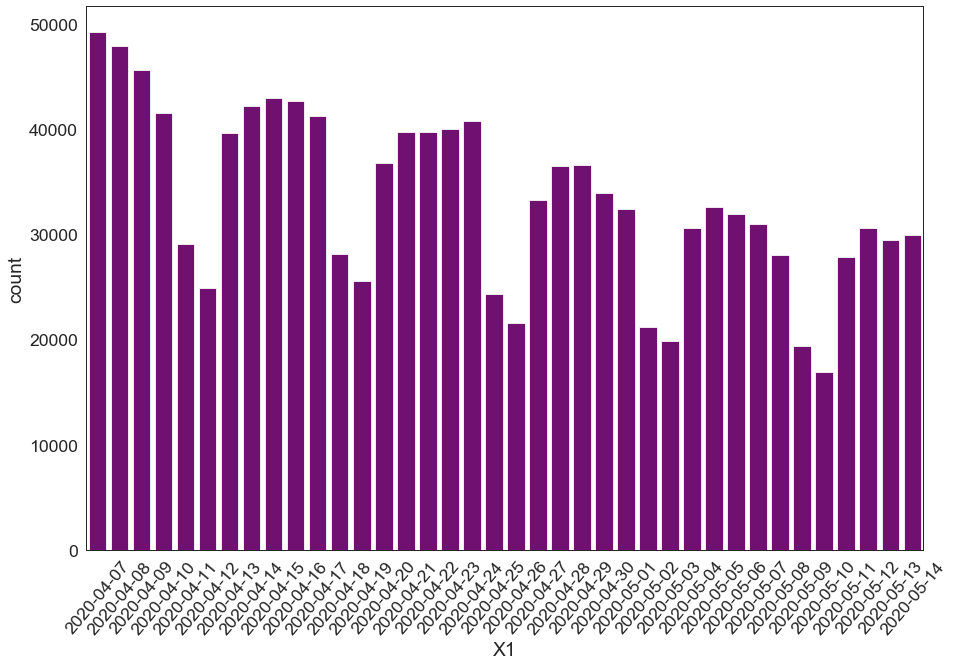

In [841]:
# Total Tweets by Day
plt.figure(figsize=(15, 10))
ax = sns.countplot(x="X1", data=merged, color="purple")
plt.setp(ax.get_xticklabels(), rotation=50);

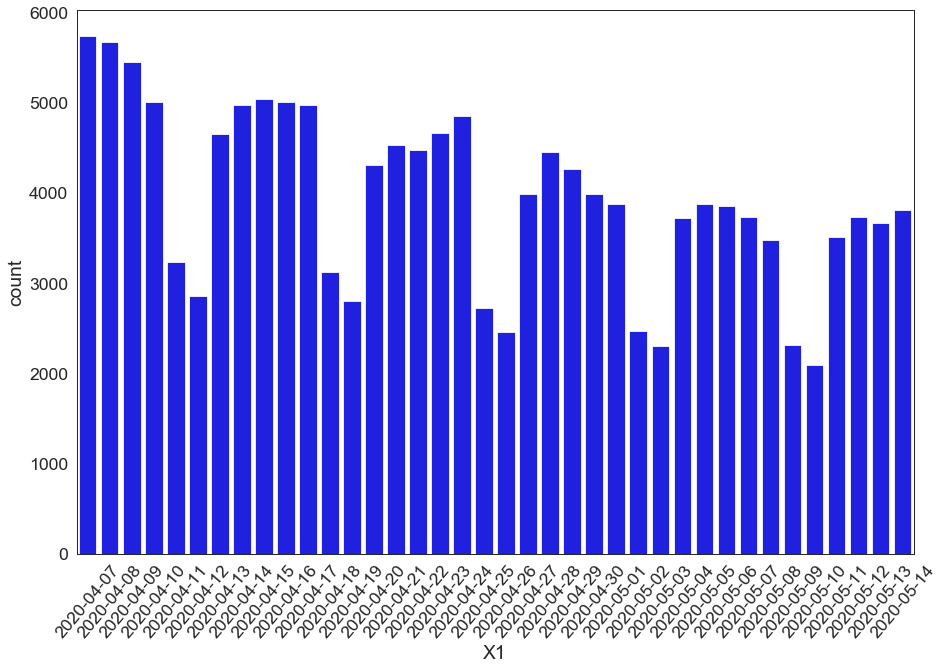

In [842]:
# VA Tweets by Day
plt.figure(figsize=(15, 10))
ax = sns.countplot(x="X1", data=merged3, color="b")
plt.setp(ax.get_xticklabels(), rotation=50);

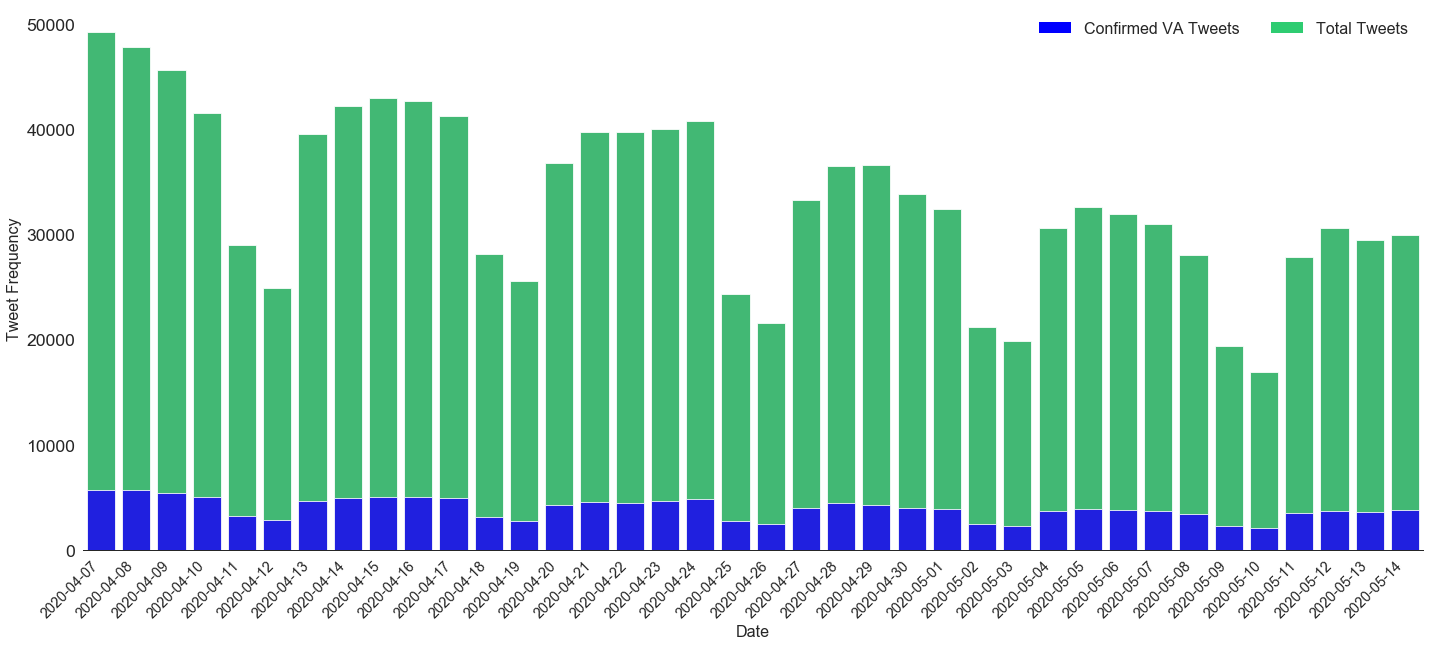

In [843]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.countplot(x="X1", data=merged, color="#2ecc71")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.countplot(x="X1", data=merged3, color="b")

topbar = plt.Rectangle((0,0),1,1,fc="#2ecc71", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='b',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Confirmed VA Tweets', 'Total Tweets'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Tweet Frequency", size=16)
bottom_plot.set_xlabel("Date", size=16)

#Set fonts to consistent 16pt size

bottom_plot.set_xticklabels(
    bottom_plot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large');

plt.savefig("Tweet Frequency Bar Chart", tight_layout=False)
# plt.figure(figsize=(8, 5))
# plt.setp(ax.get_xticklabels(), rotation=50);



In [844]:
len(merged3)

149910

# Additional Data Processing
 - Remove non-English Tweets
 - Remove news outlets and serial Tweeters


In [845]:
# Select date to review
data = merged3
# Language distribution by daily data
print(data.lang.value_counts)

#Drop non-english tweets
data = data[data['lang'] == 'en']
data.X1.value_counts()

<bound method IndexOpsMixin.value_counts of 36295    en
36296    en
36299    en
36302    en
36307    en
         ..
38552    en
38578    en
38605    en
38699    en
38714    en
Name: lang, Length: 149910, dtype: object>


2020-04-07    5488
2020-04-08    5428
2020-04-09    5191
2020-04-16    4788
2020-04-15    4787
2020-04-14    4785
2020-04-10    4738
2020-04-17    4723
2020-04-24    4650
2020-04-23    4495
2020-04-13    4411
2020-04-21    4333
2020-04-22    4278
2020-04-28    4221
2020-04-20    4109
2020-04-29    4040
2020-04-30    3838
2020-04-27    3827
2020-05-05    3745
2020-05-01    3698
2020-05-06    3661
2020-05-14    3616
2020-05-12    3576
2020-05-07    3573
2020-05-04    3551
2020-05-13    3507
2020-05-11    3344
2020-05-08    3333
2020-04-11    3015
2020-04-18    2950
2020-04-12    2652
2020-04-19    2651
2020-04-25    2585
2020-04-26    2336
2020-05-02    2326
2020-05-09    2196
2020-05-03    2174
2020-05-10    1972
Name: X1, dtype: int64

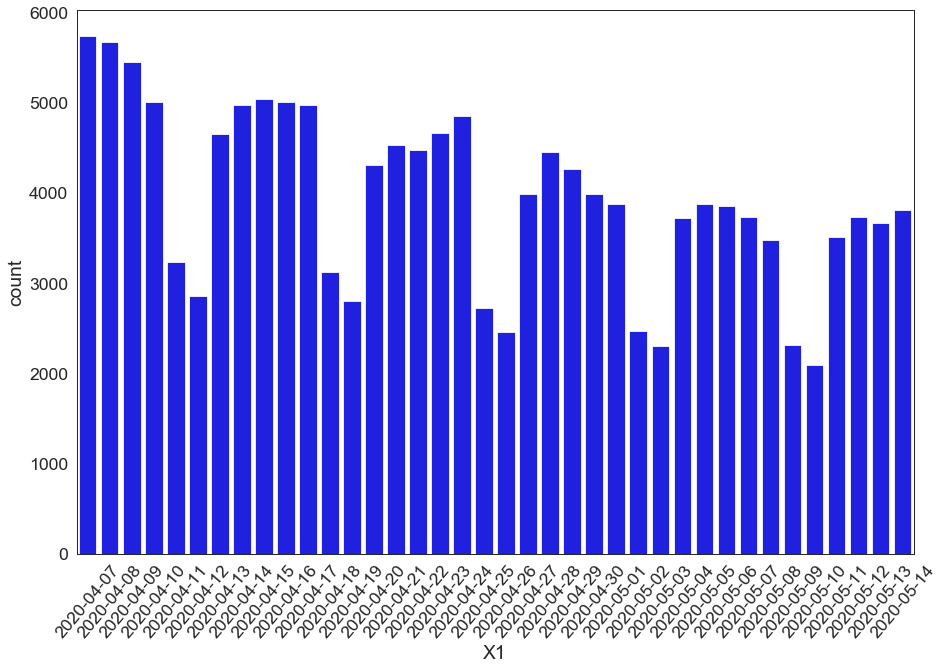

In [846]:
# VA Tweets by Day - English Only
plt.figure(figsize=(15, 10))
ax = sns.countplot(x="X1", data=merged3, color="b")
plt.setp(ax.get_xticklabels(), rotation=50);

## Twitter Account Stats

There are many accounts that belong to news outlets or folks that simply tweet news articles from thier account. The objective of this analysis is to surveil the VA general population's social media reactios re:COVID, I am deleting accounts with large numbers of tweets per day.



In [847]:
data.screen_name.value_counts()

#4060 unique usernames out of 8357 tweets
#Issue with accounts like @Ahighervision - just tweets out news articles - seems like his tweet text is 
# exactly the same as the title of article - 3% of all tweets for this data set!

Ahighervision      2437
Heerak4Congress    1249
WTKR3              1127
BLaw               1047
WFXRnews           986 
                  ...  
SherrieAlmes       1   
KatSHeath          1   
movement4life8     1   
possum232002       1   
mpschero           1   
Name: screen_name, Length: 25763, dtype: int64

In [848]:
2385/len(data)
# Ahighervision has almost 2% of all the tweets!

0.016726160837640523

In [849]:
# Frequency of twitter accounts - need to change this to per day when I process daily files
account_freq_df = pd.DataFrame(data.screen_name.value_counts())
account_freq_df
print(account_freq_df.describe())

# #Histogram of tweets per user
# plt.figure(figsize=(10, 7.5))
# ax = sns.distplot(account_freq_df.screen_name)

       screen_name
count  25763.00000
mean   5.53472    
std    29.94055   
min    1.00000    
25%    1.00000    
50%    1.00000    
75%    3.00000    
max    2437.00000 


In [850]:
pd.set_option('display.max_rows', 500)
account_freq_df

screen_name
Ahighervision    2437       
Heerak4Congress  1249       
WTKR3            1127       
BLaw             1047       
WFXRnews         986        
...              ...        
SherrieAlmes     1          
KatSHeath        1          
movement4life8   1          
possum232002     1          
mpschero         1          

[25763 rows x 1 columns]

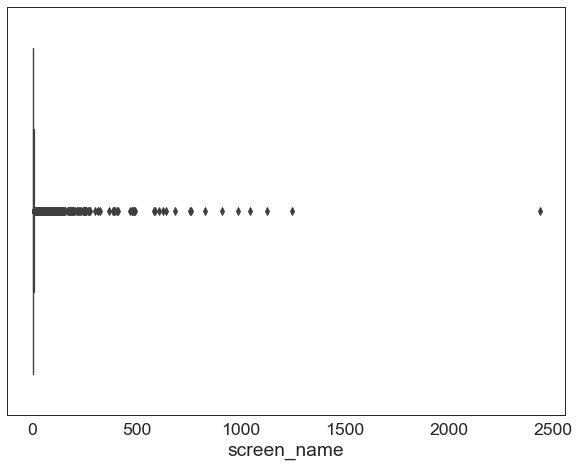

In [851]:
#Boxplot of tweets per user
plt.figure(figsize=(10, 7.5))
ax = sns.boxplot(account_freq_df.screen_name)

In [852]:
from scipy import stats
import numpy as np
account_freq_df['zscore'] = np.abs(stats.zscore(account_freq_df.screen_name))
account_freq_df

screen_name     zscore
Ahighervision    2437         81.211350
Heerak4Congress  1249         41.531950
WTKR3            1127         37.457129
BLaw             1047         34.785116
WFXRnews         986          32.747706
...              ...                ...
SherrieAlmes     1            0.151460 
KatSHeath        1            0.151460 
movement4life8   1            0.151460 
possum232002     1            0.151460 
mpschero         1            0.151460 

[25763 rows x 2 columns]

In [853]:
# Removing outliers from data frame
top_accounts = account_freq_df[account_freq_df['zscore'] >3]
print(len(top_accounts))
top_accounts.reset_index(inplace=True)
top_accounts

151


index  screen_name     zscore
0    Ahighervision    2437         81.211350
1    Heerak4Congress  1249         41.531950
2    WTKR3            1127         37.457129
3    BLaw             1047         34.785116
4    WFXRnews         986          32.747706
5    NBC12            909          30.175893
6    MattMurph24      828          27.470479
7    WAVY_News        762          25.266068
8    8NEWS            755          25.032267
9    13NewsNow        685          22.694255
10   news5wcyb        642          21.258048
11   AskCapitalOne    625          20.690245
12   MagnoliaG2012    608          20.122442
13   mikelotus        587          19.421038
14   virginianpilot   586          19.387638
15   NBC29            492          16.248022
16   whatifisaidit    488          16.114422
17   Consortiumnews   483          15.947421
18   tcomer4418       479          15.813820
19   CBS6             478          15.780420
20   WDBJ7            471          15.546619
21   rooseveltFellow  410          13.509208
22   tax              406          13.375608
23   ABC13News        396          13.041606
24   campusreform     392          12.908005
25   Daily_Press      386          12.707604
26   wsls             385          12.674204
27   NewsLeaderNOW    370          12.173202
28   iwcponline       326          10.703594
29   DNRnews          316          10.369593
30   RTDNEWS          313          10.269392
31   Cigarvolante     299          9.801790 
32   nicktompan       277          9.066986 
33   roanoketimes     274          8.966786 
34   environment      270          8.833185 
35   POferriesupdate  265          8.666184 
36   AugFreePress     259          8.465783 
37   HobanGirl        258          8.432383 
38   CandiceRose      256          8.365583 
39   CBJnewsroom      255          8.332182 
40   softwarnet       255          8.332182 
41   Lil_COVID        255          8.332182 
42   VoteBlueIn2020   248          8.098381 
43   virginiasbdc     248          8.098381 
44   MadaganSharon    247          8.064981 
45   NewsInTheBurg    242          7.897980 
46   DailyProgress    241          7.864580 
47   FirstNightArt    232          7.563978 
48   clakor54         228          7.430378 
49   Reprobate24      224          7.296777 
50   newsalliance     220          7.163176 
51   stapf            216          7.029576 
52   lrmartinjr       216          7.029576 
53   newsadvance      206          6.695574 
54   iwightnews       200          6.495173 
55   SamRobersonJr    193          6.261372 
56   BruceEppard2     193          6.261372 
57   Politidope       191          6.194572 
58   CharlesLuster10  190          6.161171 
59   DCofStaff        190          6.161171 
60   robertcaruso     188          6.094371 
61   mrctv            188          6.094371 
62   ElueJr           187          6.060971 
63   POLITICOPro      187          6.060971 
64   eclipsethis2003  186          6.027571 
65   chrisvcsefalvay  180          5.827170 
66   rockynickydog    180          5.827170 
67   RickMcCargar     174          5.626769 
68   occupyrvanow     172          5.559968 
69   MicheleSchiesse  171          5.526568 
70   MajorMikeWebb1   171          5.526568 
71   silvermoon820    170          5.493168 
72   fairfaxcounty    170          5.493168 
73   WYDaily          169          5.459768 
74   MilitaryOfficer  169          5.459768 
75   CarbonisedPleb   158          5.092366 
76   SageAdamFi       158          5.092366 
77   JehaneDeux       153          4.925365 
78   Norfolk_NC       152          4.891965 
79   nhswestessex     149          4.791765 
80   vpapupdates      147          4.724964 
81   theshipsagent    147          4.724964 
82   gaz_catt         143          4.591364 
83   SHRMHRNews       143          4.591364 
84   TANYAOPAYNE1     142          4.557963 
85   CamThompsonCBS6  142          4.557963 
86   TaxNotes         142          4.557963 
87   mercatus         141          4.524563 
88   RCNPu

In [854]:
# Get names of outliers/frequent tweeters to delete
frequent_user_list = top_accounts['index'].tolist()

# Remove outliers/frequent tweeters from data
data = data[~data.screen_name.isin(frequent_user_list)]
len(data)


103509

## Duplicates

In [855]:
# check for duplicates
print(data.retweet_status_id.value_counts(dropna=False)) #no retweets
data.status_id.value_counts()

NaN    103509
Name: retweet_status_id, dtype: int64


x1259099291794038784    2
x1257597115645263872    2
x1253430318964436997    2
x1248606330648252416    2
x1252584274508865536    2
                       ..
x1260940988454825984    1
x1247636797267550213    1
x1255959914079453192    1
x1258424481334407168    1
x1253749925478912001    1
Name: status_id, Length: 103497, dtype: int64

In [856]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = data[data.duplicated('text')]
duplicateRowsDF
dupes = pd.DataFrame(duplicateRowsDF.status_id)
dupe_list = dupes["status_id"].tolist()
len(dupe_list) #529 duplicate tweets to remove

465

In [857]:
# Remove duplicate tweets - these are not retweets - these are tweets by same user with same content
# 18 in first data set of ~8K
# 529 in data over 700K
data = data[~data.status_id.isin(dupe_list)]
len(data)

103032

In [858]:
merged_cleaned_data = data # Rename to avoid confusion
len(merged_cleaned_data)

103032

In [859]:
merged_cleaned_data.to_pickle("merged_cleaned_data_200515.pkl")

## Weekends vs Weekdays

Why does frequency drop so much on the weekends? Even after we remove outliers who tweet for work, and news outlets we see the same pattern. Below I look to see if I can run analysis on those that tweet on the weekends.

How do they differ from the people that tweet on the weekdays?

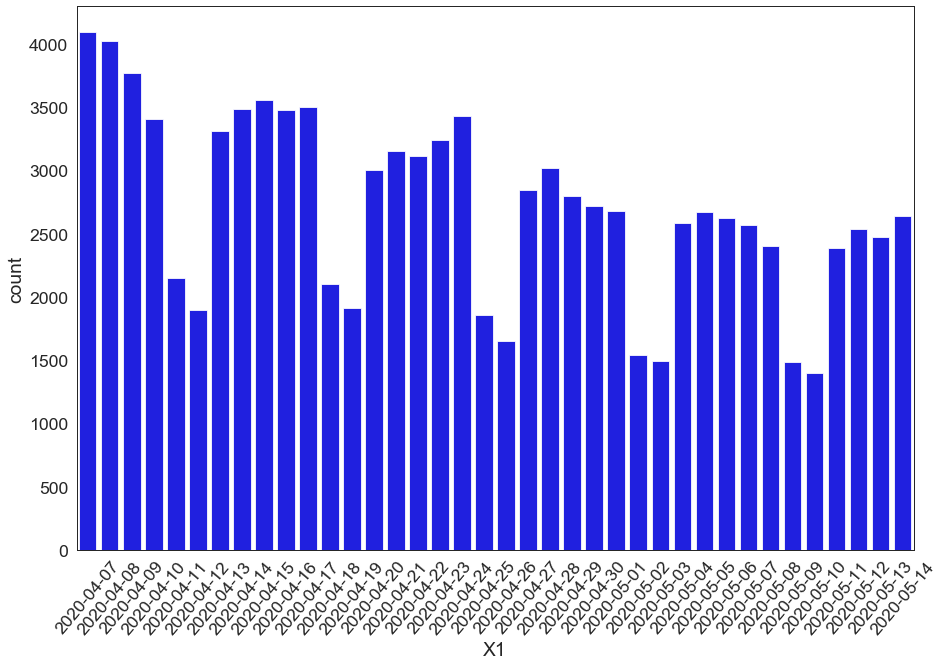

In [860]:
# Double check frequency of cleaned data
# VA Tweets by Day - English Only
plt.figure(figsize=(15, 10))
ax = sns.countplot(x="X1", data=merged_cleaned_data, color="b")
plt.setp(ax.get_xticklabels(), rotation=50);


In [889]:
print(len(merged_cleaned_data))
a = merged_cleaned_data.screen_name.value_counts()
print(len(a))

103032
25587


In [861]:
# Create weekend only data set

# Pull individual daily data sets from cleaned merged data
data_0407_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-07']
data_0408_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-08']
data_0409_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-09']
data_0410_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-10']
data_0411_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-11']
data_0412_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-12']
data_0413_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-13']
data_0414_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-14']
data_0415_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-15']
data_0416_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-16']
data_0417_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-17']
data_0418_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-18']
data_0419_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-19']
data_0420_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-20']
data_0421_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-21']
data_0422_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-22']
data_0423_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-23']
data_0424_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-24']
data_0425_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-25']
data_0426_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-26']
data_0427_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-27']
data_0428_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-28']
data_0429_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-29']
data_0430_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-30']
data_0501_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-01']
data_0502_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-02']
data_0503_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-03']
data_0504_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-04']
data_0505_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-05']
data_0506_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-06']
data_0507_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-07']
data_0508_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-08']
data_0509_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-09']
data_0510_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-10']
data_0511_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-11']
data_0512_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-12']
data_0513_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-13']
data_0514_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-14']


In [862]:
weekend_dates = [data_0410_clean, data_0411_clean, data_0417_clean, data_0418_clean, data_0424_clean,
                data_0425_clean, data_0501_clean, data_0502_clean, data_0508_clean,  data_0509_clean ]

weekdays_dates = [data_0407_clean, data_0408_clean, data_0409_clean, data_0412_clean,data_0413_clean, data_0414_clean, 
                 data_0415_clean, data_0416_clean, data_0419_clean, data_0420_clean, data_0421_clean, data_0422_clean, 
                 data_0423_clean, data_0426_clean, data_0427_clean, data_0428_clean, data_0429_clean, data_0430_clean,
                 data_0503_clean, data_0504_clean, data_0505_clean, data_0506_clean, data_0507_clean, data_0510_clean, 
                 data_0511_clean, data_0512_clean, data_0513_clean, data_0514_clean ]

In [896]:
# use dates from above to merge all files into one raw file
weekdays_merged = pd.concat(weekdays_dates, axis=0, sort=False)
#print(weekdays_merged.info())
print(weekdays_merged.X1.value_counts()) # Double check counts by day are correct

2020-04-07    4092
2020-04-08    4027
2020-04-09    3772
2020-04-15    3560
2020-04-14    3487
2020-04-16    3480
2020-04-13    3312
2020-04-23    3243
2020-04-21    3156
2020-04-22    3113
2020-04-28    3022
2020-04-20    3006
2020-04-27    2846
2020-04-29    2799
2020-04-30    2719
2020-05-05    2672
2020-05-14    2637
2020-05-06    2625
2020-05-04    2581
2020-05-07    2569
2020-05-12    2540
2020-05-13    2477
2020-05-11    2385
2020-04-19    1912
2020-04-12    1894
2020-04-26    1653
2020-05-03    1491
2020-05-10    1398
Name: X1, dtype: int64


In [895]:
# use dates from above to merge all files into one raw file
weekend_merged = pd.concat(weekend_dates, axis=0, sort=False)
#print(weekend_merged.info())
print(weekend_merged.X1.value_counts()) # Double check counts by day are correct

2020-04-17    3502
2020-04-24    3433
2020-04-10    3407
2020-05-01    2679
2020-05-08    2401
2020-04-11    2147
2020-04-18    2104
2020-04-25    1860
2020-05-02    1543
2020-05-09    1488
Name: X1, dtype: int64


In [872]:
a = weekdays_merged.screen_name.value_counts()
unique_users = len(a)
print(unique_users)
print(unique_users / len(weekdays_merged))
print(len(weekdays_merged) / unique_users)
print(len(weekdays_merged))
#21,492 unique users for 75,899 Tweets
# Average of 3.53 tweets per user

21876
0.2787888056277718
3.586944596818431
78468


In [866]:
weekend_merged.screen_name.value_counts()
# 5/14 - 11108 different users on the weekends

WhiteHatGuy        35
Mac_Hill33         33
ArlingtonVA        30
PatricioAuthor2    28
nfhughes           27
                   ..
pastorjgkell       1 
ericbiomed         1 
amayakind          1 
jukeboxjazztrio    1 
LisaAnnRVA         1 
Name: screen_name, Length: 11107, dtype: int64

In [867]:
a = weekend_merged.screen_name.value_counts()
unique_users = len(a)
print(unique_users)
print(len(weekend_merged))
print(unique_users / len(weekend_merged))
print(len(weekend_merged) / unique_users)
#11,108 unique users for 24,593 Tweets
# Average of 2.21 tweets per user
# More unique users on weekends than weekdays

11107
24564
0.45216577104706074
2.2115782839650673


In [ ]:
weekend_tweeters = weekend_merged['screen_name'].tolist()

In [893]:
# Look at only WEEKDAY users
weekdays_tweeters_only = weekdays_merged[~weekdays_merged.screen_name.isin(weekend_tweeters)] # REMOVING WEEKEND NAMES
print(len(weekdays_tweeters_only))
print(len(weekdays_tweeters_only.screen_name.value_counts()))

24890
14480


In [894]:
# Look at only WEEKDAY users
weekdays_with_weekend_tweeters = weekdays_merged[weekdays_merged.screen_name.isin(weekend_tweeters)] #SELECTING ONLY WEEKEND NAMES
print(len(weekdays_with_weekend_tweeters))
print(len(weekdays_with_weekend_tweeters.screen_name.value_counts()))

53578
7396


Type of User	        Unique User Names	   % of Total User Names	Tweets	   % of Total Tweets

Weekend & Weekday users	   7,396	                  29%	            53,578	           52%

Weekday only users	      14,480	                  57%	            24,890	            24%

Weekend only	           3,711	                 15%	            24,564	            24%

Total	                   25,587	                 100%	            103,032	            100%
 
Those that Tweet on the weekend (whether it be weekends only or both weekdays and weekends) make up 44% of the user names but provide 78% of the Tweets. This undermines the hypothesis that a group of weekday users were disproportionatly tweeting. However, note that by definition a user that has only Tweeted about COVID once is defined to the group by which day they Tweeted. If we remove users that have only tweeted once, we get the following table.


In [909]:
# LETS DO IT ALL AGAIN AND REMOVE SINGLE USERS
tweet_stats = pd.DataFrame(merged_cleaned_data.screen_name.value_counts())
singles = tweet_stats[tweet_stats['screen_name'] == 1]
singles.reset_index(inplace=True)
singles



index  screen_name
0      steveylu27       1          
1      basophil_brett   1          
2      KarimKhalil41    1          
3      MarkKidley       1          
4      jon_petters      1          
...            ...     ..          
13122  seminarian       1          
13123  Russell85597368  1          
13124  Adam22Denny      1          
13125  NoVaChiveGuy     1          
13126  jp1schaffer      1          

[13127 rows x 2 columns]

In [905]:
# Create liste of single tweeter screen names
single_tweeters= singles['index'].tolist()

In [907]:
# Remove single users from merged data set
more_than_one_tweeters = merged_cleaned_data[~merged_cleaned_data.screen_name.isin(single_tweeters)]
more_than_one_tweeters.screen_name.value_counts()

GreenNewsDaily    95
LifeBeyondD       93
beth_mulvihill    92
HenricoCitizen    92
ACC_HQ            91
                  ..
arulium           2 
lcroque           2 
DeAntonio_9       2 
SavvySlimPapi     2 
DaveBratVA7th     2 
Name: screen_name, Length: 12460, dtype: int64

In [908]:
len(more_than_one_tweeters)

89905

In [910]:
tweet_stats

screen_name
GreenNewsDaily   95         
LifeBeyondD      93         
HenricoCitizen   92         
beth_mulvihill   92         
NACAC            91         
...              ..         
seminarian       1          
Russell85597368  1          
Adam22Denny      1          
NoVaChiveGuy     1          
jp1schaffer      1          

[25587 rows x 1 columns]

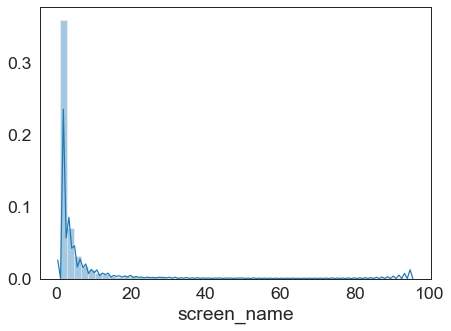

In [911]:
plt.figure(figsize=(7, 5))
ax = sns.distplot(tweet_stats.screen_name)

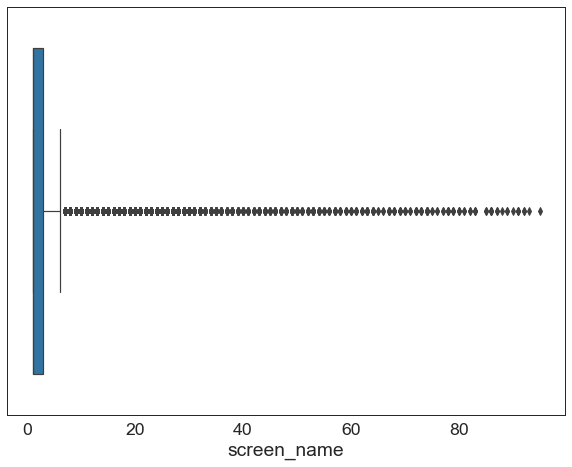

In [912]:
plt.figure(figsize=(10, 7.5))
ax = sns.boxplot(tweet_stats.screen_name)

In [913]:
tweet_stats.describe()

screen_name
count  25587.000000
mean   4.026732    
std    7.904208    
min    1.000000    
25%    1.000000    
50%    1.000000    
75%    3.000000    
max    95.000000

# Calculate overall Sentiment Score

I did this first to create process and assess mean score by county. Later in script I get daily sentiment score by county and overall.

In [914]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import pandas as pd
import csv
import re #regular expression
from textblob import TextBlob
import string
import preprocessor as p
from nltk import sent_tokenize, word_tokenize

In [915]:
#create list of all texts for cleaning
text_body=[]
for i in range(0,len(data)):
    temp_text=data['text'].iloc[i]
    text_body.append(temp_text)
    
text_body

['"How to Protect Your Mental Health During the Coronavirus"- Emily Esfahani Smith https://t.co/mTFX8yblMp',
 '#Annie #Tomorrow \n#community #singing #Covid_19 \nJoin us 8pm Thursday doorsteps\n@Clive_Harris @Annie_Osb @suffolkgiving @TimHolder11 @balletboy09 @Jochurchill4 @sarsHQ @MarkGlennMurphy @nikkijfox https://t.co/plIW1DJWxc',
 'https://t.co/OYVXzv6a7K via @YouTube\nThink we found our 8pm Thursday evening choirmaster\n#Covid_19 #community #singalong\n@RobBaskind @ClareGerada @DrSdeG @alexandra_DBmed @EM_HealthPsych @AmandaCHoweRCGP @helenamckeown @medicsupport @NikkiKF @fhussain73 @ArtfulDoctor\n@MartinRCGP',
 'We now have over 400,000 Virginians covered by Medicaid. We need healthcare coverage now more than ever. The COVID-19 tests may be free but the life saving care &amp; treatment required if you have it is not. https://t.co/XPtWr5JOKt',
 'Crazy to think, if not for coronavirus, we all would have been in New Orleans this past weekend watching Virginia Tech play in the Woman’

In [916]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
sentences = text_body
sentences

['"How to Protect Your Mental Health During the Coronavirus"- Emily Esfahani Smith https://t.co/mTFX8yblMp',
 '#Annie #Tomorrow \n#community #singing #Covid_19 \nJoin us 8pm Thursday doorsteps\n@Clive_Harris @Annie_Osb @suffolkgiving @TimHolder11 @balletboy09 @Jochurchill4 @sarsHQ @MarkGlennMurphy @nikkijfox https://t.co/plIW1DJWxc',
 'https://t.co/OYVXzv6a7K via @YouTube\nThink we found our 8pm Thursday evening choirmaster\n#Covid_19 #community #singalong\n@RobBaskind @ClareGerada @DrSdeG @alexandra_DBmed @EM_HealthPsych @AmandaCHoweRCGP @helenamckeown @medicsupport @NikkiKF @fhussain73 @ArtfulDoctor\n@MartinRCGP',
 'We now have over 400,000 Virginians covered by Medicaid. We need healthcare coverage now more than ever. The COVID-19 tests may be free but the life saving care &amp; treatment required if you have it is not. https://t.co/XPtWr5JOKt',
 'Crazy to think, if not for coronavirus, we all would have been in New Orleans this past weekend watching Virginia Tech play in the Woman’

In [917]:
sentiment_score = []
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    sentiment_score.append(vs)

In [918]:
a = pd.DataFrame(sentiment_score)
b = a.compound.mean()
b

0.07362769139684903

In [919]:
sentiment_score

[{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.3818},
 {'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'compound': 0.296},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.7543},
 {'neg': 0.081, 'neu': 0.839, 'pos': 0.081, 'compound': 0.0},
 {'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.156, 'neu': 0.778, 'pos': 0.066, 'compound': -0.714},
 {'neg': 0.06, 'neu': 0.874, 'pos': 0.067, 'compound': 0.0772},
 {'neg': 0.103, 'neu': 0.897, 'pos': 0.0, 'compound': -0.4137},
 {'neg': 0.116, 'neu': 0.884, 'pos': 0.0, 'compound': -0.1779},
 {'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compound': 0.91},
 {'neg': 0.175, 'neu': 0.649, 'pos': 0.175, 'compound': 0.0},
 {'neg': 0.053, 'neu': 0.714, 'pos': 0.234, 'compound': 0.9034},
 {'neg': 0.191, 'neu': 0.809, 'pos': 0.0, 'compound': -0.3818},
 {'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'compound': -0.8313},
 {'

In [920]:
# Check out a few examples
num = 65
print(text_body[num])
print(a.iloc[num])

@cspan The disparity in the deaths of Americans of African descent isn’t new news. What took @realDonaldTrump so long? The issue is just another play by @realDonaldTrump.
https://t.co/wfYM7CTr5E
neg         0.000
neu         0.918
pos         0.082
compound    0.340
Name: 65, dtype: float64


In [921]:
text_body_df = pd.DataFrame(text_body)
text_body_df.columns=['text']

In [922]:
df = pd.concat([a, text_body_df], axis=1)
df.head()

neg    neu    pos  compound  \
0  0.000  0.822  0.178  0.3818     
1  0.000  0.896  0.104  0.2960     
2  0.000  1.000  0.000  0.0000     
3  0.000  0.848  0.152  0.7543     
4  0.081  0.839  0.081  0.0000     

                                                                                                                                                                                                                                                                                          text  
0  "How to Protect Your Mental Health During the Coronavirus"- Emily Esfahani Smith https://t.co/mTFX8yblMp                                                                                                                                                                                     
1  #Annie #Tomorrow \n#community #singing #Covid_19 \nJoin us 8pm Thursday doorsteps\n@Clive_Harris @Annie_Osb @suffolkgiving @TimHolder11 @balletboy09 @Jochurchill4 @sarsHQ @MarkGlennMurphy @nikkijfox https://t.co/plIW1DJWxc                                                               
2  https://t.co/OYVXzv6a7K via @YouTube\nThink we found our 8pm Thursday evening choirmaster\n#Covid_19 #community #singalong\n@RobBaskind @ClareGerada @DrSdeG @alexandra_DBmed @EM_HealthPsych @AmandaCHoweRCGP @helenamckeown @medicsupport @NikkiKF @fhussain73 @ArtfulDoctor\n@MartinRCGP  
3  We now have over 400,000 Virginians covered by Medicaid. We need healthcare coverage now more than ever. The COVID-19 tests may be free but the life saving care &amp; treatment required if you have it is not. https://t.co/XPtWr5JOKt                                                     
4  Crazy to think, if not for coronavirus, we all would have been in New Orleans this past weekend watching Virginia Tech play in the Woman’s Final Four.

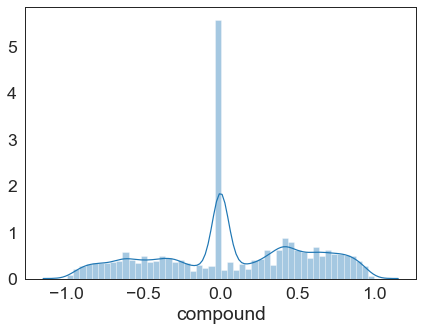

In [923]:
plt.figure(figsize=(7, 5))
ax = sns.distplot(df.compound)

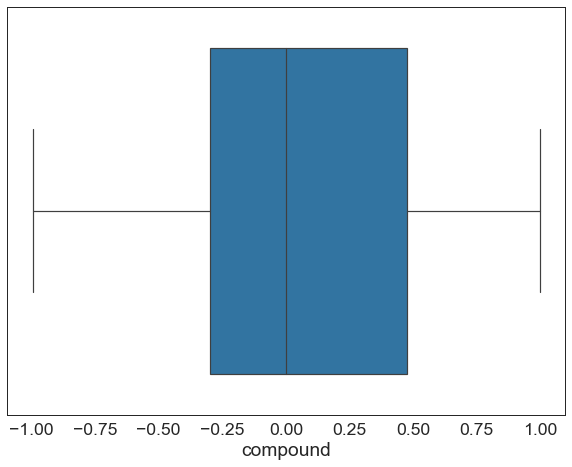

In [925]:
plt.figure(figsize=(10, 7.5))
ax = sns.boxplot(df.compound)

In [926]:
df.compound.describe()

count    103032.000000
mean     0.073628     
std      0.493216     
min     -0.994700     
25%     -0.296000     
50%      0.000000     
75%      0.476700     
max      0.997700     
Name: compound, dtype: float64

In [928]:
# Check out the most negative tweets
pd.set_option('display.max_colwidth', -1)
df.sort_values('compound')[0:50]

/Users/rachelmartonik/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


neg    neu    pos  compound  \
39896   0.601  0.383  0.015 -0.9947     
81988   0.493  0.473  0.034 -0.9921     
48243   0.412  0.529  0.060 -0.9909     
64447   0.492  0.508  0.000 -0.9905     
87389   0.472  0.528  0.000 -0.9897     
17614   0.504  0.496  0.000 -0.9896     
33752   0.457  0.513  0.030 -0.9893     
59716   0.463  0.537  0.000 -0.9869     
87175   0.374  0.612  0.014 -0.9865     
19374   0.457  0.464  0.079 -0.9863     
89331   0.423  0.529  0.048 -0.9862     
65453   0.471  0.529  0.000 -0.9851     
98076   0.361  0.621  0.018 -0.9849     
92003   0.414  0.527  0.059 -0.9845     
82444   0.307  0.667  0.026 -0.9840     
94704   0.484  0.516  0.000 -0.9836     
90339   0.468  0.532  0.000 -0.9833     
87102   0.379  0.603  0.018 -0.9824     
27335   0.532  0.468  0.000 -0.9822     
91964   0.339  0.615  0.045 -0.9816     
96603   0.420  0.580  0.000 -0.9813     
40040   0.426  0.574  0.000 -0.9808     
54210   0.352  0.624  0.024 -0.9804     
37000   0.405  0.550  0.045 -0.9803     
36410   0.407  0.593  0.000 -0.9801     
5694    0.356  0.644  0.000 -0.9799     
5690    0.347  0.653  0.000 -0.9799     
5692    0.377  0.623  0.000 -0.9799     
5693    0.377  0.623  0.000 -0.9799     
5691    0.371  0.629  0.000 -0.9799     
96604   0.570  0.430  0.000 -0.9796     
59989   0.319  0.681  0.000 -0.9794     
98000   0.621  0.379  0.000 -0.9789     
18201   0.421  0.579  0.000 -0.9787     
54956   0.403  0.562  0.035 -0.9783     
7284    0.407  0.567  0.026 -0.9782     
82633   0.418  0.582  0.000 -0.9779     
13427   0.418  0.582  0.000 -0.9779     
36902   0.385  0.615  0.000 -0.9777     
40939   0.375  0.625  0.000 -0.9776     
71325   0.565  0.435  0.000 -0.9775     
74295   0.394  0.539  0.067 -0.9774     
63090   0.438  0.562  0.000 -0.9774     
101854  0.418  0.582  0.000 -0.9773     
83917   0.569  0.431  0.000 -0.9771     
46109   0.430  0.570  0.000 -0.9768     
48447   0.515  0.432  0.053 -0.9766     
17357   0.280  0.720  0.000 -0.9765     
43359   0.572  0.428  0.000 -0.9761     
97376   0.418  0.495  0.088 -0.9760     

                                                                                                                                                                                                                                                                                                                                                                                      text  
39896   Trump referring to himself as a "Wartime President" is pathetic. COVID-19 is bad. Worse health crisis in 100 years. WHY do we Americans insist on casting every challenge as "a war"? War on drugs, war on crime, war on poverty (really war on the poor), war on terror?                                                                                                           
81988   @Amy_Siskind USA is broke and printing FAKE Money 💵 FAKE 💰, Baby Boomers are returning , their Money has been STOLEN to save WALL STREET 😱😱😱 Covid 19+ Baby Boomers = Money Saves‼️ this administration is planning kill kill kill baby boomers                                                                                                                                     
48243   I want to give my mom a hug soooooo bad! 😭\n\nShe works at a nursing home, they’ve had multiple COVID deaths, she’s almost 60, my aunt lives with us and she’s like 75.\n\nI CAN’T DEAL!\n😭😭😭😭😭😭😭😭😭😭😭😭😭 https://t.co/W0UYQG5gHu                                                                                                                                                     
64447   @deschampbelynda @JoeySalads @realDonaldTrump Did the cancer kill them? If not then they didn’t die of cancer. If those same people were shot and killed their cause of death would be listed as a gun death regardless of their cancer diagnosis. Why should Covid 19 be any different?                                                                                            
87389   @lati

In [932]:
# Check out the most positive tweets
pd.set_option('display.max_colwidth', -1)
df.sort_values('compound', ascending = False)[0:50]

/Users/rachelmartonik/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


neg    neu    pos  compound  \
54548   0.000  0.275  0.725  0.9977     
26533   0.148  0.430  0.422  0.9943     
25525   0.028  0.493  0.480  0.9887     
40227   0.000  0.570  0.430  0.9855     
79948   0.000  0.592  0.408  0.9854     
51365   0.000  0.576  0.424  0.9847     
53016   0.018  0.737  0.245  0.9842     
29800   0.000  0.583  0.417  0.9838     
16742   0.027  0.618  0.354  0.9837     
17881   0.000  0.582  0.418  0.9832     
8512    0.000  0.575  0.425  0.9831     
94848   0.000  0.547  0.453  0.9831     
40172   0.046  0.497  0.457  0.9825     
59780   0.093  0.584  0.323  0.9821     
88568   0.000  0.557  0.443  0.9819     
40421   0.052  0.577  0.371  0.9817     
73934   0.000  0.530  0.470  0.9812     
100007  0.000  0.322  0.678  0.9809     
6049    0.035  0.549  0.417  0.9808     
82775   0.041  0.582  0.378  0.9805     
6428    0.000  0.498  0.502  0.9803     
45193   0.000  0.517  0.483  0.9799     
5669    0.055  0.360  0.585  0.9799     
29060   0.040  0.619  0.342  0.9794     
92147   0.033  0.515  0.452  0.9792     
6774    0.000  0.614  0.386  0.9792     
65062   0.024  0.604  0.371  0.9789     
47882   0.000  0.576  0.424  0.9786     
40846   0.000  0.552  0.448  0.9784     
29078   0.021  0.588  0.392  0.9783     
92332   0.027  0.504  0.469  0.9783     
75271   0.047  0.594  0.359  0.9783     
9350    0.050  0.579  0.371  0.9782     
93664   0.000  0.625  0.375  0.9781     
17981   0.000  0.599  0.401  0.9779     
5888    0.000  0.615  0.385  0.9778     
90405   0.036  0.553  0.411  0.9778     
34941   0.000  0.576  0.424  0.9776     
91564   0.142  0.503  0.355  0.9774     
10868   0.023  0.602  0.374  0.9774     
21907   0.060  0.630  0.310  0.9771     
970     0.064  0.550  0.386  0.9769     
76407   0.021  0.608  0.371  0.9769     
86722   0.000  0.567  0.433  0.9768     
50666   0.127  0.539  0.334  0.9766     
76715   0.049  0.499  0.453  0.9765     
53674   0.000  0.560  0.440  0.9765     
70389   0.079  0.520  0.401  0.9765     
59238   0.000  0.624  0.376  0.9765     
39546   0.000  0.437  0.563  0.9764     

                                                                                                                                                                                                                                                                                                                                   text  
54548   new series starts on Sunday "Love During the Coronavirus"\n\nspoiler alert: keep loving and loving and loving and loving and loving and loving and loving and loving and loving and loving and loving and loving and loving and loving and loving and loving and loving and loving and lov                                       
26533   @KellyannePolls covid 19 not covid 1 🤣🤣🤣🤣🤣🤣😂😂😂😂😂😂😂😂😂😂😂😂                                                                                                                                                                                                                                                                          
25525   A dear friend of mine lost her father to COVID-19 on Sunday - a loving, gentle, joyful man whose life touched so many. In his honor, please fill this thread with kindness - a moment of hope you felt, a good deed you’ll do, words of encouragement. Let’s create a thread of love. ❤️                                         
40227   @GlblCtzn @ladygaga Thank you all for giving us this beautiful night of uplifting music, moving tributes and celebrating the front line workers.. A truly incredible night to remember. Wow! Congrats to all for raising so much money for COVID-19 relief. Stay safe and strong! 🙌🎶🎵❤ #TogetherAtHome                           
79948   So a papaya fruit tested positive for coronavirus last week in Africa.🤣🤣🤣🤣🤣🤣🤣🤣🤣                                                                                                                                                                                     

In [930]:
locations = pd.DataFrame(data['county_name'])
locations.reset_index(inplace=True)
locations

area = pd.concat([df, locations], axis=1)
area

neg    neu    pos  compound  \
0       0.000  0.822  0.178  0.3818     
1       0.000  0.896  0.104  0.2960     
2       0.000  1.000  0.000  0.0000     
3       0.000  0.848  0.152  0.7543     
4       0.081  0.839  0.081  0.0000     
...       ...    ...    ...     ...     
103027  0.040  0.586  0.374  0.9590     
103028  0.167  0.833  0.000 -0.8625     
103029  0.000  0.826  0.174  0.2263     
103030  0.048  0.747  0.205  0.8475     
103031  0.000  0.851  0.149  0.7579     

                                                                                                                                                                                                                                                                                                               text  \
0       "How to Protect Your Mental Health During the Coronavirus"- Emily Esfahani Smith https://t.co/mTFX8yblMp                                                                                                                                                                                                      
1       #Annie #Tomorrow \n#community #singing #Covid_19 \nJoin us 8pm Thursday doorsteps\n@Clive_Harris @Annie_Osb @suffolkgiving @TimHolder11 @balletboy09 @Jochurchill4 @sarsHQ @MarkGlennMurphy @nikkijfox https://t.co/plIW1DJWxc                                                                                
2       https://t.co/OYVXzv6a7K via @YouTube\nThink we found our 8pm Thursday evening choirmaster\n#Covid_19 #community #singalong\n@RobBaskind @ClareGerada @DrSdeG @alexandra_DBmed @EM_HealthPsych @AmandaCHoweRCGP @helenamckeown @medicsupport @NikkiKF @fhussain73 @ArtfulDoctor\n@MartinRCGP                   
3       We now have over 400,000 Virginians covered by Medicaid. We need healthcare coverage now more than ever. The COVID-19 tests may be free but the life saving care &amp; treatment required if you have it is not. https://t.co/XPtWr5JOKt                                                                      
4       Crazy to think, if not for coronavirus, we all would have been in New Orleans this past weekend watching Virginia Tech play in the Woman’s Final Four.                                                                                                                                                        
...                                                                                                                                                        ...                                                                                                                                                        
103027  When the COVID outbreak began, I created an original series titled Faith, Hope, and Trust, using the word of God to help us make it through these difficult times. You can find all three lessons in this series here and feel free to retweet and share. https://t.co/vVtds9bcNW                             
103028  The NCAA Division 1 Council Coordination Committee (CCC) has extended the COVID-19 temporary dead period in all sports through June 30th. The Committee will review the status of the COVID-19 pandemic as it relates to the dead period again at its May 27th meeting. https://t.co/jnpbXcu4Bt               
103029  Coronavirus: Florida's Reopening Is Worth Rooting For - Bloomberg https://t.co/o3LVldf8ph                                                                                                                                                                                                                     
103030  Getting back into comics has been absolutely amazing.  Going back and looking at all the art from when I was a teen from @Todd_McFarlane @robertliefeld @JimLee @WhilcePortacio has been the best thing about this whole COVID mess.  God their art was so epic!                                              
103031  The @usairforce Thunderbirds and the @USNavy Blue Angels, fly over New York City, April 

In [931]:
area = pd.concat([df, locations], axis=1)
area

neg    neu    pos  compound  \
0       0.000  0.822  0.178  0.3818     
1       0.000  0.896  0.104  0.2960     
2       0.000  1.000  0.000  0.0000     
3       0.000  0.848  0.152  0.7543     
4       0.081  0.839  0.081  0.0000     
...       ...    ...    ...     ...     
103027  0.040  0.586  0.374  0.9590     
103028  0.167  0.833  0.000 -0.8625     
103029  0.000  0.826  0.174  0.2263     
103030  0.048  0.747  0.205  0.8475     
103031  0.000  0.851  0.149  0.7579     

                                                                                                                                                                                                                                                                                                               text  \
0       "How to Protect Your Mental Health During the Coronavirus"- Emily Esfahani Smith https://t.co/mTFX8yblMp                                                                                                                                                                                                      
1       #Annie #Tomorrow \n#community #singing #Covid_19 \nJoin us 8pm Thursday doorsteps\n@Clive_Harris @Annie_Osb @suffolkgiving @TimHolder11 @balletboy09 @Jochurchill4 @sarsHQ @MarkGlennMurphy @nikkijfox https://t.co/plIW1DJWxc                                                                                
2       https://t.co/OYVXzv6a7K via @YouTube\nThink we found our 8pm Thursday evening choirmaster\n#Covid_19 #community #singalong\n@RobBaskind @ClareGerada @DrSdeG @alexandra_DBmed @EM_HealthPsych @AmandaCHoweRCGP @helenamckeown @medicsupport @NikkiKF @fhussain73 @ArtfulDoctor\n@MartinRCGP                   
3       We now have over 400,000 Virginians covered by Medicaid. We need healthcare coverage now more than ever. The COVID-19 tests may be free but the life saving care &amp; treatment required if you have it is not. https://t.co/XPtWr5JOKt                                                                      
4       Crazy to think, if not for coronavirus, we all would have been in New Orleans this past weekend watching Virginia Tech play in the Woman’s Final Four.                                                                                                                                                        
...                                                                                                                                                        ...                                                                                                                                                        
103027  When the COVID outbreak began, I created an original series titled Faith, Hope, and Trust, using the word of God to help us make it through these difficult times. You can find all three lessons in this series here and feel free to retweet and share. https://t.co/vVtds9bcNW                             
103028  The NCAA Division 1 Council Coordination Committee (CCC) has extended the COVID-19 temporary dead period in all sports through June 30th. The Committee will review the status of the COVID-19 pandemic as it relates to the dead period again at its May 27th meeting. https://t.co/jnpbXcu4Bt               
103029  Coronavirus: Florida's Reopening Is Worth Rooting For - Bloomberg https://t.co/o3LVldf8ph                                                                                                                                                                                                                     
103030  Getting back into comics has been absolutely amazing.  Going back and looking at all the art from when I was a teen from @Todd_McFarlane @robertliefeld @JimLee @WhilcePortacio has been the best thing about this whole COVID mess.  God their art was so epic!                                              
103031  The @usairforce Thunderbirds and the @USNavy Blue Angels, fly over New York City, April 

In [933]:
count = area.groupby('county_name').count()
count = pd.DataFrame(count['text'])
count.reset_index(inplace = True)
count.head()

county_name  text
0  accomack county   49  
1  albemarle county  109 
2  alexandria city   9362
3  alleghany county  5   
4  amelia county     5

In [934]:
count.reset_index(drop=True, inplace = True)
count.sort_values('text')

county_name   text
94   pitt county            1    
11   bland county           1    
57   henderson county       1    
28   covington              1    
9    bath county            1    
97   portsmouth             1    
64   king and queen county  2    
126  wake county            2    
23   charlottsville city    3    
72   lunenburg county       4    
29   craig county           4    
4    amelia county          5    
3    alleghany county       5    
35   emporia city           5    
117  southampton county     6    
24   chesapeake city        8    
88   norton city            9    
66   king william county    10   
20   charles city county    10   
48   giles county           10   
15   buchanan county        11   
86   northampton county     12   
33   dickenson county       12   
92   patrick county         12   
67   lancaster county       13   
37   fairfax city           13   
89   nottoway county        13   
80   middlesex county       14   
68   lee county             14   
122  surry county           16   
74   madison county         18   
83   new kent county        19   
19   carroll county         21   
63   james city county      22   
112  russell county         24   
43   franklin city          24   
18   caroline county        25   
116  smyth county           25   
124  tazewell county        26   
47   galax city             26   
12   botetourt county       27   
26   clarke county          28   
123  sussex county          29   
60   highland county        30   
107  richmond county        31   
14   brunswick county       34   
51   grayson county         34   
61   hopewell city          38   
96   poquoson city          39   
114  scott county           39   
52   greene county          42   
17   campbell county        45   
110  rockbridge county      49   
0    accomack county        49   
103  pulaski county         51   
34   dinwiddie county       51   
78   mathews county         53   
41   floyd county           53   
6    appomattox county      54   
59   henry county           55   
31   cumberland county      55   
45   frederick county       55   
99   powhatan county        60   
50   goochland county       63   
134  wythe county           65   
104  radford city           68   
79   mecklenburg county     68   
16   buckingham county      74   
115  shenandoah county      77   
87   northumberland county  79   
95   pittsylvania county    80   
77   martinsville city      81   
76   manassas park city     82   
90   orange county          83   
49   gloucester county      84   
27   colonial heights city  85   
44   franklin county        90   
130  westmoreland county    93   
91   page county            94   
129  waynesboro city        98   
5    amherst county         99   
42   fluvanna county        102  
53   halifax county         105  
127  warren county          105  
1    albemarle county       109  
82   nelson county          113  
109  roanoke county         121  
71   louisa county          123  
100  prince edward county   132  
105  rappahannock county    138  
69   lexington city         145  
101  prince george county   152  
118  spotsylvania county    162  
133  wise county            177  
8    augusta county         184  
93   petersburg city        185  
113  salem city             204  
32   danville city          216  
128  washington county      250  
120  staunton city          275  
119  stafford county        287  
65   king george county     303  
10   bedford county         332  
13   bristol city           358  
111  rockingham county      377  
40   fauquier county        387  
55   hanover county         412  
135  york county            468  
98   portsmouth city        529  
132  winchester city        565  
75   manassas city          667  
21   charlotte county       817  
73   lynchburg city         941  
25   chesterfield county    964  
58   henrico county         1023 
62   isle of wight county   1102 
131  williamsburg city      1137 
84 

In [935]:
# Map count of counties to dataframe
location_count_dict = dict(zip(count.county_name, count.text))
location_count_dict
area['count'] = area['county_name'].map(location_count_dict)

In [936]:
location_count_dict

{'accomack county': 49,
 'albemarle county': 109,
 'alexandria city': 9362,
 'alleghany county': 5,
 'amelia county': 5,
 'amherst county': 99,
 'appomattox county': 54,
 'arlington county': 10282,
 'augusta county': 184,
 'bath county': 1,
 'bedford county': 332,
 'bland county': 1,
 'botetourt county': 27,
 'bristol city': 358,
 'brunswick county': 34,
 'buchanan county': 11,
 'buckingham county': 74,
 'campbell county': 45,
 'caroline county': 25,
 'carroll county': 21,
 'charles city county': 10,
 'charlotte county': 817,
 'charlottesville city': 5800,
 'charlottsville city': 3,
 'chesapeake city': 8,
 'chesterfield county': 964,
 'clarke county': 28,
 'colonial heights city': 85,
 'covington': 1,
 'craig county': 4,
 'culpeper county': 1829,
 'cumberland county': 55,
 'danville city': 216,
 'dickenson county': 12,
 'dinwiddie county': 51,
 'emporia city': 5,
 'essex county': 4347,
 'fairfax city': 13,
 'fairfax county': 15535,
 'falls church city': 1422,
 'fauquier county': 387,
 

In [937]:
location = area.groupby('county_name')
print(location)

In [938]:
location = area.groupby('county_name').mean()
location.sort_values('compound', inplace=True)
location.reset_index(inplace=True)
location

county_name       neg       neu       pos  compound  \
0    bland county           0.181000  0.819000  0.000000 -0.624900   
1    bath county            0.163000  0.837000  0.000000 -0.542300   
2    covington              0.204000  0.643000  0.153000 -0.264800   
3    buchanan county        0.141909  0.780000  0.078182 -0.189518   
4    lunenburg county       0.067750  0.885500  0.047000 -0.182975   
5    floyd county           0.121660  0.816226  0.062094 -0.176104   
6    mecklenburg county     0.104559  0.833838  0.061603 -0.170182   
7    franklin city          0.167292  0.760792  0.071875 -0.164837   
8    cumberland county      0.096091  0.848236  0.055691 -0.148627   
9    amelia county          0.101200  0.778400  0.120600 -0.139540   
10   russell county         0.094500  0.837333  0.068167 -0.138950   
11   pittsylvania county    0.113975  0.814925  0.071025 -0.131048   
12   richmond county        0.083774  0.838097  0.078194 -0.114374   
13   orange county          0.124699  0.814807  0.060482 -0.108534   
14   wythe county           0.108000  0.822015  0.070015 -0.102578   
15   northampton county     0.134500  0.774750  0.090750 -0.086808   
16   giles county           0.106400  0.816500  0.077000 -0.083390   
17   carroll county         0.103524  0.796810  0.099714 -0.077295   
18   york county            0.105671  0.808833  0.085481 -0.063102   
19   franklin county        0.098911  0.829678  0.071422 -0.054826   
20   bedford county         0.096678  0.822232  0.081090 -0.052158   
21   king george county     0.090881  0.827228  0.081921 -0.047749   
22   colonial heights city  0.080624  0.855471  0.063894 -0.042882   
23   mathews county         0.066415  0.866094  0.067491 -0.041787   
24   williamsburg city      0.087671  0.838009  0.074318 -0.030317   
25   wise county            0.102503  0.802554  0.094938 -0.028171   
26   fauquier county        0.090093  0.824390  0.085527 -0.025626   
27   salem city             0.094917  0.823328  0.081730 -0.024681   
28   hopewell city          0.099237  0.815237  0.085553 -0.024174   
29   hanover county         0.093044  0.820823  0.086109 -0.023337   
30   madison county         0.075889  0.826056  0.098056 -0.019217   
31   lee county             0.134500  0.743286  0.122214 -0.018307   
32   prince george county   0.086151  0.835914  0.078000 -0.015449   
33   emporia city           0.085000  0.834200  0.080800 -0.008540   
34   scott county           0.104667  0.803564  0.091769 -0.007787   
35   dinwiddie county       0.084902  0.832549  0.082529 -0.007741   
36   campbell county        0.083667  0.858422  0.057822 -0.007313   
37   page county            0.075723  0.842638  0.081713 -0.004954   
38   westmoreland county    0.077409  0.845634  0.076925 -0.002881   
39   spotsylvania county    0.088580  0.822136  0.089302 -0.001110   
40   king and queen county  0.000000  1.000000  0.000000  0.000000   
41   portsmouth             0.000000  1.000000  0.000000  0.000000   
42   augusta county         0.096054  0.815554  0.088375  0.001358   
43   charlotte county       0.085179  0.830793  0.084013  0.002242   
44   newport news city      0.088527  0.821392  0.090080  0.009134   
45   highland county        0.057367  0.885133  0.057467  0.013193   
46   rockingham county      0.083098  0.821074  0.095838  0.017156   
47   goochland county       0.081937  0.812746  0.105317  0.017483   
48   hampton city           0.081199  0.831381  0.087420  0.023198   
49   powhatan county        0.077500  0.843800  0.078733  0.025185   
50   fluvanna county        0.100059  0.795990  0.103892  0.026015   
51   louisa county          0.083390  0.827699  0.088886  0.026863   
52   appomattox county      0.094093  0.803444  0.102481  0.028520   
53   manassas park city     0.090512  0.803988  0.105524  0.035010   
54   amherst county         0.087172  0.820919  0.091899  0.035745   
55   virginia beach city    0.083270  0.821143  0.095583  0.035837   
56   suffolk city        

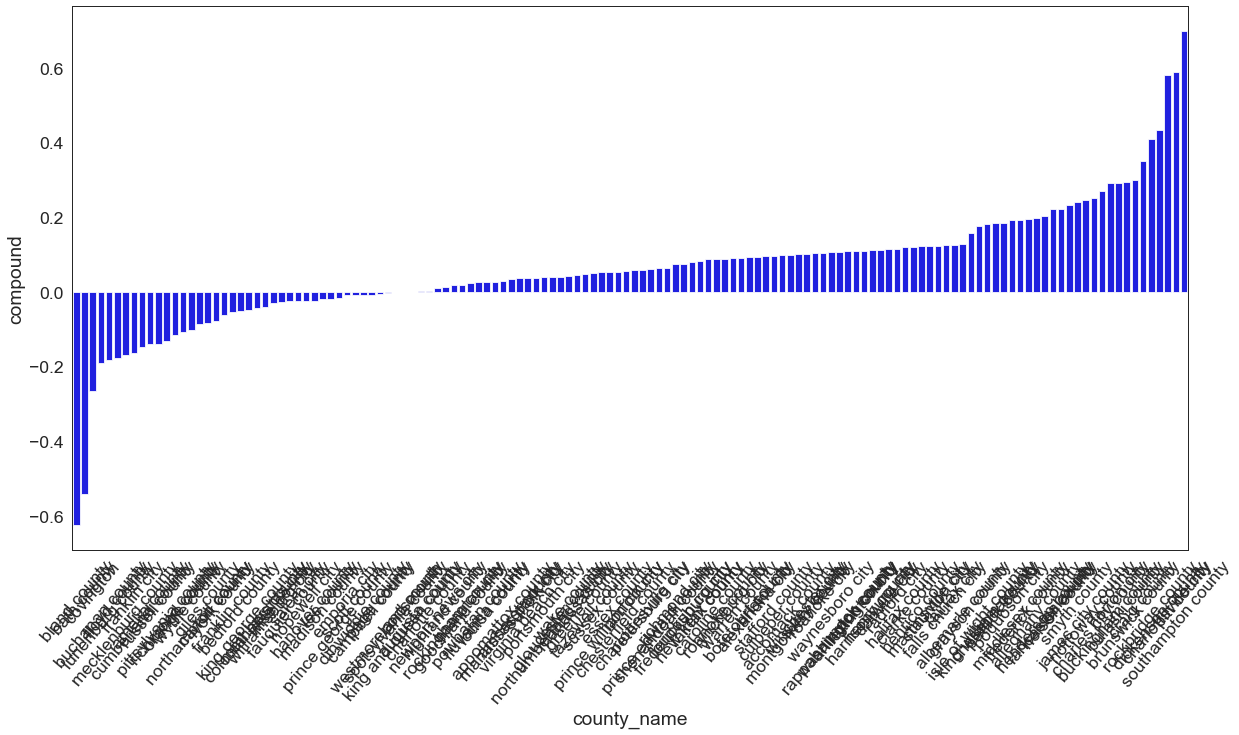

In [939]:
# Overall sentiment score by county - including all counties even with small sample sizes
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="county_name", y="compound", data=location, color="b")
plt.setp(ax.get_xticklabels(), rotation=50);

In [940]:
location.sort_values('count', ascending=False)
location_GT20 = location[location['count']>20]
location_GT20.sort_values('compound', ascending=True)

county_name       neg       neu       pos  compound  \
5    floyd county           0.121660  0.816226  0.062094 -0.176104   
6    mecklenburg county     0.104559  0.833838  0.061603 -0.170182   
7    franklin city          0.167292  0.760792  0.071875 -0.164837   
8    cumberland county      0.096091  0.848236  0.055691 -0.148627   
10   russell county         0.094500  0.837333  0.068167 -0.138950   
11   pittsylvania county    0.113975  0.814925  0.071025 -0.131048   
12   richmond county        0.083774  0.838097  0.078194 -0.114374   
13   orange county          0.124699  0.814807  0.060482 -0.108534   
14   wythe county           0.108000  0.822015  0.070015 -0.102578   
17   carroll county         0.103524  0.796810  0.099714 -0.077295   
18   york county            0.105671  0.808833  0.085481 -0.063102   
19   franklin county        0.098911  0.829678  0.071422 -0.054826   
20   bedford county         0.096678  0.822232  0.081090 -0.052158   
21   king george county     0.090881  0.827228  0.081921 -0.047749   
22   colonial heights city  0.080624  0.855471  0.063894 -0.042882   
23   mathews county         0.066415  0.866094  0.067491 -0.041787   
24   williamsburg city      0.087671  0.838009  0.074318 -0.030317   
25   wise county            0.102503  0.802554  0.094938 -0.028171   
26   fauquier county        0.090093  0.824390  0.085527 -0.025626   
27   salem city             0.094917  0.823328  0.081730 -0.024681   
28   hopewell city          0.099237  0.815237  0.085553 -0.024174   
29   hanover county         0.093044  0.820823  0.086109 -0.023337   
32   prince george county   0.086151  0.835914  0.078000 -0.015449   
34   scott county           0.104667  0.803564  0.091769 -0.007787   
35   dinwiddie county       0.084902  0.832549  0.082529 -0.007741   
36   campbell county        0.083667  0.858422  0.057822 -0.007313   
37   page county            0.075723  0.842638  0.081713 -0.004954   
38   westmoreland county    0.077409  0.845634  0.076925 -0.002881   
39   spotsylvania county    0.088580  0.822136  0.089302 -0.001110   
42   augusta county         0.096054  0.815554  0.088375  0.001358   
43   charlotte county       0.085179  0.830793  0.084013  0.002242   
44   newport news city      0.088527  0.821392  0.090080  0.009134   
45   highland county        0.057367  0.885133  0.057467  0.013193   
46   rockingham county      0.083098  0.821074  0.095838  0.017156   
47   goochland county       0.081937  0.812746  0.105317  0.017483   
48   hampton city           0.081199  0.831381  0.087420  0.023198   
49   powhatan county        0.077500  0.843800  0.078733  0.025185   
50   fluvanna county        0.100059  0.795990  0.103892  0.026015   
51   louisa county          0.083390  0.827699  0.088886  0.026863   
52   appomattox county      0.094093  0.803444  0.102481  0.028520   
53   manassas park city     0.090512  0.803988  0.105524  0.035010   
54   amherst county         0.087172  0.820919  0.091899  0.035745   
55   virginia beach city    0.083270  0.821143  0.095583  0.035837   
56   suffolk city           0.083576  0.821834  0.094596  0.036239   
57   portsmouth city        0.082314  0.831134  0.086550  0.040288   
58   northumberland county  0.072532  0.851709  0.075696  0.040359   
59   gloucester county      0.095726  0.798310  0.105952  0.040668   
61   manassas city          0.079087  0.827441  0.093474  0.044331   
62   greene county          0.070667  0.846786  0.082524  0.047324   
63   tazewell county        0.066308  0.847846  0.085846  0.049615   
64   sussex county          0.045483  0.881483  0.073034  0.051934   
65   prince william county  0.077130  0.828304  0.094571  0.052528   
66   essex county           0.084398  0.817861  0.097741  0.053319   
67   chesterfield county    0.085122  0.810088  0.104826  0.054359   
68   norfolk city           0.079118  0.824522  0.096359  0.058804   
69   charlottesville city   0.077043  0.828365  0.094592  0.059170   
70   petersburg city     

In [941]:
location_GT20.reset_index(inplace = True) 
location_GT20

level_0            county_name       neg       neu       pos  compound  \
0    5        floyd county           0.121660  0.816226  0.062094 -0.176104   
1    6        mecklenburg county     0.104559  0.833838  0.061603 -0.170182   
2    7        franklin city          0.167292  0.760792  0.071875 -0.164837   
3    8        cumberland county      0.096091  0.848236  0.055691 -0.148627   
4    10       russell county         0.094500  0.837333  0.068167 -0.138950   
5    11       pittsylvania county    0.113975  0.814925  0.071025 -0.131048   
6    12       richmond county        0.083774  0.838097  0.078194 -0.114374   
7    13       orange county          0.124699  0.814807  0.060482 -0.108534   
8    14       wythe county           0.108000  0.822015  0.070015 -0.102578   
9    17       carroll county         0.103524  0.796810  0.099714 -0.077295   
10   18       york county            0.105671  0.808833  0.085481 -0.063102   
11   19       franklin county        0.098911  0.829678  0.071422 -0.054826   
12   20       bedford county         0.096678  0.822232  0.081090 -0.052158   
13   21       king george county     0.090881  0.827228  0.081921 -0.047749   
14   22       colonial heights city  0.080624  0.855471  0.063894 -0.042882   
15   23       mathews county         0.066415  0.866094  0.067491 -0.041787   
16   24       williamsburg city      0.087671  0.838009  0.074318 -0.030317   
17   25       wise county            0.102503  0.802554  0.094938 -0.028171   
18   26       fauquier county        0.090093  0.824390  0.085527 -0.025626   
19   27       salem city             0.094917  0.823328  0.081730 -0.024681   
20   28       hopewell city          0.099237  0.815237  0.085553 -0.024174   
21   29       hanover county         0.093044  0.820823  0.086109 -0.023337   
22   32       prince george county   0.086151  0.835914  0.078000 -0.015449   
23   34       scott county           0.104667  0.803564  0.091769 -0.007787   
24   35       dinwiddie county       0.084902  0.832549  0.082529 -0.007741   
25   36       campbell county        0.083667  0.858422  0.057822 -0.007313   
26   37       page county            0.075723  0.842638  0.081713 -0.004954   
27   38       westmoreland county    0.077409  0.845634  0.076925 -0.002881   
28   39       spotsylvania county    0.088580  0.822136  0.089302 -0.001110   
29   42       augusta county         0.096054  0.815554  0.088375  0.001358   
30   43       charlotte county       0.085179  0.830793  0.084013  0.002242   
31   44       newport news city      0.088527  0.821392  0.090080  0.009134   
32   45       highland county        0.057367  0.885133  0.057467  0.013193   
33   46       rockingham county      0.083098  0.821074  0.095838  0.017156   
34   47       goochland county       0.081937  0.812746  0.105317  0.017483   
35   48       hampton city           0.081199  0.831381  0.087420  0.023198   
36   49       powhatan county        0.077500  0.843800  0.078733  0.025185   
37   50       fluvanna county        0.100059  0.795990  0.103892  0.026015   
38   51       louisa county          0.083390  0.827699  0.088886  0.026863   
39   52       appomattox county      0.094093  0.803444  0.102481  0.028520   
40   53       manassas park city     0.090512  0.803988  0.105524  0.035010   
41   54       amherst county         0.087172  0.820919  0.091899  0.035745   
42   55       virginia beach city    0.083270  0.821143  0.095583  0.035837   
43   56       suffolk city           0.083576  0.821834  0.094596  0.036239   
44   57       portsmouth city        0.082314  0.831134  0.086550  0.040288   
45   58       northumberland county  0.072532  0.851709  0.075696  0.040359   
46   59       gloucester county      0.095726  0.798310  0.105952  0.040668   
47   61       manassas city          0.079087  0.827441  0.093474  0.044331   
48   62       greene county          0.070667  0.846786  0.082524  0.047324   
49   63       tazewell county        0.066308  0.847846

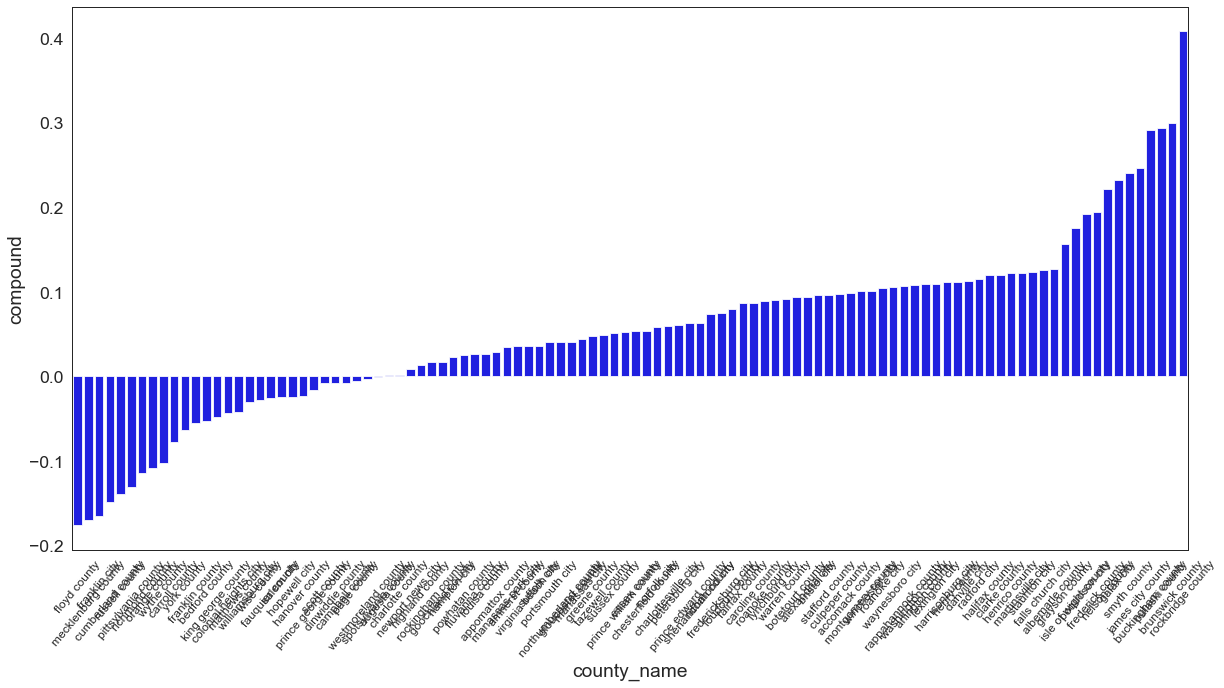

In [942]:
# Overall sentiment score by county - Removed counites with less than 20 tweets
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="county_name", y="compound", data=location_GT20, color="b")
plt.setp(ax.get_xticklabels(), size=12, rotation=50);
plt.savefig("Sentiment by County - more than 20", tight_layout=False)

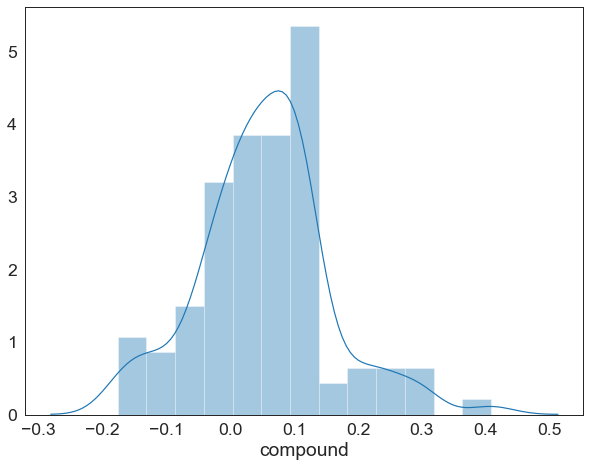

In [943]:
plt.figure(figsize=(10, 7.5))
ax = sns.distplot(location_GT20.compound)

In [944]:
location_GT20.compound.describe()

count    104.000000
mean     0.054169  
std      0.102907  
min     -0.176104  
25%     -0.005544  
50%      0.052924  
75%      0.107070  
max      0.408312  
Name: compound, dtype: float64

In [945]:
location_GT20 = location_GT20.sort_values('compound', ascending=False)
location_GT20

level_0            county_name       neg       neu       pos  compound  \
103  131      rockbridge county      0.050898  0.800163  0.149061  0.408312   
102  129      brunswick county       0.029265  0.854118  0.116618  0.300274   
101  128      pulaski county         0.061804  0.791451  0.146765  0.293649   
100  126      buckingham county      0.032162  0.852041  0.115851  0.291184   
99   123      james city county      0.044636  0.839955  0.115409  0.246841   
98   122      smyth county           0.048040  0.813520  0.138440  0.240552   
97   121      galax city             0.067538  0.811077  0.121346  0.232112   
96   120      nelson county          0.055796  0.838204  0.105991  0.221200   
95   116      frederick county       0.072109  0.807655  0.120200  0.194340   
94   114      poquoson city          0.062333  0.823846  0.113821  0.191605   
93   110      isle of wight county   0.064838  0.822771  0.112384  0.175105   
92   109      grayson county         0.132294  0.717941  0.149824  0.156132   
91   108      albemarle county       0.087110  0.803128  0.109826  0.127652   
90   106      falls church city      0.060626  0.845169  0.094193  0.126064   
89   105      staunton city          0.065309  0.829396  0.105287  0.123197   
88   104      martinsville city      0.065728  0.832778  0.101469  0.122672   
87   103      henrico county         0.067312  0.823481  0.109197  0.121808   
86   102      clarke county          0.069714  0.804821  0.125500  0.120107   
85   101      halifax county         0.035438  0.894181  0.070343  0.119450   
84   100      radford city           0.067559  0.835794  0.096647  0.115063   
83   99       danville city          0.074491  0.815509  0.110028  0.113405   
82   98       henry county           0.052818  0.857018  0.090164  0.112144   
81   97       harrisonburg city      0.062058  0.843759  0.094174  0.111199   
80   96       lexington city         0.057952  0.856234  0.085828  0.109872   
79   95       arlington county       0.064577  0.840288  0.095134  0.108842   
78   94       washington county      0.062868  0.834208  0.102888  0.108664   
77   93       rappahannock county    0.056833  0.848254  0.094884  0.106538   
76   92       waynesboro city        0.065969  0.827990  0.105990  0.105738   
75   91       roanoke city           0.064923  0.840909  0.094171  0.104758   
74   89       winchester city        0.061809  0.842945  0.095253  0.101458   
73   88       montgomery county      0.069013  0.833244  0.097750  0.101031   
72   87       accomack county        0.067184  0.840061  0.092816  0.099282   
71   86       culpeper county        0.078583  0.817138  0.104276  0.097468   
70   85       stafford county        0.072847  0.823101  0.104052  0.096217   
69   84       bristol city           0.060894  0.853374  0.085723  0.095878   
68   83       alexandria city        0.068667  0.836018  0.095315  0.094229   
67   82       botetourt county       0.089519  0.809333  0.101111  0.093648   
66   81       warren county          0.070048  0.830333  0.099648  0.091077   
65   80       lynchburg city         0.066760  0.835181  0.098052  0.090053   
64   79       roanoke county         0.059380  0.854339  0.086223  0.088983   
63   78       caroline county        0.093280  0.812680  0.094120  0.086764   
62   77       fairfax county         0.069891  0.835102  0.095007  0.086750   
61   75       loudoun county         0.069807  0.837276  0.092909  0.079508   
60   74       fredericksburg city    0.073237  0.831630  0.095135  0.074487   
59   73       richmond city          0.072810  0.833857  0.093328  0.074122   
58   72       shenandoah county      0.079338  0.820532  0.100156  0.062927   
57   71       prince edward county   0.081909  0.828265  0.089788  0.062920   
56   70       petersburg city        0.064751  0.854589  0.080622  0.060949   
55   69       charlottesville city   0.077043  0.828365  0.094592  0.059170   
54   68       norfolk city           0.079118  0.824522

# Pull in COVID tracking data
Recorded cases per capita

In [950]:
##### SET DAY FOR ANALYSIS #####

day_per = '2020-05-14_per'

In [948]:
per_capita = pd.read_csv("cases_per_1000.csv") 
per_capita

Unnamed: 0           county_lower          percent_VA_pop  \
0    0           accomack county        0.003891476048679225     
1    1           albemarle county       0.012640581979026297     
2    2           alexandria city        0.018601046331883885     
3    3           alleghany county       0.0018167828135150766    
4    4           amelia county          0.001527732976901923     
5    5           amherst county         0.0037892627018505606    
6    6           appomattox county      0.0018513689576164039    
7    7           arlington county       0.027550419110377818     
8    8           augusta county         0.008878417699358218     
9    9           bedford county         0.009259578400846041     
10   10          botetourt county       0.003948525358537084     
11   11          bristol city           0.0020018365123665076    
12   12          brunswick county       0.0019806807266275514    
13   13          buchanan county        0.0026311617117360177    
14   14          buckingham county      0.0020209718017146646    
15   15          buena vista city       0.0007605386120425864    
16   16          campbell county        0.0065571050517877       
17   17          caroline county        0.0035874507682283835    
18   18          carroll county         0.0035344424511521227    
19   19          charles city county    0.0008313748384494283    
20   20          charlotte county       0.001437523755689183     
21   21          charlottesville city   0.005591070071527949     
22   22          chesapeake city        0.028265555979991856     
23   23          chesterfield county    0.04034420225691824      
24   24          clarke county          0.0017073194502253092    
25   25          colonial heights city  0.0020909760590194127    
26   26          covington city         0.0006634359325553551    
27   27          craig county           0.0006076940027150718    
28   28          culpeper county        0.00599612017151875      
29   29          cumberland county      0.0011630928047271058    
30   30          danville city          0.004933814480873862     
31   31          dinwiddie county       0.0033644830488672502    
32   32          emporia city           0.0006395465340523765    
33   33          essex county           0.001311658715815281     
34   34          fairfax county         0.1359115421925999       
35   35          fairfax city           0.0028364203744954404    
36   36          falls church city      0.0016719013370218882    
37   37          fauquier county        0.008214506355887382     
38   38          floyd county           0.0018619468504858818    
39   39          fluvanna county        0.003123687420175536     
40   40          franklin county        0.006683445502577084     
41   41          franklin city          0.0009758997567560051    
42   42          frederick county       0.010120666421513104     
43   43          fredericksburg city    0.003383618338215407     
44   44          galax city             0.0007889444142426455    
45   45          giles county           0.001998389783229262     
46   46          gloucester county      0.004416686257558142     
47   47          goochland county       0.0026720470504674834    
48   48          grayson county         0.0018791804961721102    
49   49          greene county          0.002306931467377184     
50   50          greensville county     0.0013857039659016274    
51   51          halifax county         0.004133579057388516     
52   52          hampton city           0.016114409538454444     
53   53          hanover county         0.012414048677799046     
54   54          harrisonburg city      0.006345666047127009     
55   55          henrico county         0.03870344033486043      
56   56          henry county           0.006131374576973425     
57   57          highland county        0.0002631399417193759    
58   58          hopewell city          0.0026632519485310633    
59   59          isle of wight county   0.004

In [1436]:
# County reported COVID cases per 1000 people
per_capita = pd.read_csv("cases_per_1000.csv") 
per_capita = per_capita[['county_lower',day_per]]#select just county_name and today's numbers
per_capita.columns=('county_name', day_per)
per_capita.head()

county_name  2020-05-14_per
0  accomack county   18.111294     
1  albemarle county  1.222321      
2  alexandria city   8.619533      
3  alleghany county  0.392516      
4  amelia county     1.322546

In [952]:
# Merge with Average Sentiment score as of today
per_capita_today = pd.merge(location_GT20, per_capita, on='county_name')
per_capita_today = per_capita_today[['county_name', 'compound', day_per]]
per_capita_today['State']="Virginia"
per_capita_today.rename(columns={'compound':'sentiment'}, inplace=True)
# Save Cases Per Capita Data set
per_capita_today.to_csv("/Users/rachelmartonik/MSDS_498_Capstone/data/per_capita_today.csv")

In [1435]:
per_capita_today.head()

county_name  sentiment  2020-05-14_per     State
0  rockbridge county  0.408312   0.488693        Virginia
1  brunswick county   0.300274   1.200120        Virginia
2  pulaski county     0.293649   0.292107        Virginia
3  buckingham county  0.291184   20.465773       Virginia
4  james city county  0.246841   2.346500        Virginia

## SNAPSHOT -  Confirmed Cases (per 1000) as of Today & Mean Sentiment Score

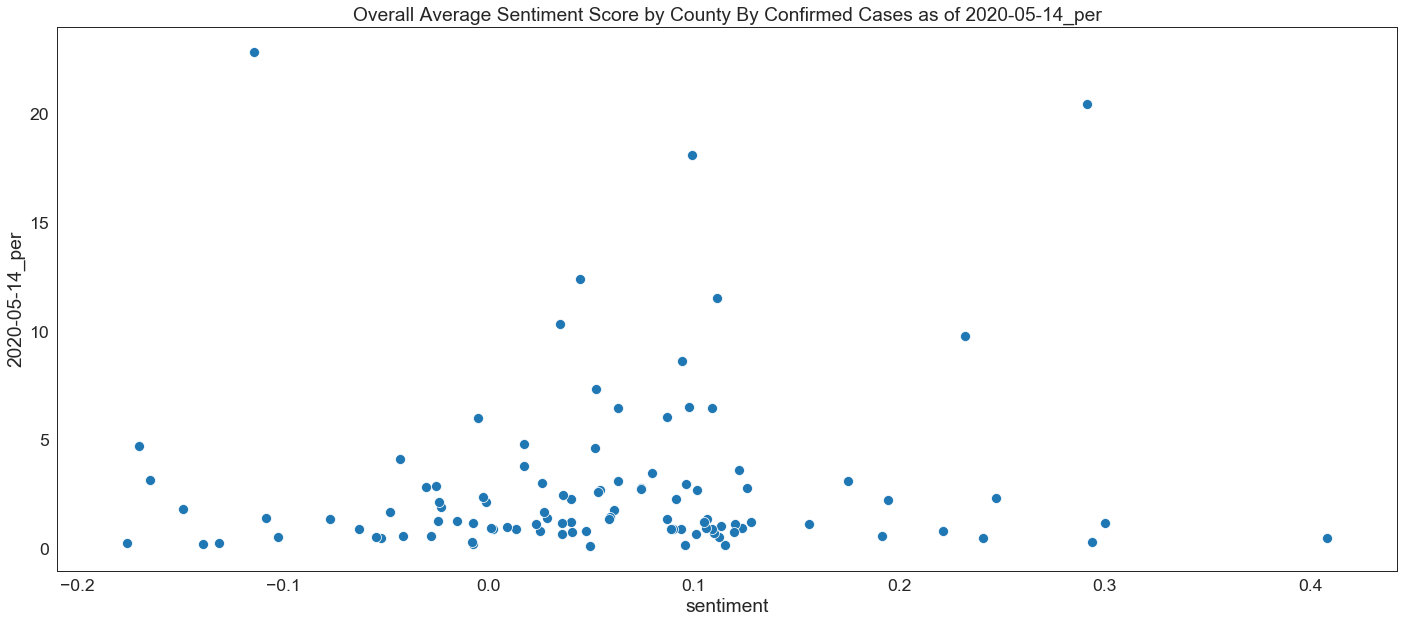

In [1438]:
day = day_per
sns.set_context("paper", font_scale=2)  
ax = sns.scatterplot(x="sentiment", y=day, s=100,
                     data=per_capita_today).set_title(f'Overall Average Sentiment Score by County By Confirmed Cases as of {day}')

# Average sentiment score by confirmed COVID-19 cases as of today
# Does not seem to be relationship

In [957]:
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
covariance = np.cov(per_capita_today[day], per_capita_today['sentiment'])
covariance

array([[1.55500069e+01, 2.99336436e-02],
       [2.99336436e-02, 1.06471400e-02]])

In [958]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(per_capita_today[day], per_capita_today['sentiment'])
print('Pearsons correlation: %.3f' % corr)
# Low correlation between overall sentiment and daily covid cases

Pearsons correlation: 0.074


## Deaths as of Today & Mean Sentiment Score

In [1439]:
per_capita_deaths = pd.read_csv("deaths_per_1000.csv") 
per_capita_deaths = per_capita_deaths[['county_lower', day]]#select just county_name and today's numbers
per_capita_deaths.columns=('county_name', day)
per_capita_deaths = per_capita_deaths[per_capita_deaths[day] >0]
per_capita_deaths.head()

county_name  2020-05-14_per
0  accomack county   0.244334      
1  albemarle county  0.037610      
2  alexandria city   0.204466      
4  amelia county     0.077797      
7  arlington county  0.301981

In [992]:
per_capita_deaths_today = pd.merge(location_GT20, per_capita_deaths, on='county_name')
per_capita_deaths_today = per_capita_deaths_today[['county_name', 'compound', '2020-05-14_per']]
per_capita_deaths_today['State']="Virginia"
per_capita_deaths_today.rename(columns={'compound':'sentiment'}, inplace=True)
# Save Cases Per Capita Data set
per_capita_deaths_today.to_csv("/Users/rachelmartonik/MSDS_498_Capstone/data/per_capita_deaths_today.csv")

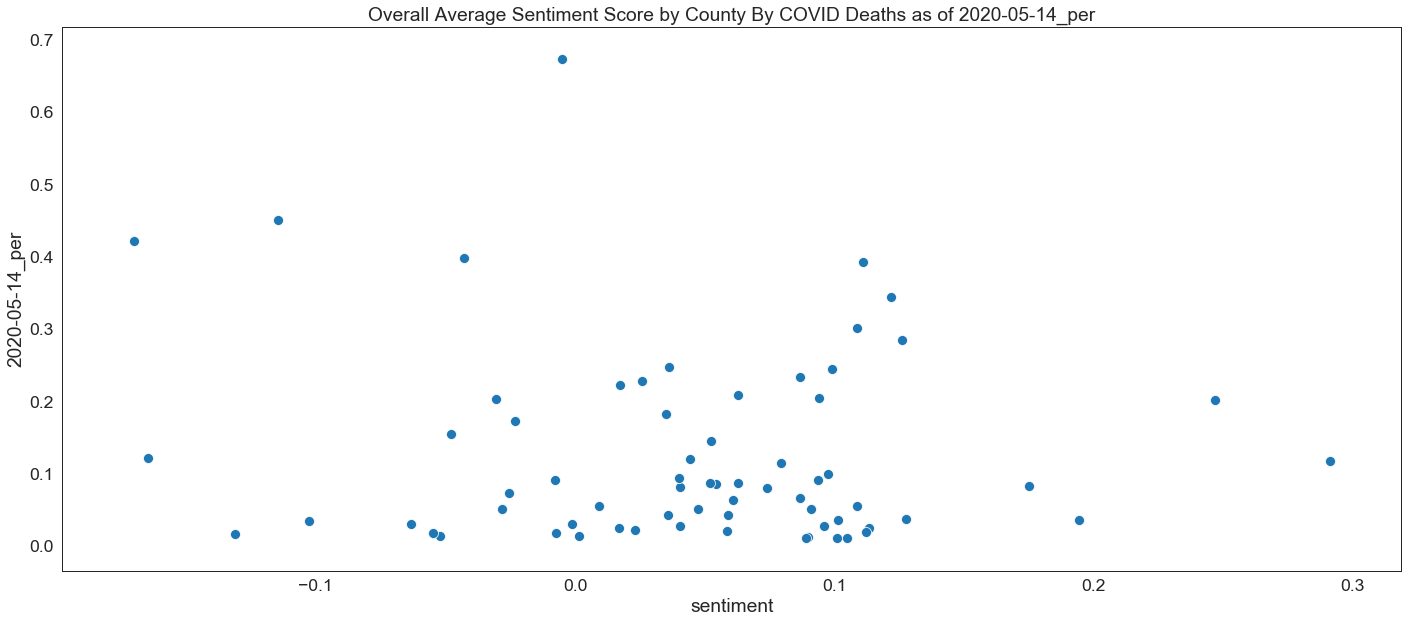

In [993]:
day = "2020-05-14_per"
sns.set_context("paper", font_scale=2)  
ax = sns.scatterplot(x="sentiment", y=day, s=100,
                     data=per_capita_deaths_today).set_title(f'Overall Average Sentiment Score by County By COVID Deaths as of {day}')

In [994]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(per_capita_deaths_today[day], per_capita_deaths_today['sentiment'])
print('Pearsons correlation: %.3f' % corr)
# Low correlation between overall sentiment and daily covid cases

Pearsons correlation: -0.123


# Daily Sentiment Data

In [ ]:
# Pull individual daily data sets from cleaned merged data
data_0407_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-07']
data_0408_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-08']
data_0409_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-09']
data_0410_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-10']
data_0411_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-11']
data_0412_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-12']
data_0413_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-13']
data_0414_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-14']
data_0415_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-15']
data_0416_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-16']
data_0417_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-17']
data_0418_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-18']
data_0419_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-19']
data_0420_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-20']
data_0421_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-21']
data_0422_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-22']
data_0423_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-23']
data_0424_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-24']
data_0425_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-25']
data_0426_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-26']
data_0427_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-27']
data_0428_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-28']
data_0429_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-29']
data_0430_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-04-30']
data_0501_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-01']
data_0502_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-02']
data_0503_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-03']
data_0504_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-04']
data_0505_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-05']
data_0506_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-06']
data_0507_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-07']
data_0508_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-08']
data_0509_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-09']
data_0510_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-10']
data_0511_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-11']
data_0512_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-12']
data_0513_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-13']
data_0514_clean = merged_cleaned_data[merged_cleaned_data['X1']=='2020-05-14']

In [ ]:
# LIST OF DAILY DATA SETS TO PROCESS
dates_cleaned = [data_0407_clean, data_0408_clean, data_0409_clean, data_0410_clean, data_0411_clean, data_0412_clean,
                data_0413_clean, data_0414_clean, data_0415_clean, data_0416_clean, data_0417_clean, data_0418_clean, 
                 data_0419_clean, data_0420_clean, data_0421_clean, data_0422_clean, data_0423_clean, data_0424_clean, 
                 data_0425_clean, data_0426_clean, data_0427_clean, data_0428_clean, data_0429_clean, data_0430_clean,
                data_0501_clean, data_0502_clean, data_0503_clean, data_0504_clean, data_0505_clean, data_0506_clean, 
                 data_0507_clean, data_0508_clean, data_0509_clean, data_0510_clean, data_0511_clean, data_0512_clean,
                data_0513_clean, data_0514_clean]

In [962]:
# for i in dates_cleaned:
#     print(len(i))

In [963]:
#create list of all texts for cleaning
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
daily_score_list = [] # Create blank daily score list

# For each daily data set, process tweet sentiment
def process_daily_sentiment(data):
        
    text_body=[] #Loop through tweet to prepare for sentiment analysis
    for i in range(0,len(data)):
        temp_text=data['text'].iloc[i]
        text_body.append(temp_text)
    
    sentences = text_body # Sentiment analysis

    
    sentiment_score = [] # Append sentiment analysis results to a list
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        sentiment_score.append(vs)
    
    daily = pd.DataFrame(sentiment_score)
    score = daily.compound.mean() #prepare mean VA sentiment score
    daily_score_list.append(score)
    return daily_score_list   

In [964]:
for date in dates_cleaned:
    process_daily_sentiment(date)

In [965]:
daily_score_list

[0.08242407135874896,
 0.07513975664266219,
 0.09194146341463418,
 0.09534975051364841,
 0.02779823008849555,
 0.042260612460401206,
 0.07807433574879245,
 0.08876985947806154,
 0.07201477528089896,
 0.07847968390804604,
 0.09195379782981143,
 0.033639401140684436,
 0.001626569037656912,
 0.06313636061210917,
 0.06832975285171115,
 0.07462842916800529,
 0.08207258711069995,
 0.08550285464608225,
 0.0326106989247312,
 0.05423998790078642,
 0.08490783555867923,
 0.07867140966247543,
 0.08383822793854961,
 0.08653100404560513,
 0.07529955207166841,
 0.07198775113415418,
 0.03129436619718314,
 0.07188888027896173,
 0.11353862275449104,
 0.0831899047619048,
 0.08591529778123784,
 0.08239712619741767,
 0.02669549731182797,
 0.020364234620887014,
 0.08283467505241111,
 0.07300582677165351,
 0.08235805409769895,
 0.07722722791050454]

In [966]:
date_labels = ['4/7', '4/8', '4/9', '4/10', '4/11', '4/12', '4/13', '4/14', '4/15', '4/16',
                       '4/17', '4/18', '4/19', '4/20', '4/21', '4/22', '4/23', '4/24', '4/25', '4/26', '4/27',
              '4/28', '4/29', '4/30', '5/1', '5/2', '5/3', '5/4', '5/5', '5/6', '5/7', '5/8', '5/9', '5/10',
              '5/11', '5/12', '5/13', '5/14']

In [967]:
daily_sentiment_VA = pd.DataFrame(list(zip(date_labels, daily_score_list)), 
               columns =['Date', 'Sentiment_Score']) 

In [968]:
daily_sentiment_VA

Date  Sentiment_Score
0   4/7   0.082424       
1   4/8   0.075140       
2   4/9   0.091941       
3   4/10  0.095350       
4   4/11  0.027798       
5   4/12  0.042261       
6   4/13  0.078074       
7   4/14  0.088770       
8   4/15  0.072015       
9   4/16  0.078480       
10  4/17  0.091954       
11  4/18  0.033639       
12  4/19  0.001627       
13  4/20  0.063136       
14  4/21  0.068330       
15  4/22  0.074628       
16  4/23  0.082073       
17  4/24  0.085503       
18  4/25  0.032611       
19  4/26  0.054240       
20  4/27  0.084908       
21  4/28  0.078671       
22  4/29  0.083838       
23  4/30  0.086531       
24  5/1   0.075300       
25  5/2   0.071988       
26  5/3   0.031294       
27  5/4   0.071889       
28  5/5   0.113539       
29  5/6   0.083190       
30  5/7   0.085915       
31  5/8   0.082397       
32  5/9   0.026695       
33  5/10  0.020364       
34  5/11  0.082835       
35  5/12  0.073006       
36  5/13  0.082358       
37  5/14  0.077227

In [969]:
daily_sentiment_VA.Sentiment_Score.describe()

count    38.000000
mean     0.069262 
std      0.024606 
min      0.001627 
25%      0.064435 
50%      0.077651 
75%      0.083676 
max      0.113539 
Name: Sentiment_Score, dtype: float64

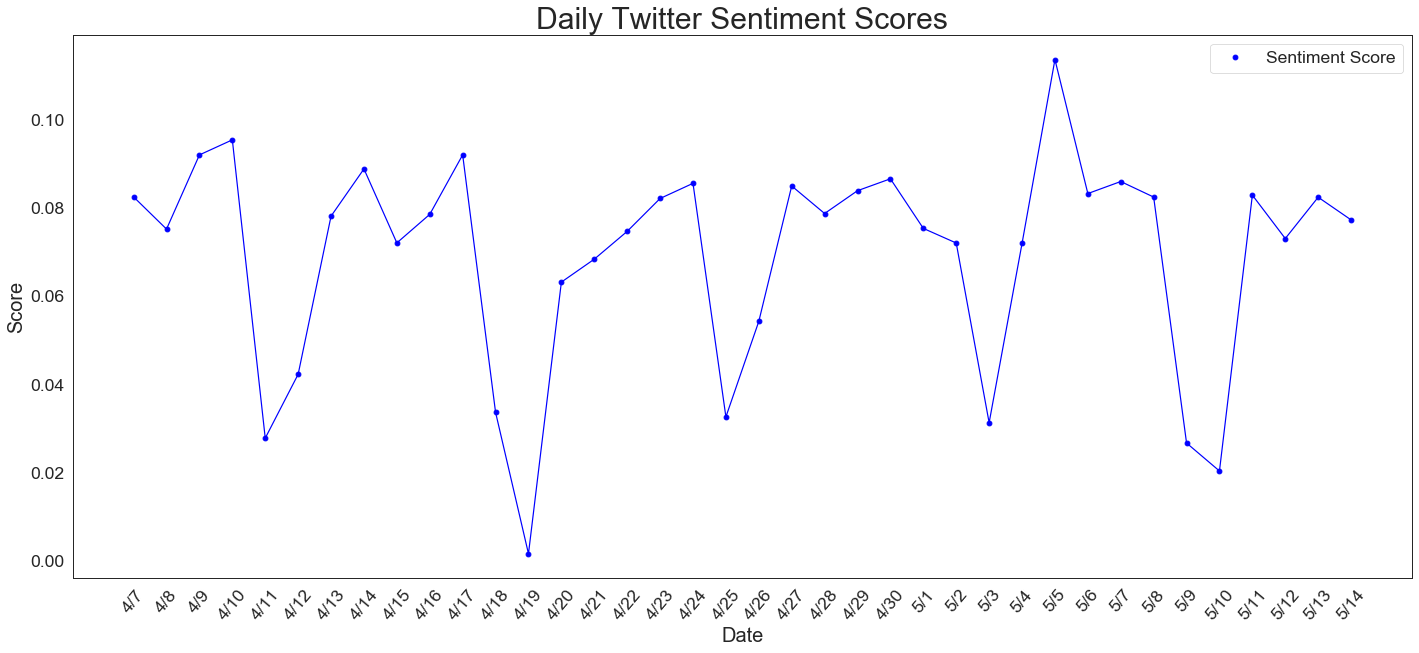

In [986]:
import matplotlib.pyplot as plt

Date = daily_sentiment_VA['Date']
Sentiment = daily_sentiment_VA['Sentiment_Score']

# "bo" is for "blue dot"
plt.plot(Date, Sentiment, 'bo', label='Sentiment Score')
plt.plot(Date, Sentiment, 'b')
# b is for "solid blue line"
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Daily Twitter Sentiment Scores', size=30)
plt.xlabel('Date', size = 20)
plt.ylabel('Score', size = 20)
plt.xticks(rotation=50);
plt.legend()
plt.savefig("DSS-Overall", tight_layout=False)

plt.show()

What happened on 5/5??? Why did sentiment spike?

 - Northam said things could reopen on Firday, 
 - Cinco de Mayo, Taco Tuesday, Coronavirus
 - Giving Tuesday day of action: https://www.givingtuesday.org/blog/2020/03/givingtuesday-announces-day-global-action-giving-and-unity-response-covid-19

## FOR REVIEW = Tweets from Specific Day

In [1015]:
data = data_0505_clean
len(data)

2672

In [1016]:
#create list of all texts for cleaning
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_score(data):
    text_body=[]
    
    for i in range(0,len(data)):
        temp_text=data['text'].iloc[i]
        text_body.append(temp_text)
    
    analyzer = SentimentIntensityAnalyzer()
    sentences = text_body


    sentiment_score = []
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        sentiment_score.append(vs)
    
        a = pd.DataFrame(sentiment_score)
    #df = pd.concat([a, text_body_df], axis=1)
    return a

In [1017]:
sent = sentiment_score(data)


In [1018]:
#create list of all texts for cleaning

text_body=[]
for i in range(0,len(data)):
    temp_text=data['text'].iloc[i]
    text_body.append(temp_text)
    
text_body_df = pd.DataFrame(text_body)
text_body_df.columns=['text']

In [1019]:
data_county = pd.DataFrame(data["county_name"])
data_county.reset_index(inplace=True)


In [1434]:
df = pd.concat([sent, text_body_df], axis=1)
df.head(10)

neg    neu    pos  compound  \
0  0.000  0.808  0.192  0.2263     
1  0.000  0.639  0.361  0.9555     
2  0.000  0.803  0.197  0.7644     
3  0.000  0.928  0.072  0.1027     
4  0.066  0.761  0.173  0.4767     
5  0.161  0.839  0.000 -0.4005     
6  0.000  1.000  0.000  0.0000     
7  0.056  0.873  0.070  0.1280     
8  0.000  1.000  0.000  0.0000     
9  0.176  0.824  0.000 -0.4939     

                                                                                                                                                                                                                                                                                                                   text  
0  Class Actions Spark Concerns Over Coronavirus Coverage Spats https://t.co/oDNA05OZke                                                                                                                                                                                                                                  
1  Thursdays are for learning and laughing with fellow principals.\n\n"#PrincipalingInPlace webinars have restored peace and structure to my Thursday evenings! So grateful [to] @NAESP ... for organizing these outstanding sessions!" - @GlenMessier \n\nRegister at https://t.co/EHzhuJBSjL. https://t.co/qDDoDPo1OT  
2  We're LIVE with #LiveAt5 ET! Join @GPletnick and @Cardwell16 and your superintendent and principal peers for a live meeting that focuses on helping you develop strategic solutions to serve kids. Join the meeting at https://t.co/LlZ0dCm1AF. #NextBestTogether @NAESP @AASAHQ https://t.co/mMAcuoO8WI              
3  #Texas hair salons, barbershops, nail salons cleared to reopen Friday, Gov. #GregAbbott says.\n"Friday in Texas" 👍 https://t.co/lZM1lQ6Vjm                                                                                                                                                                            
4  @JayHightmanJr I forget now, Kushner was on this one, right? I mean, Mr. Fixit of the Middle East has surely solved the coronavirus by now.                                                                                                                                                                           
5  The Coronavirus Has Mutated and Appears To Be More Contagious Now, New Study Finds  https://t.co/sBr8Ci9IDZ                                                                                                                                                                                                           
6  In the latest CNA #InDepth, Elliot Harkavy writes about law enforcement reforms made in adjusting to #COVID19, and which ones could be here to stay. #coronavirus\n\nhttps://t.co/9Qu4dOcKXL https://t.co/pAt9noD5Rj                                                                                                  
7  The unprecedented nature of COVID-19 means that districts remain unsure of how much #learningloss students will experience. Use our discussion guide to understand where #learninggaps may occur and identify needed supports https://t.co/EwY7QQMBSx https://t.co/7GtnTNnBLK                                         
8  Grapes, Bread and #lockdown #COVID19 #diary Week 7\nhttps://t.co/hwmZA4iGbp https://t.co/5TlBEFKxXC                                                                                                                                                                                                                   
9  Rotting food. Hungry masses. Chaotic supply chains. Coronavirus upends the U.S. food system https://t.co/tuhxM7Tqhc via @YahooNews

In [1021]:
df = pd.concat([data_county, df], axis=1)
df.head(10)

index           county_name    neg    neu    pos  compound  \
0     217    richmond city         0.000  0.808  0.192  0.2263     
1     399    alexandria city       0.000  0.639  0.361  0.9555     
2     400    alexandria city       0.000  0.803  0.197  0.7644     
3     406    fairfax county        0.000  0.928  0.072  0.1027     
4     1259   charlottesville city  0.066  0.761  0.173  0.4767     
...    ...                    ...    ...    ...    ...     ...     
2667  44644  richmond city         0.364  0.574  0.062 -0.9274     
2668  44650  alexandria city       0.063  0.777  0.160  0.6114     
2669  44666  roanoke city          0.000  0.881  0.119  0.5007     
2670  44667  fairfax county        0.000  0.856  0.144  0.4926     
2671  44701  loudoun county        0.091  0.706  0.203  0.6249     

                                                                                                                                                                                                                                                                                                                      text  
0     Class Actions Spark Concerns Over Coronavirus Coverage Spats https://t.co/oDNA05OZke                                                                                                                                                                                                                                  
1     Thursdays are for learning and laughing with fellow principals.\n\n"#PrincipalingInPlace webinars have restored peace and structure to my Thursday evenings! So grateful [to] @NAESP ... for organizing these outstanding sessions!" - @GlenMessier \n\nRegister at https://t.co/EHzhuJBSjL. https://t.co/qDDoDPo1OT  
2     We're LIVE with #LiveAt5 ET! Join @GPletnick and @Cardwell16 and your superintendent and principal peers for a live meeting that focuses on helping you develop strategic solutions to serve kids. Join the meeting at https://t.co/LlZ0dCm1AF. #NextBestTogether @NAESP @AASAHQ https://t.co/mMAcuoO8WI              
3     #Texas hair salons, barbershops, nail salons cleared to reopen Friday, Gov. #GregAbbott says.\n"Friday in Texas" 👍 https://t.co/lZM1lQ6Vjm                                                                                                                                                                            
4     @JayHightmanJr I forget now, Kushner was on this one, right? I mean, Mr. Fixit of the Middle East has surely solved the coronavirus by now.                                                                                                                                                                           
...                                                                                                                                           ...                                                                                                                                                                           
2667  #DYK many traditional financial crimes and money laundering schemes are now orchestrated via cryptocurrencies? Protect yourself from fraud and attempted fraud: https://t.co/6WdcZ9wAfD. \nReport scams and fraud to https://t.co/RzDTTW09QB. https://t.co/y1ROtGl4zB                                                 
2668  Stand with other #hospice and #palliative care advocates by asking Congress to provide relief for providers in the next COVID-19 Emergency Package! Just two minutes out of your day will make a difference: https://t.co/9bljC0qPfg https://t.co/jzIKs7Kd5c                                                          
2669  Calling out all fellow #VirginiaTech #hokies. Trying to plan a special covid 19 commencement ceremony and looking for #hokiebird feet. Anyone have any, or ideas???                                                                                                                                                   
2670  Thanks for al

In [1022]:
# Check to see where the Giving Tuesday Tweets are coming from
a = pd.DataFrame(df.county_name.value_counts()/138)
a.reset_index(inplace=True)
a.columns=['county_lower', 'percent_of_tweets']
a

county_lower  percent_of_tweets
0   fairfax county         2.898551         
1   richmond city          2.507246         
2   arlington county       2.123188         
3   alexandria city        1.804348         
4   charlottesville city   1.195652         
5   norfolk city           0.847826         
6   essex county           0.811594         
7   virginia beach city    0.797101         
8   loudoun county         0.789855         
9   prince william county  0.405797         
10  culpeper county        0.355072         
11  roanoke city           0.347826         
12  isle of wight county   0.311594         
13  suffolk city           0.304348         
14  williamsburg city      0.260870         
15  chesterfield county    0.253623         
16  montgomery county      0.253623         
17  fredericksburg city    0.246377         
18  harrisonburg city      0.217391         
19  falls church city      0.202899         
20  hampton city           0.195652         
21  newport news city      0.159420         
22  henrico county         0.152174         
23  lynchburg city         0.152174         
24  manassas city          0.144928         
25  charlotte county       0.115942         
26  hanover county         0.108696         
27  winchester city        0.101449         
28  portsmouth city        0.094203         
29  york county            0.072464         
30  fauquier county        0.057971         
31  king george county     0.050725         
32  stafford county        0.050725         
33  bristol city           0.050725         
34  petersburg city        0.043478         
35  staunton city          0.043478         
36  rockingham county      0.043478         
37  wise county            0.036232         
38  roanoke county         0.036232         
39  bedford county         0.036232         
40  martinsville city      0.036232         
41  salem city             0.036232         
42  danville city          0.028986         
43  westmoreland county    0.028986         
44  prince edward county   0.028986         
45  fluvanna county        0.021739         
46  louisa county          0.021739         
47  powhatan county        0.021739         
48  amherst county         0.021739         
49  gloucester county      0.021739         
50  washington county      0.021739         
51  shenandoah county      0.021739         
52  colonial heights city  0.014493         
53  albemarle county       0.014493         
54  pulaski county         0.014493         
55  lexington city         0.014493         
56  warren county          0.014493         
57  spotsylvania county    0.014493         
58  clarke county          0.014493         
59  middlesex county       0.014493         
60  prince george county   0.014493         
61  hopewell city          0.014493         
62  carroll county         0.014493         
63  frederick county       0.014493         
64  james city county      0.014493         
65  tazewell county        0.014493         
66  waynesboro city        0.014493         
67  manassas park city     0.014493         
68  halifax county         0.007246         
69  king william county    0.007246         
70  mecklenburg county     0.007246         
71  accomack county        0.007246         
72  brunswick county       0.007246         
73  buckingham county      0.007246         
74  page county            0.007246         
75  appomattox county      0.007246         
76  new kent county        0.007246         
77  northumberland county  0.007246         
78  franklin city          0.007246         
79  mathews county         0.007246         
80  goochland county       0.007246         
81  lee county             0.007246         
82  nelson county          0.007246         
83  franklin county        0.007246         
84  madison county         0.007246         
85  grayson county         0.007246         
86  henry county           0.007246

In [1023]:
county_population = pd.read_pickle('/Users/rachelmartonik/covid/county_population.pkl')
df_population = pd.merge(county_population, a, on='county_lower')
df_population.sort_values('percent_of_tweets', ascending=False)

#GivingTuesday Tweets are coming dispropotionaly from Arlington and Alexandria and Richmond

county  total_pop           county_lower  percent_VA_pop  \
14  Fairfax                1143529    fairfax county         0.135912         
78  Richmond city          223787     richmond city          0.026598         
4   Arlington              231803     arlington county       0.027550         
58  Alexandria city        156505     alexandria city        0.018601         
60  Charlottesville city   47042      charlottesville city   0.005591         
75  Norfolk city           245592     norfolk city           0.029189         
13  Essex                  11036      essex county           0.001312         
83  Virginia Beach city    450135     virginia beach city    0.053500         
31  Loudoun                385143     loudoun county         0.045775         
45  Prince William         456749     prince william county  0.054286         
12  Culpeper               50450      culpeper county        0.005996         
79  Roanoke city           99621      roanoke city           0.011840         
26  Isle of Wight          36372      isle of wight county   0.004323         
82  Suffolk city           89160      suffolk city           0.010597         
85  Williamsburg city      14788      williamsburg city      0.001758         
10  Chesterfield           339447     chesterfield county    0.040344         
37  Montgomery             97997      montgomery county      0.011647         
65  Fredericksburg city    28469      fredericksburg city    0.003384         
67  Harrisonburg city      53391      harrisonburg city      0.006346         
63  Falls Church city      14067      falls church city      0.001672         
66  Hampton city           135583     hampton city           0.016114         
74  Newport News city      180145     newport news city      0.021411         
24  Henrico                325642     henrico county         0.038703         
70  Lynchburg city         80131      lynchburg city         0.009524         
71  Manassas city          41457      manassas city          0.004927         
9   Charlotte              12095      charlotte county       0.001438         
23  Hanover                104449     hanover county         0.012414         
86  Winchester city        27789      winchester city        0.003303         
77  Portsmouth city        95311      portsmouth city        0.011328         
57  York                   67587      york county            0.008033         
15  Fauquier               69115      fauquier county        0.008215         
28  King George            25890      king george county     0.003077         
59  Bristol city           16843      bristol city           0.002002         
51  Stafford               144012     stafford county        0.017116         
76  Petersburg city        31827      petersburg city        0.003783         
81  Staunton city          24452      staunton city          0.002906         
48  Rockingham             79444      rockingham county      0.009442         
73  Martinsville city      13101      martinsville city      0.001557         
80  Salem city             25519      salem city             0.003033         
5   Bedford                77908      bedford county         0.009260         
56  Wise                   39025      wise county            0.004638         
47  Roanoke                93583      roanoke county         0.011123         
62  Danville city          41512      danville city          0.004934         
55  Westmoreland           17638      westmoreland county    0.002096         
43  Prince Edward          22956      prince edward county   0.002728         
19  Gloucester             37161      gloucester county      0.004417         
42  Powhatan               28574      powhatan county        0.003396         
49  Shenandoah             43045      shenandoah county      0.005116         
2   Amherst                31882      amherst county         0.003789         
54  Washington             54406      washington county      0.006466

In [1424]:
# Check to see where overall tweets are coming from compared to population distribution
g = pd.DataFrame(merged_cleaned_data.county_name.value_counts()/len(merged_cleaned_data)) # percent of total tweets
g.reset_index(inplace=True)
g.columns=['county_lower', 'percent_of_tweets']
g


county_lower  percent_of_tweets
0    fairfax county         0.150778         
1    richmond city          0.128911         
2    arlington county       0.099794         
3    alexandria city        0.090865         
4    charlottesville city   0.056293         
5    virginia beach city    0.048480         
6    essex county           0.042191         
7    norfolk city           0.041511         
8    loudoun county         0.033067         
9    prince william county  0.018237         
10   culpeper county        0.017752         
11   roanoke city           0.017723         
12   suffolk city           0.016636         
13   hampton city           0.014529         
14   montgomery county      0.013860         
15   falls church city      0.013802         
16   harrisonburg city      0.012025         
17   fredericksburg city    0.011530         
18   newport news city      0.011094         
19   williamsburg city      0.011035         
20   isle of wight county   0.010696         
21   henrico county         0.009929         
22   chesterfield county    0.009356         
23   lynchburg city         0.009133         
24   charlotte county       0.007930         
25   manassas city          0.006474         
26   winchester city        0.005484         
27   portsmouth city        0.005134         
28   york county            0.004542         
29   hanover county         0.003999         
30   fauquier county        0.003756         
31   rockingham county      0.003659         
32   bristol city           0.003475         
33   bedford county         0.003222         
34   king george county     0.002941         
35   stafford county        0.002786         
36   staunton city          0.002669         
37   washington county      0.002426         
38   danville city          0.002096         
39   salem city             0.001980         
40   petersburg city        0.001796         
41   augusta county         0.001786         
42   wise county            0.001718         
43   spotsylvania county    0.001572         
44   prince george county   0.001475         
45   lexington city         0.001407         
46   rappahannock county    0.001339         
47   prince edward county   0.001281         
48   louisa county          0.001194         
49   roanoke county         0.001174         
50   nelson county          0.001097         
51   albemarle county       0.001058         
52   halifax county         0.001019         
53   warren county          0.001019         
54   fluvanna county        0.000990         
55   amherst county         0.000961         
56   waynesboro city        0.000951         
57   page county            0.000912         
58   westmoreland county    0.000903         
59   franklin county        0.000874         
60   colonial heights city  0.000825         
61   gloucester county      0.000815         
62   orange county          0.000806         
63   manassas park city     0.000796         
64   martinsville city      0.000786         
65   pittsylvania county    0.000776         
66   northumberland county  0.000767         
67   shenandoah county      0.000747         
68   buckingham county      0.000718         
69   radford city           0.000660         
70   mecklenburg county     0.000660         
71   wythe county           0.000631         
72   goochland county       0.000611         
73   powhatan county        0.000582         
74   cumberland county      0.000534         
75   frederick county       0.000534         
76   henry county           0.000534         
77   appomattox county      0.000524         
78   mathews county         0.000514         
79   floyd county           0.000514         
80   dinwiddie county       0.000495         
81   pulaski county         0.000495         
82   accomack county        0.000476         
83   rockbridge county      0.000476         
84   campbell county        0.000437         
85   greene county          0.000408         
86   poquoso

In [1433]:
# Read in coutny population data
county_population = pd.read_pickle('/Users/rachelmartonik/covid/county_population.pkl')
g_population = pd.merge(county_population, g, on='county_lower')
g_population['ratio'] = g_population['percent_of_tweets']/g_population['percent_VA_pop']
g_population.sort_values('ratio', ascending=False)
g_population.to_csv('tweet to pop ration_COVID.csv')

In [1024]:
df.compound.describe()

count    2672.000000
mean     0.113539   
std      0.493499   
min     -0.992100   
25%     -0.226300   
50%      0.000000   
75%      0.536900   
max      0.985400   
Name: compound, dtype: float64

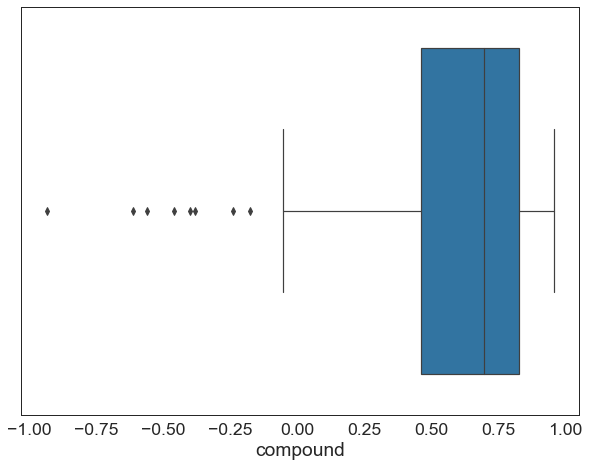

In [1007]:
plt.figure(figsize=(10, 7.5))
ax = sns.boxplot(df.compound)

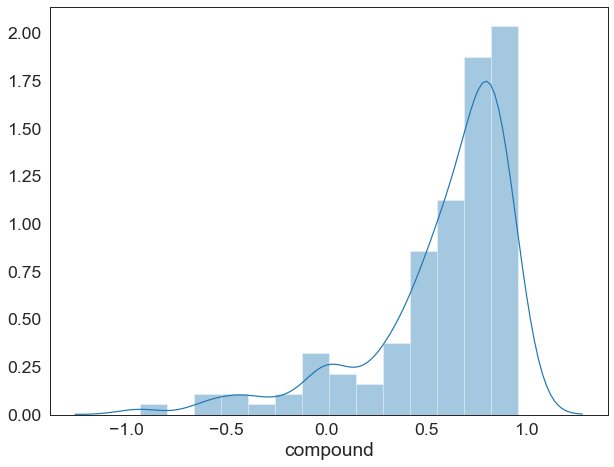

In [1008]:
plt.figure(figsize=(10, 7.5))
ax = sns.distplot(df.compound)

In [1009]:
# Check out the most negative tweets
pd.set_option('display.max_colwidth', -1)
df.sort_values('compound')[0:50]

/Users/rachelmartonik/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


index            county_name    neg    neu    pos  compound  \
80   29911  harrisonburg city      0.289  0.711  0.000 -0.9355     
88   30536  lynchburg city         0.179  0.749  0.072 -0.6124     
104  32935  alexandria city        0.271  0.492  0.237 -0.5627     
62   27278  fairfax county         0.149  0.745  0.106 -0.4588     
27   18668  arlington county       0.110  0.835  0.055 -0.4019     
94   31623  alexandria city        0.185  0.703  0.112 -0.3818     
15   15963  alexandria city        0.085  0.915  0.000 -0.2411     
9    14768  arlington county       0.104  0.809  0.086 -0.1779     
78   29678  richmond city          0.081  0.844  0.075 -0.0516     
112  33822  fairfax county         0.100  0.808  0.092 -0.0516     
137  41623  richmond city          0.000  1.000  0.000  0.0000     
22   17178  charlottesville city   0.065  0.846  0.090 -0.0000     
136  41619  richmond city          0.000  1.000  0.000  0.0000     
135  41615  richmond city          0.000  1.000  0.000  0.0000     
108  33386  arlington county       0.107  0.782  0.111  0.0258     
132  35715  arlington county       0.050  0.894  0.055  0.0516     
120  34410  prince william county  0.088  0.796  0.116  0.0772     
29   18900  alexandria city        0.105  0.766  0.129  0.1298     
101  32855  richmond city          0.000  0.833  0.167  0.2023     
102  32875  arlington county       0.072  0.831  0.097  0.2244     
87   30199  arlington county       0.121  0.728  0.151  0.2732     
1    12652  alexandria city        0.000  0.944  0.056  0.2924     
129  35125  fairfax county         0.000  0.944  0.056  0.2960     
45   24083  arlington county       0.069  0.791  0.139  0.2975     
73   29449  fairfax county         0.000  0.874  0.126  0.3182     
119  34275  tazewell county        0.000  0.943  0.057  0.3400     
76   29602  alexandria city        0.000  0.909  0.091  0.3595     
28   18899  alexandria city        0.000  0.856  0.144  0.4019     
35   20040  fairfax county         0.000  0.915  0.085  0.4199     
69   28649  arlington county       0.149  0.649  0.202  0.4201     
16   15964  alexandria city        0.000  0.899  0.101  0.4215     
3    14089  alexandria city        0.078  0.804  0.117  0.4228     
75   29590  richmond city          0.000  0.830  0.170  0.4404     
105  33128  arlington county       0.000  0.912  0.088  0.4404     
10   15182  arlington county       0.123  0.613  0.264  0.4588     
20   16805  arlington county       0.096  0.747  0.157  0.4767     
5    14403  fredericksburg city    0.053  0.832  0.116  0.4767     
18   16497  fairfax county         0.000  0.880  0.120  0.5080     
85   30036  richmond city          0.000  0.935  0.065  0.5093     
106  33129  arlington county       0.000  0.870  0.130  0.5106     
64   27604  charlottesville city   0.000  0.805  0.195  0.5255     
127  34965  alexandria city        0.167  0.608  0.225  0.5344     
109  33485  arlington county       0.123  0.670  0.207  0.5423     
86   30037  richmond city          0.047  0.815  0.138  0.5423     
11   15194  alexandria city        0.046  0.803  0.151  0.5574     
12   15211  staunton city          0.046  0.803  0.151  0.5574     
97   32604  roanoke city           0.000  0.812  0.188  0.5719     
96   31875  fairfax county         0.102  0.697  0.201  0.5848     
98   32608  richmond city          0.091  0.709  0.200  0.5893     
131  35656  richmond city          0.055  0.786  0.159  0.5994     

                                                                                                                                                                                                                                                                                                                                 text  
80   For each of us, the COVID-19 pandemic has forced a change in our personal and professional routines. And for some, the impact has been even more severe: job loss, reduced income, illness or worse have st

In [1010]:
# Check out the most positive tweets
pd.set_option('display.max_colwidth', -1)
df.sort_values('compound', ascending = False)[0:50]

/Users/rachelmartonik/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


index            county_name    neg    neu    pos  compound  \
66   27994  richmond city          0.000  0.620  0.380  0.9595     
95   31845  arlington county       0.000  0.691  0.309  0.9572     
111  33728  winchester city        0.000  0.676  0.324  0.9459     
79   29754  richmond city          0.000  0.753  0.247  0.9298     
30   19661  virginia beach city    0.049  0.607  0.344  0.9265     
63   27279  fairfax county         0.000  0.706  0.294  0.9244     
71   29035  alexandria city        0.000  0.706  0.294  0.9186     
58   25615  norfolk city           0.000  0.662  0.338  0.9149     
4    14354  roanoke city           0.054  0.634  0.312  0.9086     
25   17689  alexandria city        0.061  0.663  0.276  0.9000     
70   28976  arlington county       0.000  0.658  0.342  0.8993     
103  32911  falls church city      0.066  0.563  0.371  0.8979     
113  33922  harrisonburg city      0.049  0.679  0.272  0.8957     
83   30003  alexandria city        0.000  0.746  0.254  0.8908     
81   29942  arlington county       0.084  0.640  0.276  0.8860     
126  34783  fairfax county         0.000  0.775  0.225  0.8842     
130  35393  prince william county  0.000  0.716  0.284  0.8834     
39   21269  arlington county       0.000  0.774  0.226  0.8779     
26   17738  fairfax county         0.050  0.662  0.288  0.8773     
48   24220  richmond city          0.000  0.764  0.236  0.8689     
17   16113  fairfax county         0.000  0.768  0.232  0.8625     
33   19692  martinsville city      0.000  0.798  0.202  0.8622     
42   22027  richmond city          0.000  0.766  0.234  0.8555     
65   27771  bedford county         0.000  0.778  0.222  0.8555     
54   24924  loudoun county         0.047  0.673  0.279  0.8516     
118  34237  fairfax county         0.000  0.788  0.212  0.8481     
134  40627  manassas city          0.000  0.733  0.267  0.8478     
84   30004  alexandria city        0.048  0.693  0.259  0.8442     
44   23140  alexandria city        0.085  0.617  0.298  0.8428     
50   24439  alexandria city        0.000  0.744  0.256  0.8402     
8    14763  alexandria city        0.000  0.804  0.196  0.8398     
117  34194  fairfax county         0.036  0.769  0.195  0.8360     
82   29961  falls church city      0.055  0.706  0.239  0.8349     
90   31035  alexandria city        0.132  0.579  0.289  0.8316     
21   16868  roanoke city           0.065  0.650  0.285  0.8313     
7    14613  petersburg city        0.000  0.781  0.219  0.8271     
61   27153  prince william county  0.043  0.678  0.279  0.8268     
32   19663  virginia beach city    0.063  0.627  0.310  0.8264     
89   30753  chesterfield county    0.082  0.686  0.231  0.8221     
49   24236  harrisonburg city      0.000  0.800  0.200  0.8176     
31   19662  virginia beach city    0.000  0.740  0.260  0.8176     
99   32640  roanoke city           0.000  0.771  0.229  0.8172     
92   31248  alexandria city        0.000  0.774  0.226  0.8162     
57   25614  norfolk city           0.000  0.543  0.457  0.8126     
34   19693  martinsville city      0.000  0.801  0.199  0.8016     
36   20882  washington county      0.000  0.840  0.160  0.8011     
40   21503  fairfax county         0.060  0.693  0.247  0.7959     
52   24746  lexington city         0.033  0.772  0.195  0.7906     
74   29586  hanover county         0.000  0.802  0.198  0.7845     
77   29670  richmond city          0.041  0.773  0.187  0.7783     

                                                                                                                                                                                                                                                                                                                     text  
66   Art has the power to connect, inspire, and console us. On this #GivingTuesdayNow, please consider supporting the #VMFA COVID-19 Relief Fund. Your gift will help us return to our full commitment of serving all Virgin

In [1011]:
a = pd.DataFrame(data_0505_clean['hashtags'].value_counts(dropna=True))
a.sort_values('hashtags', ascending=False).head(100)

hashtags
GivingTuesdayNow                                                                                                                       70      
COVID19                                                                                                                                31      
coronavirus                                                                                                                            20      
Coronavirus                                                                                                                            9       
COVID                                                                                                                                  8       
COVIDー19                                                                                                                               7       
SmartNews                                                                                                                              6       
ThankAThon                                                                                                                             6       
PTAdvocacy                                                                                                                             6       
itpsap                                                                                                                                 5       
FoxNews                                                                                                                                5       
coronavirus COVID19                                                                                                                    4       
ThisIsICF                                                                                                                              4       
covid19                                                                                                                                4       
Nurses NationalNursesDay                                                                                                               4       
covid                                                                                                                                  4       
GivingTuesday                                                                                                                          3       
CincoDeMayo                                                                                                                            3       
COVID19 coronavirus                                                                                                                    3       
GiveChoose2020                                                                                                                         3       
givingtuesdaynow                                                                                                                       3       
Covid19                                                                                                                                3       
covid19 coronavirus                                                                                                                    3       
Covid_19                                                                                                                               3       
2020Census                                                                                                                             2       
GivingTuesdayNow GivingTuesday                                                                                                         2       
disabilityinthenews                                                                                                                    2       
CoronaVirus                                                                                            

In [1012]:
70/len(data_0505_clean) # 2.5% of Tweets on Tuesday had the hashtag #GivingTuesdayNow

# givingtuesdaynow
# GivingTuesday

# it is also teacher appreciation week - see if week sentiment is up

0.02619760479041916

In [1013]:
# Pull out Tweets with #GivingTuesdayNow to see if that is what is causing sentiment to spike
data_0505_clean['GIVING'] = data_0505_clean['hashtags'].str.contains('givingtuesday', case=False).astype(str)
data_0505_clean_GIVING = data_0505_clean[data_0505_clean["GIVING"]=='True']
data_0505_clean_NOGIVING = data_0505_clean[data_0505_clean["GIVING"]!='True']
data_0505_clean_GIVING.hashtags.value_counts()

print(len(data_0505_clean_GIVING))
print(len(data_0505_clean_NOGIVING))
print(len(data_0505_clean))

/Users/rachelmartonik/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


138
2534
2672


## Sentiment spiked on May 5th. Why?

5% of Tweets had #GivingTuesdayNow or #GivingTuesday hashtags (138/2722)

Sentiment Scores:
5/5 data overall = 0.113169  
5/5 data with #GivingTuesdayNow = 0.579151
5/5 data w/o #GivingTuesdayNow = 0.088283  

The average weekday sentiment is 0.081125, so I'm fairly confident the bump is from Giving Tuesday

## Additional Meta data variables are needed

Add day of week, type of day, day and week of data collection

In [975]:
num_days = len(daily_sentiment_VA)
num_days

38

In [ ]:
7

In [976]:
daily_sentiment_VA['dow'] = ['Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 
                             'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 
                             'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 
                             'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 
                             'Mon','Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun',
                            'Mon','Tues', 'Wed', 'Thurs',]

daily_sentiment_VA['week'] = [1, 1, 1, 1, 1, 1, 
                              2, 2, 2, 2, 2, 2, 2, 
                              3, 3, 3, 3, 3, 3, 3, 
                              4, 4, 4, 4, 4, 4, 4,
                              5, 5, 5, 5, 5, 5, 5,
                             6, 6, 6, 6]

daily_sentiment_VA['day_type'] = ['Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekend', 'Weekend', 
                                  'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekend', 'Weekend', 
                                  'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekend', 'Weekend', 
                                  'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekend', 'Weekend', 
                                  'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekend', 'Weekend',
                                 'Weekday', 'Weekday', 'Weekday', 'Weekday']

daily_sentiment_VA.insert(0, 'Day_of_Collection', range(1, 1 + len(daily_sentiment_VA)))

In [977]:
# Append Tweet Frequency
daily_sentiment_VA =pd.concat([date_freq_df, daily_sentiment_VA], axis=1)
daily_sentiment_VA.drop(columns='date', inplace=True)
daily_sentiment_VA

frequency  Day_of_Collection  Date  Sentiment_Score    dow  week day_type
0   49194      1                  4/7   0.082424         Tues   1     Weekday
1   47847      2                  4/8   0.075140         Wed    1     Weekday
2   45651      3                  4/9   0.091941         Thurs  1     Weekday
3   41537      4                  4/10  0.095350         Fri    1     Weekday
4   29042      5                  4/11  0.027798         Sat    1     Weekend
5   24927      6                  4/12  0.042261         Sun    1     Weekend
6   39581      7                  4/13  0.078074         Mon    2     Weekday
7   42231      8                  4/14  0.088770         Tues   2     Weekday
8   42962      9                  4/15  0.072015         Wed    2     Weekday
9   42669      10                 4/16  0.078480         Thurs  2     Weekday
10  41275      11                 4/17  0.091954         Fri    2     Weekday
11  28116      12                 4/18  0.033639         Sat    2     Weekend
12  25605      13                 4/19  0.001627         Sun    2     Weekend
13  36791      14                 4/20  0.063136         Mon    3     Weekday
14  39757      15                 4/21  0.068330         Tues   3     Weekday
15  39729      16                 4/22  0.074628         Wed    3     Weekday
16  40021      17                 4/23  0.082073         Thurs  3     Weekday
17  40748      18                 4/24  0.085503         Fri    3     Weekday
18  24309      19                 4/25  0.032611         Sat    3     Weekend
19  21595      20                 4/26  0.054240         Sun    3     Weekend
20  33294      21                 4/27  0.084908         Mon    4     Weekday
21  36471      22                 4/28  0.078671         Tues   4     Weekday
22  36587      23                 4/29  0.083838         Wed    4     Weekday
23  33881      24                 4/30  0.086531         Thurs  4     Weekday
24  32373      25                 5/1   0.075300         Fri    4     Weekday
25  21167      26                 5/2   0.071988         Sat    4     Weekend
26  19881      27                 5/3   0.031294         Sun    4     Weekend
27  30628      28                 5/4   0.071889         Mon    5     Weekday
28  32616      29                 5/5   0.113539         Tues   5     Weekday
29  31959      30                 5/6   0.083190         Wed    5     Weekday
30  30995      31                 5/7   0.085915         Thurs  5     Weekday
31  28065      32                 5/8   0.082397         Fri    5     Weekday
32  19382      33                 5/9   0.026695         Sat    5     Weekend
33  16915      34                 5/10  0.020364         Sun    5     Weekend
34  27842      35                 5/11  0.082835         Mon    6     Weekday
35  30581      36                 5/12  0.073006         Tues   6     Weekday
36  29496      37                 5/13  0.082358         Wed    6     Weekday
37  29910      38                 5/14  0.077227         Thurs  6     Weekday

In [978]:
# Save daily_sentiment_VA to folder
daily_sentiment_VA.to_csv("/Users/rachelmartonik/MSDS_498_Capstone/data/daily_sentiment_VA.csv")

# Tweet Frequency and Sentiment Scores
Sentiment scores and Tweet frequency drop dramatically on the weekends.

Tweet frequency and sentiment score are postivly correlated. What does this mean? 

 - Is negativity up on the weekend? 
 - Or do only the more negative people tweet on the weekend? 
 - Or does this remove all those that tweet for work?
 
 To do:
  - Re-run sentiment score with only user names that tweet on the weekends
  - Compare those who tweet on Weekends and Weekdays - are they same people?

In [1032]:
Weekends = daily_sentiment_VA[daily_sentiment_VA["day_type"]=="Weekend"]
Weekdays = daily_sentiment_VA[daily_sentiment_VA["day_type"]=="Weekday"]

corr, _ = pearsonr(Weekends['Day_of_Collection'], Weekends['Sentiment_Score'])
print('Correlation of week of data collection and Sentiment Score - WEEKENDS: %.3f' % corr)

corr, _ = pearsonr(Weekdays['Day_of_Collection'], Weekdays['Sentiment_Score'])
print('Correlation of week of data collection and Sentiment Score - WEEKDAYS: %.3f' % corr)

corr, _ = pearsonr(daily_sentiment_VA['Day_of_Collection'], daily_sentiment_VA['Sentiment_Score'])
print('Correlation of week of data collection and Sentiment Score - OVERALL: %.3f' % corr)

corr, _ = pearsonr(daily_sentiment_VA['week'], daily_sentiment_VA['Sentiment_Score'])
print('Pearsons correlation of week of data collection and Sentiment Score: %.3f' % corr)


Correlation of week of data collection and Sentiment Score - WEEKENDS: 0.074
Correlation of week of data collection and Sentiment Score - WEEKDAYS: -0.001
Correlation of week of data collection and Sentiment Score - OVERALL: 0.013
Pearsons correlation of week of data collection and Sentiment Score: 0.124


TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [982]:
Weekdays.Sentiment_Score.describe()

count    28.000000
mean     0.081765 
std      0.009644 
min      0.063136 
25%      0.075260 
50%      0.082378 
75%      0.085606 
max      0.113539 
Name: Sentiment_Score, dtype: float64

In [983]:
Weekends.Sentiment_Score.describe()

count    10.000000
mean     0.034252 
std      0.019019 
min      0.001627 
25%      0.026971 
50%      0.031953 
75%      0.040105 
max      0.071988 
Name: Sentiment_Score, dtype: float64

 Overall sentiment of weekday tweets seems to be getting worse, while weekend sentiment is improving.

In [984]:
# Correlations
corr, _ = pearsonr(daily_sentiment_VA['frequency'], daily_sentiment_VA['Sentiment_Score'])
print('Pearsons correlation of Tweet frequency and Sentiment Score: %.3f' % corr)


Pearsons correlation of Tweet frequency and Sentiment Score: 0.630


Tweet frequency seems to be positivly correlated with sentiment score.

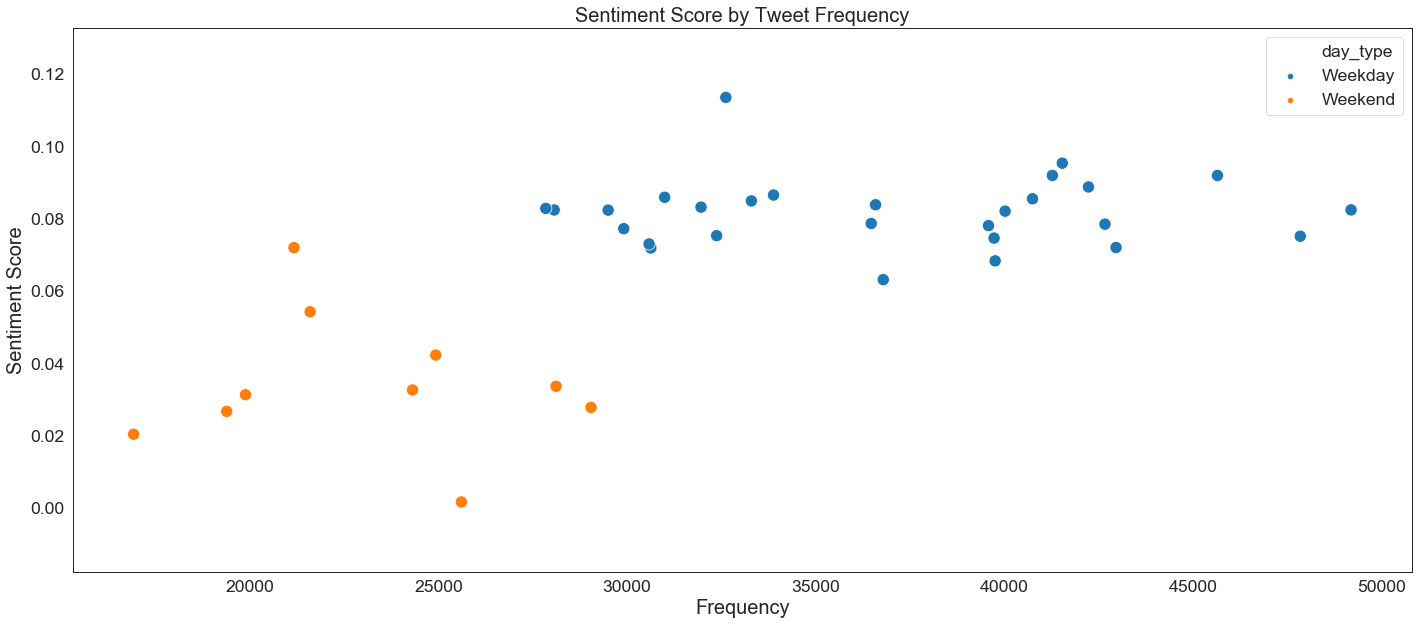

In [987]:
# Scatter plot of sentiment score by Tweet Frequency
ax = sns.scatterplot(x="frequency", y="Sentiment_Score", hue="day_type",
                     data=daily_sentiment_VA, s=150 ).set_title("Sentiment Score by Tweet Frequency",fontsize=20)
plt.xlabel("Frequency", fontsize=20)
plt.ylabel("Sentiment Score", fontsize=20)
plt.savefig("DSS-Overall by Tweet Frequency", tight_layout=False)
plt.show()

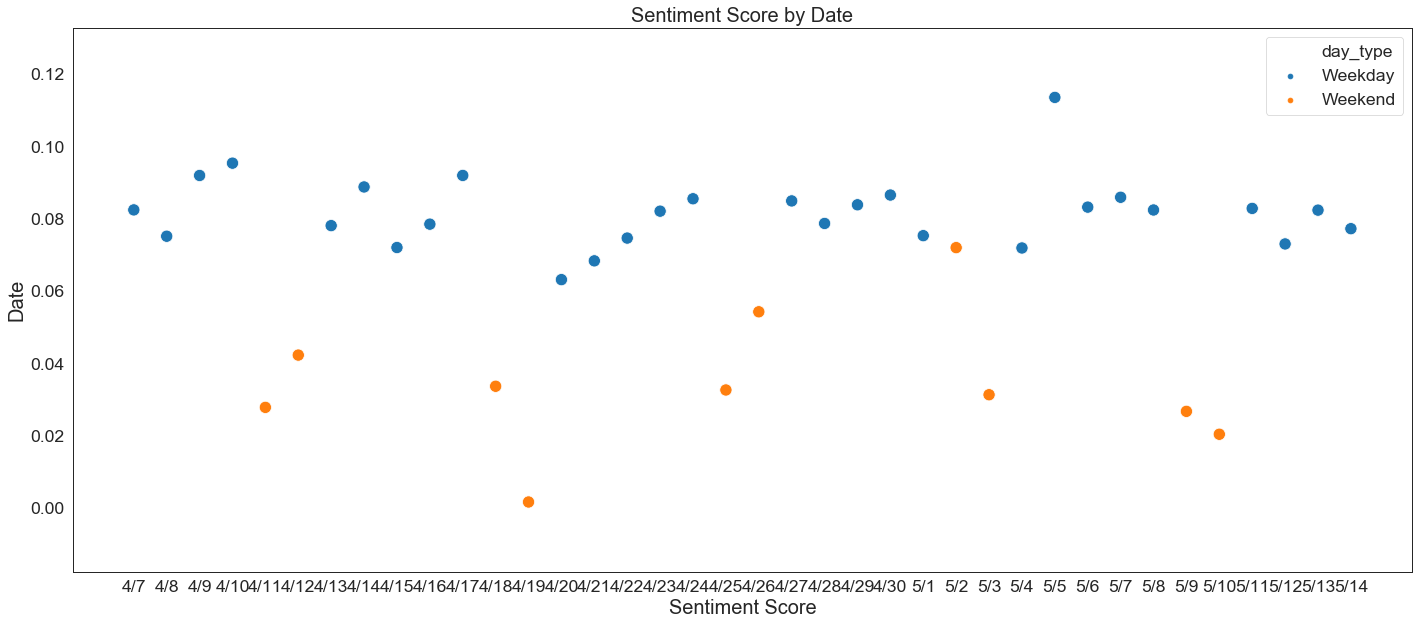

In [989]:
# Daily Sentiment Score by Date - Colored by day type
ax = sns.scatterplot(x="Date", y="Sentiment_Score", hue="day_type",
                     data=daily_sentiment_VA, s=150 ).set_title("Sentiment Score by Date",fontsize=20)
plt.xlabel("Sentiment Score", fontsize=20)
plt.ylabel("Date", fontsize=20)
plt.show()

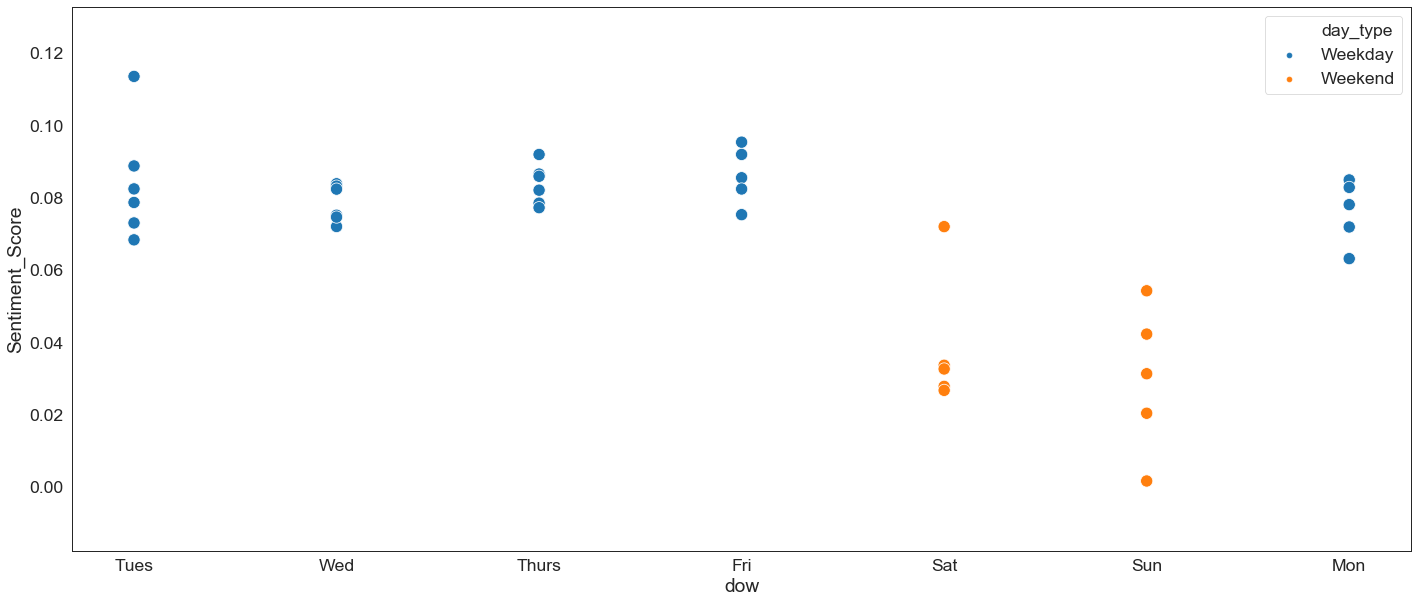

In [1025]:
ax = sns.scatterplot(x="dow", y="Sentiment_Score", hue="day_type",
                     data=daily_sentiment_VA, s=150 )

In [1026]:
# Split data by weeks for analysis
Week1= daily_sentiment_VA[daily_sentiment_VA['week']==1]
Week2= daily_sentiment_VA[daily_sentiment_VA['week']==2]
Week3= daily_sentiment_VA[daily_sentiment_VA['week']==3]
Week4= daily_sentiment_VA[daily_sentiment_VA['week']==4]

# Weekly mean sentiment score
daily_sentiment_VA.groupby('week')['Sentiment_Score'].mean()

week
1    0.069152
2    0.063508
3    0.065789
4    0.073219
5    0.069141
6    0.078856
Name: Sentiment_Score, dtype: float64

In [1027]:
# import matplotlib.pyplot as plt

# w1 = Week1['Sentiment_Score'].tolist()
# w2 = Week2['Sentiment_Score'].tolist()
# w3 = Week3['Sentiment_Score'].tolist()
# w4 = Week4['Sentiment_Score'].tolist()

# day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# # "bo" is for "blue dot"
# #plt.plot(day_of_week, w1, 'b', label='Week 1')
# plt.plot(day_of_week, w2, 'g', label='Week 1')
# plt.plot(day_of_week, w3, 'm', label='Week 1')
# plt.plot(day_of_week, w4, 'r', label='Week 1')
# # plt.plot('dow', 'Sentiment_Score', 'r', label='Week 2', data=Week2)
# # plt.plot('dow', 'Sentiment_Score', 'g', label='Week 3', data=Week3)
# # plt.plot('dow', 'Sentiment_Score', 'm', label='Week 4', data=Week4)

# plt.title('Sentiment Scores by week', size=20)
# plt.xlabel('Date', size = 20)
# plt.ylabel('Score', size = 20)
# plt.legend()

# plt.show()

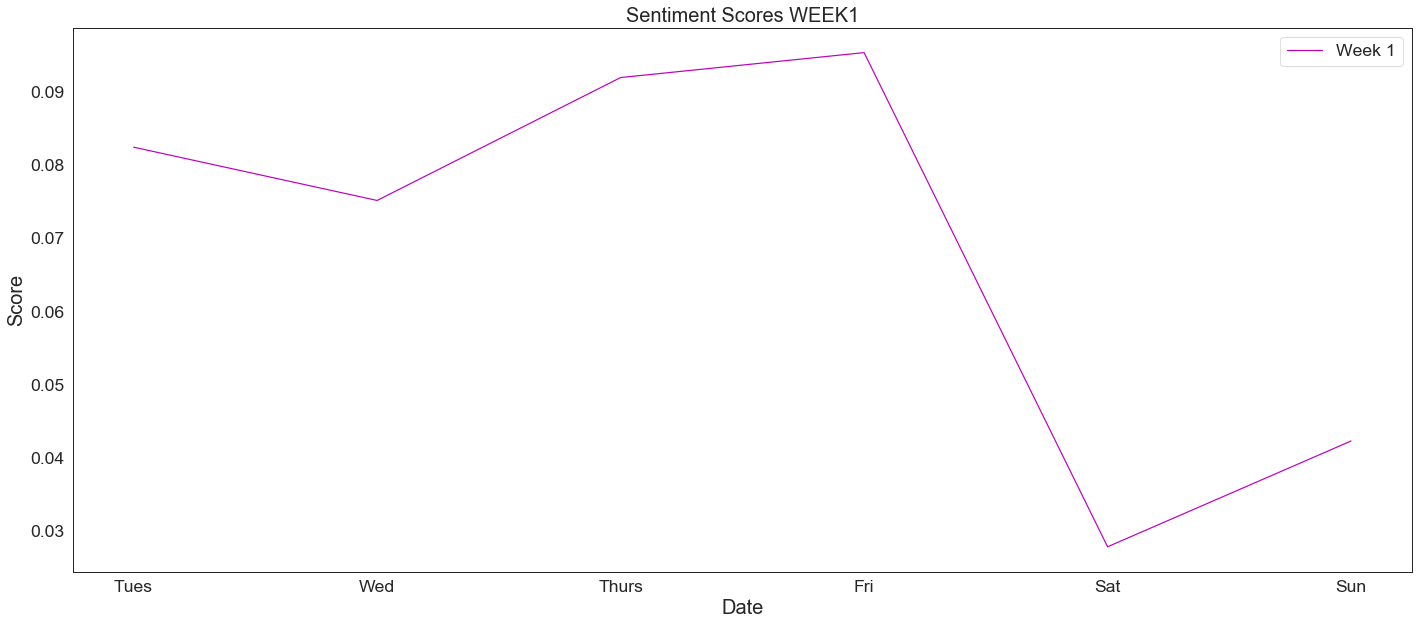

In [1028]:
plt.plot('dow', 'Sentiment_Score', 'm', label='Week 1', data=Week1)
plt.title('Sentiment Scores WEEK1', size=20)
plt.xlabel('Date', size = 20)
plt.ylabel('Score', size = 20)
plt.legend()
plt.show()

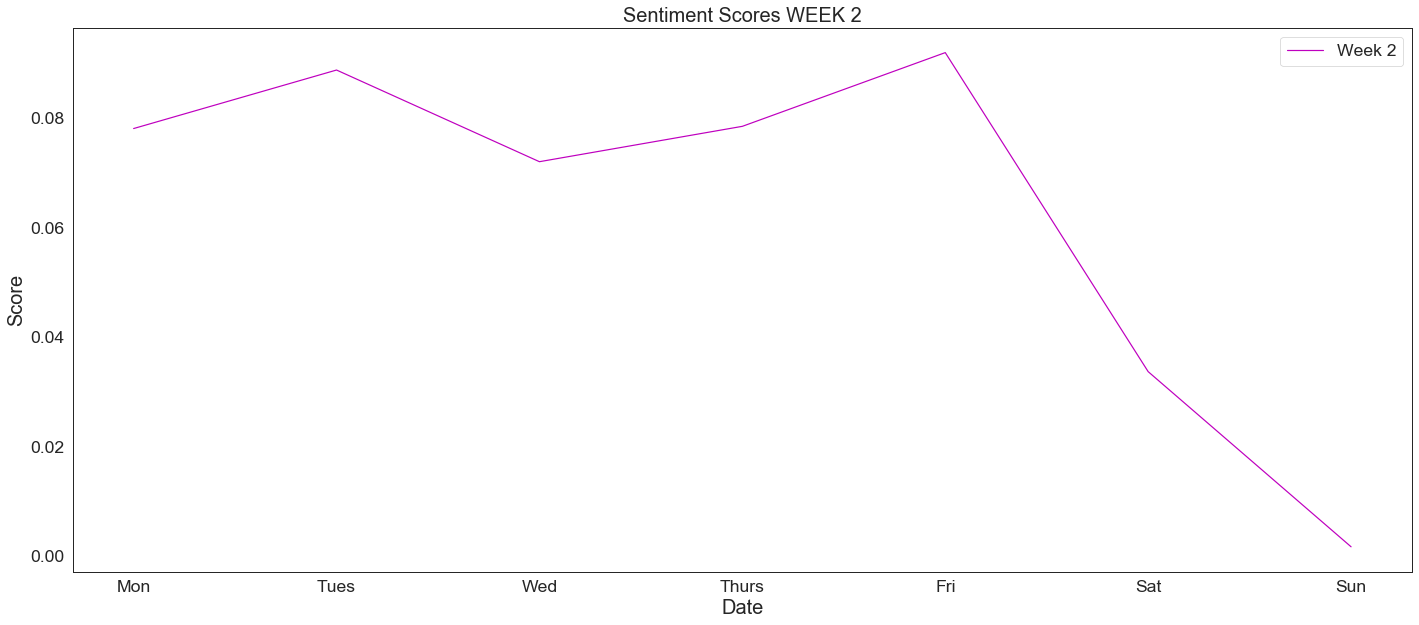

In [1029]:
plt.plot('dow', 'Sentiment_Score', 'm', label='Week 2', data=Week2)
plt.title('Sentiment Scores WEEK 2', size=20)
plt.xlabel('Date', size = 20)
plt.ylabel('Score', size = 20)
plt.legend()
plt.show()

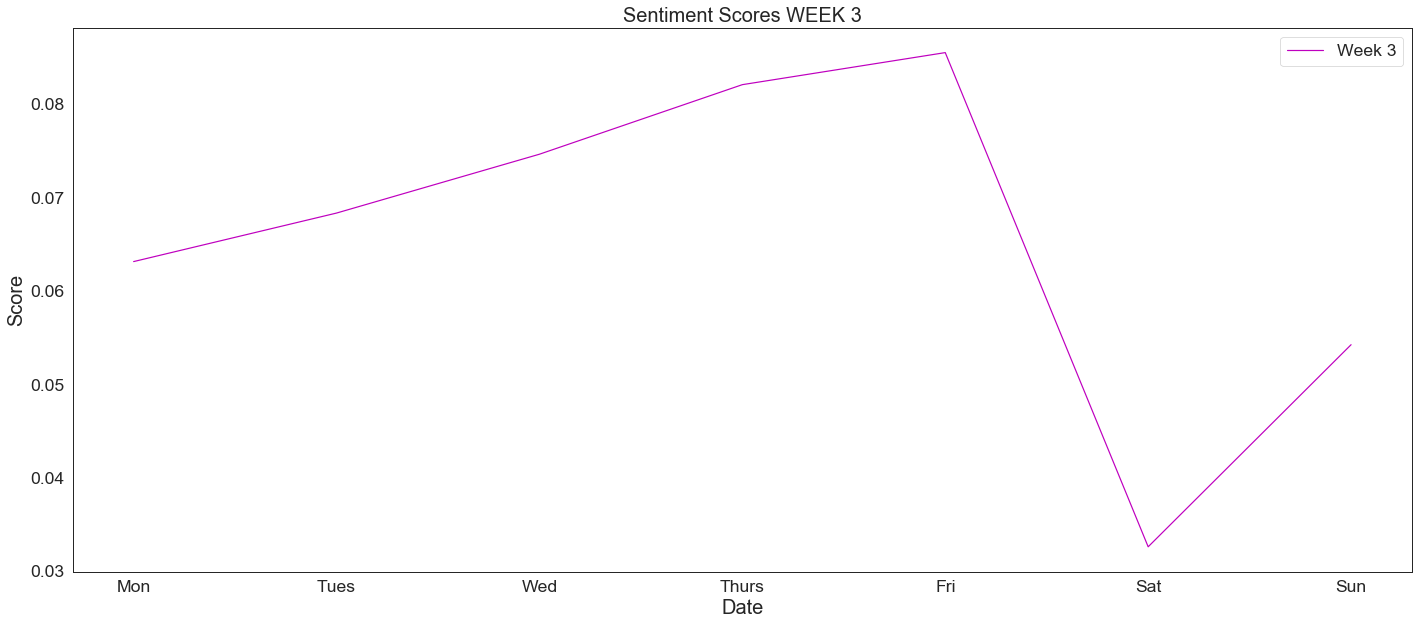

In [1030]:
plt.plot('dow', 'Sentiment_Score', 'm', label='Week 3', data=Week3)
plt.title('Sentiment Scores WEEK 3', size=20)
plt.xlabel('Date', size = 20)
plt.ylabel('Score', size = 20)
plt.legend()
plt.show()

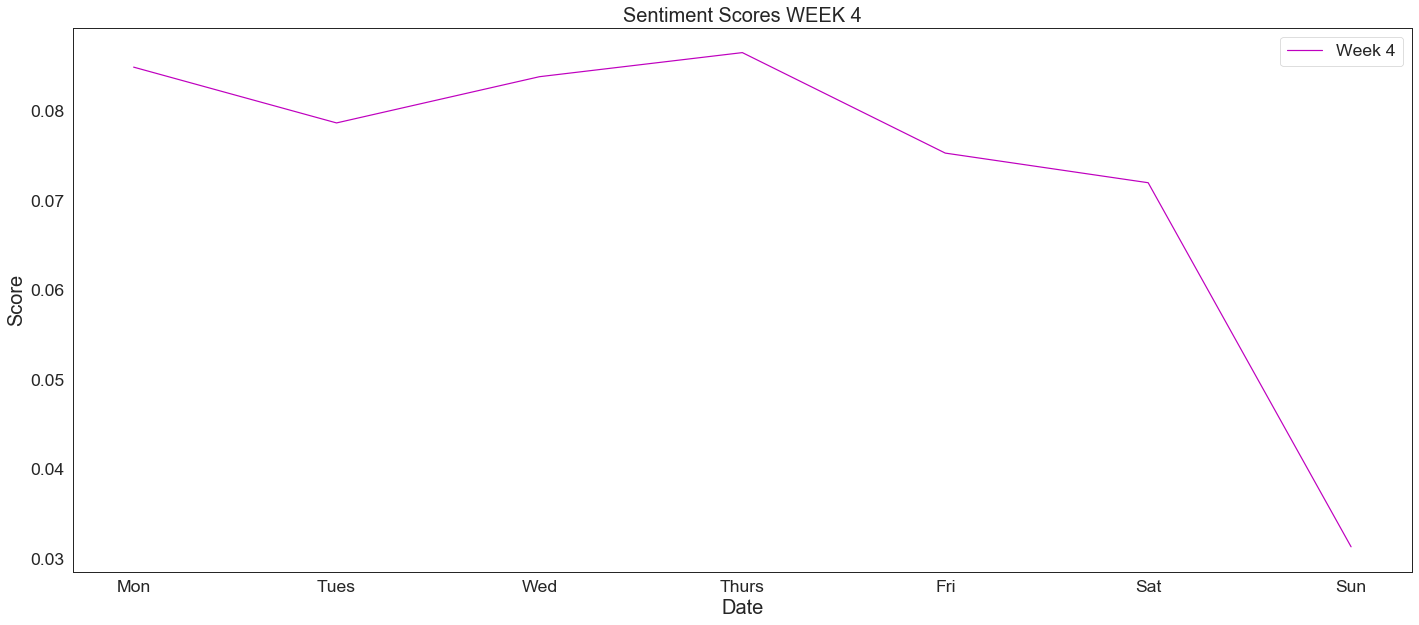

In [1031]:
plt.plot('dow', 'Sentiment_Score', 'm', label='Week 4', data=Week4)
plt.title('Sentiment Scores WEEK 4', size=20)
plt.xlabel('Date', size = 20)
plt.ylabel('Score', size = 20)
plt.legend()
plt.show()

# Daily Sentiment Score By County

Use the code below to run through each cleaned daily data set (i.e data_0407_clean). The code takes the Tweet and provides a sentiment score. Then I appened county to each data set (not all counties have Tweets each day), and ran the mean sentiment score for that day by county. At the end, I compiled the daily scores into a data frame with all counties.

Code has been commented out because it only needs to be run once for each day of data.

In [1073]:
# # Run through each data set separetly to get county level sentiment score
# data = data_0514_clean
# day = '05-14'

# text_body=[] #Loop through tweet to prepare for sentiment analysis
# sentiment_score = [] # Append sentiment analysis results to a list
# for i in range(0,len(data)):
#     temp_text=data['text'].iloc[i]
#     text_body.append(temp_text)
    
# sentences = text_body # Sentiment analysis
   
# for sentence in sentences:
#     vs = analyzer.polarity_scores(sentence)
#     sentiment_score.append(vs)

# # Create data frame of county names
# locations = pd.DataFrame(data['county_name'])
# locations.reset_index(inplace=True)
# #locations

In [1074]:
# a = pd.DataFrame(sentiment_score)
# b = pd.concat([a, locations], axis=1)
# print (len(a))
# print (len(b))
# print (len(data))

2637
2637
2637


In [1075]:
# len(b.county_name.value_counts())

92

In [1076]:
# c = pd.DataFrame(b.groupby('county_name')['compound'].mean())
# c.reset_index(inplace=True)
# c.columns=['county_name', day]
# sent_0514 = c
# sent_0514.to_pickle("sent_0514.pkl") # save the DataFrame to use in Part 2


# COVID Tracking Data

In a separate notebook, I pull daily Covid data for confirmed number of cases and deaths for Virginia. I added population data from ACS, normalizing the number of cases and deaths by every 1000 county/city resident.

In [1091]:
cases = pd.read_csv("cases_per_1000.csv") 
cases.drop(columns=['Unnamed: 0'], inplace=True)
deaths = pd.read_csv("deaths_per_1000.csv") 
deaths.drop(columns=['Unnamed: 0'], inplace=True)
#cases.rename(columns={'county_lower':'county_name'}, inplace=True)
#deaths.rename(columns={'county_lower':'county_name'}, inplace=True)

In [1092]:
name_change_dict = {"county_lower": "county_name",
                    "2020-04-07_per": "04-07",
                    "2020-04-08_per": "04-08",
                    "2020-04-09_per": "04-09",
                    "2020-04-10_per": "04-10",
                    "2020-04-11_per": "04-11",
                    "2020-04-12_per": "04-12",
                    "2020-04-13_per": "04-13",
                    "2020-04-14_per": "04-14",
                    "2020-04-15_per": "04-15",
                    "2020-04-16_per": "04-16",
                    "2020-04-17_per": "04-17",
                    "2020-04-18_per": "04-18",
                    "2020-04-19_per": "04-19",
                    "2020-04-20_per": "04-20",
                    "2020-04-21_per": "04-21",
                    "2020-04-22_per": "04-22",
                    "2020-04-23_per": "04-23",
                    "2020-04-24_per": "04-24",
                    "2020-04-25_per": "04-25",
                    "2020-04-26_per": "04-26",
                    "2020-04-27_per": "04-27",
                    "2020-04-28_per": "04-28",
                    "2020-04-29_per": "04-29",
                    "2020-04-30_per": "04-30",
                    "2020-05-01_per": "05-01",
                    "2020-05-02_per": "05-02",
                    "2020-05-03_per": "05-03",
                    "2020-05-04_per": "05-04",
                    "2020-05-05_per": "05-05",
                    "2020-05-06_per": "05-06",
                    "2020-05-07_per": "05-07",
                    "2020-05-08_per": "05-08", 
                    "2020-05-09_per": "05-09", 
                    "2020-05-10_per": "05-10", 
                    "2020-05-11_per": "05-11", 
                    "2020-05-12_per": "05-12", 
                    "2020-05-13_per": "05-13", 
                    "2020-05-14_per": "05-14", 
                   }

cases.rename(columns=name_change_dict, inplace=True)
deaths.rename(columns=name_change_dict, inplace=True)

In [1102]:
deaths.head()

county_name  percent_VA_pop    04-07    04-08    04-09    04-10  \
0  accomack county   0.003891        0.00000  0.00000  0.00000  0.00000   
1  albemarle county  0.012641        0.00000  0.00000  0.00000  0.00000   
2  alexandria city   0.018601        0.00639  0.00639  0.00639  0.00639   
3  alleghany county  0.001817        0.00000  0.00000  0.00000  0.00000   
4  amelia county     0.001528        0.00000  0.00000  0.00000  0.00000   

     04-11    04-12    04-13    04-14  ...     05-05     05-06     05-07  \
0  0.00000  0.00000  0.00000  0.00000  ...  0.213793  0.213793  0.213793   
1  0.00000  0.00000  0.00000  0.00000  ...  0.037610  0.037610  0.037610   
2  0.00639  0.00639  0.00639  0.00639  ...  0.166129  0.166129  0.185298   
3  0.00000  0.00000  0.00000  0.00000  ...  0.000000  0.000000  0.000000   
4  0.00000  0.00000  0.00000  0.00000  ...  0.077797  0.077797  0.077797   

      05-08     05-09     05-10     05-11     05-12     05-13     05-14  
0  0.213793  0.213793  0.213793  0.213793  0.213793  0.213793  0.244334  
1  0.037610  0.037610  0.037610  0.037610  0.037610  0.037610  0.037610  
2  0.185298  0.191687  0.191687  0.191687  0.191687  0.198077  0.204466  
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4  0.077797  0.077797  0.077797  0.077797  0.077797  0.077797  0.077797  

[5 rows x 40 columns]

In [1103]:
# Create separate dataframe of percent of US VA population
percent_VA_population = cases[['county_name', 'percent_VA_pop']]
percent_VA_population.head()
len(percent_VA_population)

133

In [1105]:
# Drop percent of population from cases and deaths
cases = cases.drop(columns='percent_VA_pop')
deaths = deaths.drop(columns='percent_VA_pop')

In [1106]:
# Create wide COVID cases and deaths data

cases_wide = pd.melt(cases, id_vars=['county_name'])
deaths_wide = pd.melt(deaths, id_vars=['county_name'])
cases_wide.columns=['county_name', 'date', 'cases_per_1000']
deaths_wide.columns=['county_name', 'date', 'deahts_per_1000']

In [1107]:
# Save wide COVID case to file
cases_wide.to_csv("/Users/rachelmartonik/MSDS_498_Capstone/data/cases_wide.csv")
deaths_wide.to_csv("/Users/rachelmartonik/MSDS_498_Capstone/data/deaths_wide.csv")

In [1108]:
cases_wide.head()

county_name   date  cases_per_1000
0     accomack county    04-07  0.335960      
1     albemarle county   04-07  0.357294      
2     alexandria city    04-07  0.805086      
3     alleghany county   04-07  0.130839      
4     amelia county      04-07  0.544578      
...             ...        ...       ...      
5049  york county        05-14  0.902540      
5050  Martinsville city  05-14  0.000000      
5051  Dickenson          05-14  0.000000      
5052  Bland              05-14  0.000000      
5053  Bath               05-14  0.000000      

[5054 rows x 3 columns]

In [1109]:
cases_wide['cases_per_1000'].describe()

count    4930.000000
mean     1.291767   
std      2.129181   
min      0.000000   
25%      0.325786   
50%      0.649676   
75%      1.300873   
max      22.865510  
Name: cases_per_1000, dtype: float64

## County/City Checks

VA has 133 total counties/cities included in ACS data. As of 5/2 (Data as of 4/30), the following discrepancies exist:

Counties in Twitter data but not COVID data:
 - Martinsville city
 - Dickenson county
 - Bland county
 - Bath county

Counites in Covid data but not in Twitter data:
 - Buena Vista city
 - Chesapeake city
 - Covington city
 - Greensville county

In [1111]:
# How many unique county/cities do we have in entire merged data?
county_list = merged_cleaned_data['county_name'].value_counts()
Twitter_counties = pd.DataFrame(county_list)
Twitter_counties.reset_index(inplace=True)
Twitter_counties= Twitter_counties['index']
Twitter_counties = pd.DataFrame(Twitter_counties)
Twitter_counties.columns=['county_name']
Twitter_counties.to_csv("/Users/rachelmartonik/MSDS_498_Capstone/data/Twitter_counties.csv")

In [1112]:
Twitter_counties

county_name
0    fairfax county       
1    richmond city        
2    arlington county     
3    alexandria city      
4    charlottesville city 
5    virginia beach city  
6    essex county         
7    norfolk city         
8    loudoun county       
9    prince william county
10   culpeper county      
11   roanoke city         
12   suffolk city         
13   hampton city         
14   montgomery county    
15   falls church city    
16   harrisonburg city    
17   fredericksburg city  
18   newport news city    
19   williamsburg city    
20   isle of wight county 
21   henrico county       
22   chesterfield county  
23   lynchburg city       
24   charlotte county     
25   manassas city        
26   winchester city      
27   portsmouth city      
28   york county          
29   hanover county       
30   fauquier county      
31   rockingham county    
32   bristol city         
33   bedford county       
34   king george county   
35   stafford county      
36   staunton city        
37   washington county    
38   danville city        
39   salem city           
40   petersburg city      
41   augusta county       
42   wise county          
43   spotsylvania county  
44   prince george county 
45   lexington city       
46   rappahannock county  
47   prince edward county 
48   louisa county        
49   roanoke county       
50   nelson county        
51   albemarle county     
52   halifax county       
53   warren county        
54   fluvanna county      
55   amherst county       
56   waynesboro city      
57   page county          
58   westmoreland county  
59   franklin county      
60   colonial heights city
61   gloucester county    
62   orange county        
63   manassas park city   
64   martinsville city    
65   pittsylvania county  
66   northumberland county
67   shenandoah county    
68   buckingham county    
69   radford city         
70   mecklenburg county   
71   wythe county         
72   goochland county     
73   powhatan county      
74   cumberland county    
75   frederick county     
76   henry county         
77   appomattox county    
78   mathews county       
79   floyd county         
80   dinwiddie county     
81   pulaski county       
82   accomack county      
83   rockbridge county    
84   campbell county      
85   greene county        
86   poquoson city        
87   scott county         
88   hopewell city        
89   brunswick county     
90   grayson county       
91   richmond county      
92   highland county      
93   sussex county        
94   clarke county        
95   botetourt county     
96   tazewell county      
97   galax city           
98   caroline county      
99   smyth county         
100  franklin city        
101  russell county       
102  james city county    
103  carroll county       
104  new kent county      
105  madison county       
106  surry county         
107  middlesex county     
108  lee county           
109  lancaster county     
110  nottoway county      
111  fairfax city         
112  patrick county       
113  dickenson county     
114  northampton county   
115  buchanan county      
116  giles county         
117  king william county  
118  charles city county  
119  norton city          
120  chesapeake city      
121  southampton county   
122  alleghany county     
123  amelia county        
124  emporia city         
125  lunenburg county     
126  craig county         
127  charlottsville city  
128  wake county          
129  king and queen county
130  covington            
131  pitt county          
132  portsmouth           
133  bath county          
134  bland county         
135  henderson county

In [1113]:
covid_counties = pd.DataFrame(cases.county_name)
covid_counties.to_csv("/Users/rachelmartonik/MSDS_498_Capstone/data/covid_counties.csv")

In [1114]:
county_check = pd.merge(covid_counties, Twitter_counties, on='county_name')
county_check

county_name
0    accomack county      
1    albemarle county     
2    alexandria city      
3    alleghany county     
4    amelia county        
5    amherst county       
6    appomattox county    
7    arlington county     
8    augusta county       
9    bedford county       
10   botetourt county     
11   bristol city         
12   brunswick county     
13   buchanan county      
14   buckingham county    
15   campbell county      
16   caroline county      
17   carroll county       
18   charles city county  
19   charlotte county     
20   charlottesville city 
21   chesapeake city      
22   chesterfield county  
23   clarke county        
24   colonial heights city
25   craig county         
26   culpeper county      
27   cumberland county    
28   danville city        
29   dinwiddie county     
30   emporia city         
31   essex county         
32   fairfax county       
33   fairfax city         
34   falls church city    
35   fauquier county      
36   floyd county         
37   fluvanna county      
38   franklin county      
39   franklin city        
40   frederick county     
41   fredericksburg city  
42   galax city           
43   giles county         
44   gloucester county    
45   goochland county     
46   grayson county       
47   greene county        
48   halifax county       
49   hampton city         
50   hanover county       
51   harrisonburg city    
52   henrico county       
53   henry county         
54   highland county      
55   hopewell city        
56   isle of wight county 
57   james city county    
58   king george county   
59   king william county  
60   king and queen county
61   lancaster county     
62   lee county           
63   lexington city       
64   loudoun county       
65   louisa county        
66   lunenburg county     
67   lynchburg city       
68   madison county       
69   manassas park city   
70   manassas city        
71   mathews county       
72   mecklenburg county   
73   middlesex county     
74   montgomery county    
75   nelson county        
76   new kent county      
77   newport news city    
78   norfolk city         
79   northampton county   
80   northumberland county
81   norton city          
82   nottoway county      
83   orange county        
84   page county          
85   patrick county       
86   petersburg city      
87   pittsylvania county  
88   poquoson city        
89   portsmouth city      
90   powhatan county      
91   prince edward county 
92   prince george county 
93   prince william county
94   pulaski county       
95   radford city         
96   rappahannock county  
97   richmond county      
98   richmond city        
99   roanoke county       
100  roanoke city         
101  rockbridge county    
102  rockingham county    
103  russell county       
104  salem city           
105  scott county         
106  shenandoah county    
107  smyth county         
108  southampton county   
109  spotsylvania county  
110  stafford county      
111  staunton city        
112  suffolk city         
113  surry county         
114  sussex county        
115  tazewell county      
116  virginia beach city  
117  warren county        
118  washington county    
119  waynesboro city      
120  westmoreland county  
121  williamsburg city    
122  winchester city      
123  wise county          
124  wythe county         
125  york county

## Daily Sentiment Score Data Frame

For now, we will include counites/cities included in both the Twitter data and the COVID data as we are trying to compare the two. Will reassess later on in course.

In [1379]:
# Read in data
sent_0407 = pd.read_pickle('sent_0407.pkl')
sent_0408 = pd.read_pickle('sent_0408.pkl')
sent_0409 = pd.read_pickle('sent_0409.pkl')
sent_0410 = pd.read_pickle('sent_0410.pkl')
sent_0411 = pd.read_pickle('sent_0411.pkl')
sent_0412 = pd.read_pickle('sent_0412.pkl')
sent_0413 = pd.read_pickle('sent_0413.pkl')
sent_0414 = pd.read_pickle('sent_0414.pkl')
sent_0415 = pd.read_pickle('sent_0415.pkl')
sent_0416 = pd.read_pickle('sent_0416.pkl')
sent_0417 = pd.read_pickle('sent_0417.pkl')
sent_0418 = pd.read_pickle('sent_0418.pkl')
sent_0419 = pd.read_pickle('sent_0419.pkl')
sent_0420 = pd.read_pickle('sent_0420.pkl')
sent_0421 = pd.read_pickle('sent_0421.pkl')
sent_0422 = pd.read_pickle('sent_0422.pkl')
sent_0423 = pd.read_pickle('sent_0423.pkl')
sent_0424 = pd.read_pickle('sent_0424.pkl')
sent_0425 = pd.read_pickle('sent_0425.pkl')
sent_0426 = pd.read_pickle('sent_0426.pkl')
sent_0427 = pd.read_pickle('sent_0427.pkl')
sent_0428 = pd.read_pickle('sent_0428.pkl')
sent_0429 = pd.read_pickle('sent_0429.pkl')
sent_0430 = pd.read_pickle('sent_0430.pkl')
sent_0501 = pd.read_pickle('sent_0501.pkl')
sent_0502 = pd.read_pickle('sent_0502.pkl')
sent_0503 = pd.read_pickle('sent_0503.pkl')
sent_0504 = pd.read_pickle('sent_0504.pkl')
sent_0505 = pd.read_pickle('sent_0505.pkl')
sent_0506 = pd.read_pickle('sent_0506.pkl')
sent_0507 = pd.read_pickle('sent_0507.pkl')
sent_0508 = pd.read_pickle('sent_0508.pkl')
sent_0509 = pd.read_pickle('sent_0509.pkl')
sent_0510 = pd.read_pickle('sent_0510.pkl')
sent_0511 = pd.read_pickle('sent_0511.pkl')
sent_0512 = pd.read_pickle('sent_0512.pkl')
sent_0513 = pd.read_pickle('sent_0513.pkl')
sent_0514 = pd.read_pickle('sent_0514.pkl')



In [1380]:
# Create blank DSS Daily Sentiment Score data frame
DSS = county_check
DSS.columns=['county_name']
DSS

county_name
0    accomack county      
1    albemarle county     
2    alexandria city      
3    alleghany county     
4    amelia county        
5    amherst county       
6    appomattox county    
7    arlington county     
8    augusta county       
9    bedford county       
10   botetourt county     
11   bristol city         
12   brunswick county     
13   buchanan county      
14   buckingham county    
15   campbell county      
16   caroline county      
17   carroll county       
18   charles city county  
19   charlotte county     
20   charlottesville city 
21   chesapeake city      
22   chesterfield county  
23   clarke county        
24   colonial heights city
25   craig county         
26   culpeper county      
27   cumberland county    
28   danville city        
29   dinwiddie county     
30   emporia city         
31   essex county         
32   fairfax county       
33   fairfax city         
34   falls church city    
35   fauquier county      
36   floyd county         
37   fluvanna county      
38   franklin county      
39   franklin city        
40   frederick county     
41   fredericksburg city  
42   galax city           
43   giles county         
44   gloucester county    
45   goochland county     
46   grayson county       
47   greene county        
48   halifax county       
49   hampton city         
50   hanover county       
51   harrisonburg city    
52   henrico county       
53   henry county         
54   highland county      
55   hopewell city        
56   isle of wight county 
57   james city county    
58   king george county   
59   king william county  
60   king and queen county
61   lancaster county     
62   lee county           
63   lexington city       
64   loudoun county       
65   louisa county        
66   lunenburg county     
67   lynchburg city       
68   madison county       
69   manassas park city   
70   manassas city        
71   mathews county       
72   mecklenburg county   
73   middlesex county     
74   montgomery county    
75   nelson county        
76   new kent county      
77   newport news city    
78   norfolk city         
79   northampton county   
80   northumberland county
81   norton city          
82   nottoway county      
83   orange county        
84   page county          
85   patrick county       
86   petersburg city      
87   pittsylvania county  
88   poquoson city        
89   portsmouth city      
90   powhatan county      
91   prince edward county 
92   prince george county 
93   prince william county
94   pulaski county       
95   radford city         
96   rappahannock county  
97   richmond county      
98   richmond city        
99   roanoke county       
100  roanoke city         
101  rockbridge county    
102  rockingham county    
103  russell county       
104  salem city           
105  scott county         
106  shenandoah county    
107  smyth county         
108  southampton county   
109  spotsylvania county  
110  stafford county      
111  staunton city        
112  suffolk city         
113  surry county         
114  sussex county        
115  tazewell county      
116  virginia beach city  
117  warren county        
118  washington county    
119  waynesboro city      
120  westmoreland county  
121  williamsburg city    
122  winchester city      
123  wise county          
124  wythe county         
125  york county

In [1381]:
date_list = [sent_0407, sent_0408, sent_0409, sent_0410, sent_0411, sent_0412, sent_0413, sent_0414, sent_0415, 
             sent_0416, sent_0417, sent_0418, sent_0419, sent_0420, sent_0421, sent_0422, sent_0423, sent_0424, 
             sent_0425, sent_0426, sent_0427, sent_0428, sent_0429, sent_0430, sent_0501, sent_0502, sent_0503,
             sent_0504, sent_0505, sent_0506, sent_0507, sent_0508, sent_0509, sent_0510, sent_0511, sent_0512,
            sent_0513, sent_0514]


In [1382]:
sent_0514.head()

county_name     05-14
0  accomack county   0.027250
1  albemarle county  0.267500
2  alexandria city   0.091067
3  amherst county    0.177900
4  arlington county  0.130499

In [1383]:
for i in date_list:
    DSS = pd.merge(DSS, i, on='county_name', how="left")

In [1384]:
DSS.drop(columns='05-10_x', inplace=True)
DSS.rename(columns={'05-10_y': '05-10'}, inplace=True)
DSS

county_name     04-07     04-08     04-09     04-10     04-11  \
0    accomack county        0.210050 -0.233767 NaN       NaN        0.193233   
1    albemarle county       0.152820  0.511075  0.476000  0.058267 -0.624900   
2    alexandria city        0.099242  0.094447  0.111315  0.090237 -0.000913   
3    alleghany county      NaN       NaN       NaN        0.679200 NaN         
4    amelia county         NaN       NaN       -0.709600  0.431000 NaN         
5    amherst county         0.591750  0.142100 -0.017520  0.157467 -0.255300   
6    appomattox county     -0.381800 -0.476700 -0.140600  0.493900 NaN         
7    arlington county       0.112952  0.091583  0.114026  0.130715  0.028340   
8    augusta county        -0.165675  0.440800  0.057025 -0.014940 -0.329929   
9    bedford county         0.136833 -0.054782 -0.079687  0.102470 -0.002750   
10   botetourt county      -0.381800 -0.123000 -0.195300 NaN        0.700300   
11   bristol city           0.033833  0.444936  0.311230  0.084631  0.038600   
12   brunswick county       0.220200 NaN        0.597867  0.557400  0.476700   
13   buchanan county       NaN       NaN       NaN       NaN       -0.359500   
14   buckingham county     NaN       NaN        0.612400  0.416867 NaN         
15   campbell county       -0.162467  0.000000  0.414400 -0.318200 -0.607200   
16   caroline county       NaN        0.000000 -0.373600 NaN       -0.379200   
17   carroll county        NaN        0.700300  0.389050 -0.051600 NaN         
18   charles city county   NaN        0.330600  0.636900 NaN       NaN         
19   charlotte county       0.007176  0.047388  0.044376  0.028057 -0.063068   
20   charlottesville city   0.035275  0.069563  0.114443  0.081595  0.028016   
21   chesapeake city       NaN       NaN       NaN       NaN       NaN         
22   chesterfield county   -0.106049  0.016717 -0.009326  0.063073  0.162913   
23   clarke county          0.310300 -0.153100 -0.138850 NaN       NaN         
24   colonial heights city -0.117900  0.000000 -0.230500 -0.025800 NaN         
25   craig county           0.637900 NaN       NaN       NaN       NaN         
26   culpeper county        0.022769  0.240920  0.104184  0.179758  0.067429   
27   cumberland county     -0.479467 -0.063586 -0.314367  0.000000 -0.254629   
28   danville city         -0.048389  0.000200 -0.096725  0.465500  0.354800   
29   dinwiddie county      -0.073267 NaN       -0.226300  0.421150 NaN         
30   emporia city          -0.340400 NaN       NaN       NaN       NaN         
31   essex county           0.140858  0.127680  0.106998  0.061044 -0.055300   
32   fairfax county         0.064489  0.100391  0.089540  0.059549  0.062715   
33   fairfax city          NaN        0.000000 NaN        0.480450 NaN         
34   falls church city      0.142777  0.210285  0.176155  0.036452 -0.001533   
35   fauquier county       -0.066764 -0.096319 -0.083093  0.085654 -0.136542   
36   floyd county           0.000000 -0.186000 -0.642300  0.293850  0.421500   
37   fluvanna county        0.123625  0.116925 -0.172000  0.017967  0.576700   
38   franklin county        0.034300  0.000000  0.301833  0.096675 -0.170000   
39   franklin city         NaN       NaN       NaN        0.757900 NaN         
40   frederick county       0.133080 -0.124671  0.051543  0.005400 -0.088700   
41   fredericksburg city    0.191035 -0.009761  0.039991  0.269517 -0.184508   
42   galax city             0.361200 NaN        0.106050 NaN        0.320950   
43   giles county          NaN        0.000000 NaN       NaN        0.076200   
44   gloucester county     -0.067850 -0.453500  0.379880  0.014900  0.420967   
45   goochland county      -0.271600  0.027167  0.401900  0.415800  0.766050   
46   grayson county        NaN       -0.804500 NaN        0.473800 NaN         
47   greene county         NaN       NaN        0.279850 NaN       NaN         
48   halifax county        -0.467633  0.114220  0.408800  0.244820 -0.599400   
49   hampton ci

## Adding Daily Tweet Frequency by County

In [1385]:
# county_list = pd.DataFrame(merged_cleaned_data['county_name'].value_counts())
# county_list.head()

In [1386]:
# # LIST OF DAILY DATA SETS TO PROCESS
# dates_cleaned = [data_0407_clean, data_0408_clean, data_0409_clean, data_0410_clean, data_0411_clean, data_0412_clean,
#                 data_0413_clean, data_0414_clean, data_0415_clean, data_0416_clean, data_0417_clean, data_0418_clean, 
#                  data_0419_clean, data_0420_clean, data_0421_clean, data_0422_clean, data_0423_clean, data_0424_clean, 
#                  data_0425_clean, data_0426_clean, data_0427_clean, data_0428_clean, data_0429_clean, data_0430_clean,
#                 data_0501_clean, data_0502_clean, data_0503_clean, data_0504_clean, data_0505_clean, data_0506_clean, 
#                  data_0507_clean, data_0508_clean, data_0509_clean, data_0510_clean, data_0511_clean, data_0512_clean,
#                 data_0513_clean, data_0514_clean]

In [1387]:
# data = data_0514_clean
# name = '05-14'

# a = data.groupby(['county_name']).count()
# a = a[['user_id']] 

# b = pd.concat([a, b], axis=1)
# b.rename(columns={'user_id': name}, inplace=True)
# b  

In [1388]:
# b = pd.concat([a, county_list], axis=1)
# b.rename(columns={'user_id': name}, inplace=True)

In [1389]:
# b.rename(columns={'5/1': '05-01', '4/7': '04-07', '4/8': '04-08', '4/9': '04-09', '4/10': '04-10',
#                  '4/11': '04-11', '4/12': '04-12', '4/13': '04-13', '4/14': '04-14', '4/15': '04-15',
#                  '4/16': '04-16',
#                  '4/17': '04-17',
#                  '4/18': '04-18',
#                  '4/19': '04-19',
#                  '4/20': '04-20',
#                  '4/21': '04-21',
#                  '4/22': '04-22',
#                  '4/23': '04-23',
#                  '4/24': '04-24',
#                  '4/25': '04-25',
#                  '4/26': '04-26',
#                  '4/27': '04-27',
#                  '4/28': '04-28',
#                  '4/29': '04-29',
#                  '4/30': '04-30',}, inplace=True)

In [1390]:
# DTF = b
# DTF

In [1391]:
# DTF.drop(columns='county_name', inplace=True)
# DTF.head()

In [1392]:
#DTF.reset_index(inplace=True)
# DTF.rename(columns={'index': 'county_name'}, inplace=True)
# DTF

In [1393]:
# # Create long data
# DTF_long = pd.melt(DTF, id_vars=['county_name'])
# DTF_long.columns=['county_name', 'date', 'frequency']
# DTF_long.head()

In [1394]:
# # Replace missing values with 0s
# DTF_long.fillna(0, inplace=True)
# DTF_long

In [1395]:
DTF_long.to_csv("/Users/rachelmartonik/MSDS_498_Capstone/data/DTF_long.csv")
DTF_long.to_pickle("/Users/rachelmartonik/MSDS_498_Capstone/data/DTF_long.pickle")

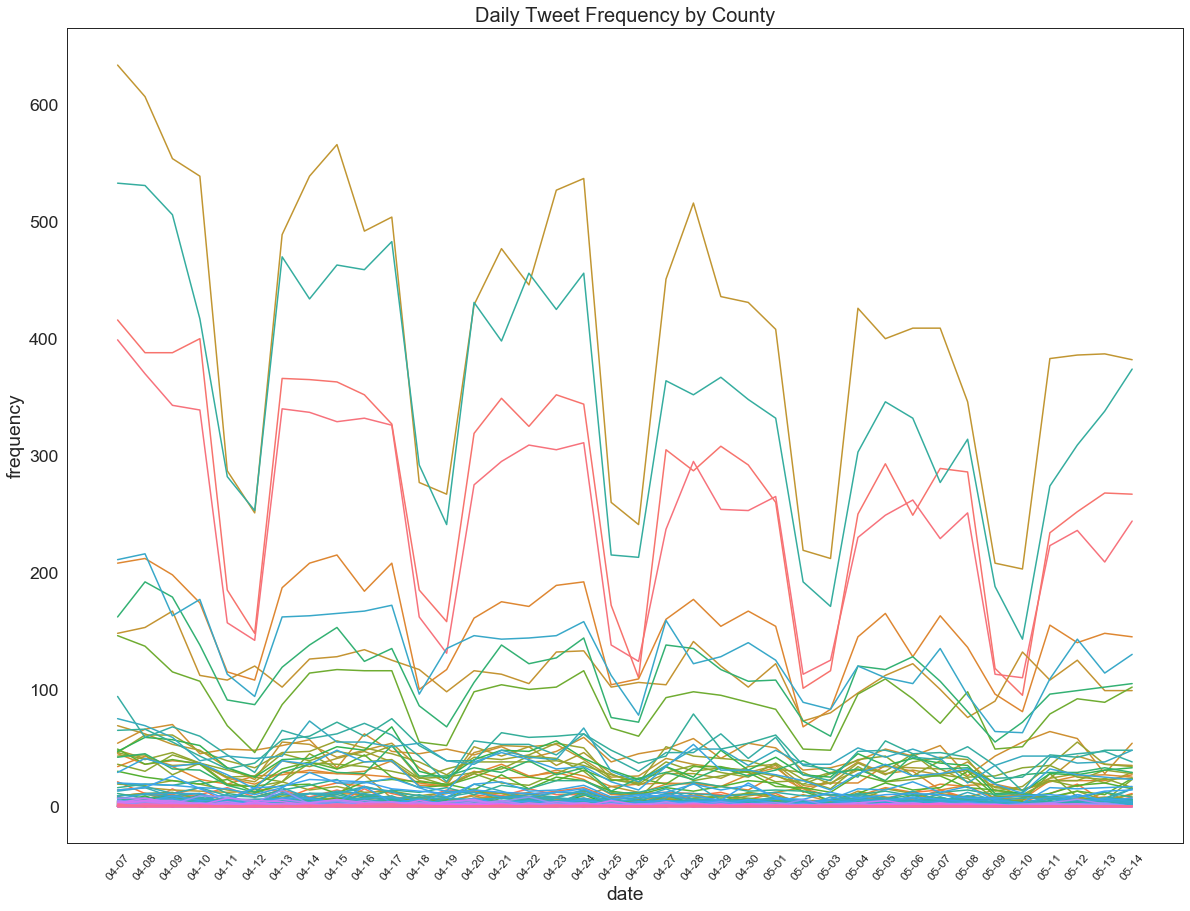

In [1396]:
plt.figure(figsize=(20, 15))
ax = sns.lineplot(x="date", y="frequency", hue="county_name", estimator=None, lw=1.5,
                  data=DTF_long, legend=False)

plt.setp(ax.get_xticklabels(), size=12, rotation=50);
plt.title('Daily Tweet Frequency by County', size=20);
plt.savefig("Daily Tweet Frequency by County", tight_layout=False)

## Adding statistics to DSS

 - Add overall tweet frequency by county

In [1373]:
# Add total number of tweets per county for reference
freqs = pd.DataFrame(merged_cleaned_data.county_name.value_counts())
freqs.reset_index(inplace=True)
freqs.columns=['county_name','NumOfTweets']

In [1374]:
DSS = pd.merge(DSS, freqs, on='county_name', how="left")
DSS.head()

county_name     04-07     04-08     04-09     04-10     04-11  \
0  accomack county   0.210050 -0.233767 NaN       NaN        0.193233   
1  albemarle county  0.152820  0.511075  0.476000  0.058267 -0.624900   
2  alexandria city   0.099242  0.094447  0.111315  0.090237 -0.000913   
3  alleghany county NaN       NaN       NaN        0.679200 NaN         
4  amelia county    NaN       NaN       -0.709600  0.431000 NaN         

      04-12     04-13     04-14     04-15  ...     05-05     05-06     05-07  \
0 NaN       NaN        0.763900 -0.559000  ... -0.226300 NaN       -0.407550   
1  0.348500  0.197200  0.411033 -0.001775  ...  0.000000  0.236433  0.076540   
2  0.046577  0.110444  0.117010  0.099704  ...  0.190584  0.150929  0.164236   
3 -0.526700 NaN        0.000000 NaN        ... NaN       NaN       NaN         
4 NaN       NaN       NaN       NaN        ... NaN       NaN       NaN         

      05-08     05-10     05-11     05-12     05-13     05-14  NumOfTweets  
0 NaN        0.377400 NaN       -0.186150 -0.008975  0.027250  49           
1  0.315833 -0.424250  0.401900  0.361200  0.401900  0.267500  109          
2  0.073565  0.101729  0.133897  0.124474  0.101835  0.091067  9362         
3  0.318200 NaN       NaN       NaN       NaN       NaN        5            
4 -0.942300 NaN       NaN       NaN       NaN       NaN        5            

[5 rows x 39 columns]

In [1375]:
# Drop rows that don't have a sentiment score every day
DSS.dropna(inplace=True)
# Save DSS to folder
DSS.to_csv("/Users/rachelmartonik/MSDS_498_Capstone/data/DSS.csv")
DSS.to_pickle("/Users/rachelmartonik/MSDS_498_Capstone/data/DSS_200516.csv")
len(DSS)

# Create wide data
DSS_wide = pd.melt(DSS, id_vars=['county_name', 'NumOfTweets'])
DSS_wide.columns=['county_name', 'NumOfTweets','date', 'sent_score']
DSS_wide.to_csv("/Users/rachelmartonik/MSDS_498_Capstone/data/DSS_wide.csv")
DSS_wide.to_pickle("/Users/rachelmartonik/MSDS_498_Capstone/data/DSS_wide_200516.csv")

## PCA of Daily Sentiment Score DSS

In [1397]:
DSS_for_PCA = DSS.copy()
DSS_for_PCA.set_index('county_name', inplace=True)
DSS_for_PCA.drop(columns='NumOfTweets', inplace=True)
DSS_for_PCA.head()

county_name     04-07     04-08     04-09     04-10     04-11  \
0    accomack county        0.210050 -0.233767 NaN       NaN        0.193233   
1    albemarle county       0.152820  0.511075  0.476000  0.058267 -0.624900   
2    alexandria city        0.099242  0.094447  0.111315  0.090237 -0.000913   
3    alleghany county      NaN       NaN       NaN        0.679200 NaN         
4    amelia county         NaN       NaN       -0.709600  0.431000 NaN         
5    amherst county         0.591750  0.142100 -0.017520  0.157467 -0.255300   
6    appomattox county     -0.381800 -0.476700 -0.140600  0.493900 NaN         
7    arlington county       0.112952  0.091583  0.114026  0.130715  0.028340   
8    augusta county        -0.165675  0.440800  0.057025 -0.014940 -0.329929   
9    bedford county         0.136833 -0.054782 -0.079687  0.102470 -0.002750   
10   botetourt county      -0.381800 -0.123000 -0.195300 NaN        0.700300   
11   bristol city           0.033833  0.444936  0.311230  0.084631  0.038600   
12   brunswick county       0.220200 NaN        0.597867  0.557400  0.476700   
13   buchanan county       NaN       NaN       NaN       NaN       -0.359500   
14   buckingham county     NaN       NaN        0.612400  0.416867 NaN         
15   campbell county       -0.162467  0.000000  0.414400 -0.318200 -0.607200   
16   caroline county       NaN        0.000000 -0.373600 NaN       -0.379200   
17   carroll county        NaN        0.700300  0.389050 -0.051600 NaN         
18   charles city county   NaN        0.330600  0.636900 NaN       NaN         
19   charlotte county       0.007176  0.047388  0.044376  0.028057 -0.063068   
20   charlottesville city   0.035275  0.069563  0.114443  0.081595  0.028016   
21   chesapeake city       NaN       NaN       NaN       NaN       NaN         
22   chesterfield county   -0.106049  0.016717 -0.009326  0.063073  0.162913   
23   clarke county          0.310300 -0.153100 -0.138850 NaN       NaN         
24   colonial heights city -0.117900  0.000000 -0.230500 -0.025800 NaN         
25   craig county           0.637900 NaN       NaN       NaN       NaN         
26   culpeper county        0.022769  0.240920  0.104184  0.179758  0.067429   
27   cumberland county     -0.479467 -0.063586 -0.314367  0.000000 -0.254629   
28   danville city         -0.048389  0.000200 -0.096725  0.465500  0.354800   
29   dinwiddie county      -0.073267 NaN       -0.226300  0.421150 NaN         
30   emporia city          -0.340400 NaN       NaN       NaN       NaN         
31   essex county           0.140858  0.127680  0.106998  0.061044 -0.055300   
32   fairfax county         0.064489  0.100391  0.089540  0.059549  0.062715   
33   fairfax city          NaN        0.000000 NaN        0.480450 NaN         
34   falls church city      0.142777  0.210285  0.176155  0.036452 -0.001533   
35   fauquier county       -0.066764 -0.096319 -0.083093  0.085654 -0.136542   
36   floyd county           0.000000 -0.186000 -0.642300  0.293850  0.421500   
37   fluvanna county        0.123625  0.116925 -0.172000  0.017967  0.576700   
38   franklin county        0.034300  0.000000  0.301833  0.096675 -0.170000   
39   franklin city         NaN       NaN       NaN        0.757900 NaN         
40   frederick county       0.133080 -0.124671  0.051543  0.005400 -0.088700   
41   fredericksburg city    0.191035 -0.009761  0.039991  0.269517 -0.184508   
42   galax city             0.361200 NaN        0.106050 NaN        0.320950   
43   giles county          NaN        0.000000 NaN       NaN        0.076200   
44   gloucester county     -0.067850 -0.453500  0.379880  0.014900  0.420967   
45   goochland county      -0.271600  0.027167  0.401900  0.415800  0.766050   
46   grayson county        NaN       -0.804500 NaN        0.473800 NaN         
47   greene county         NaN       NaN        0.279850 NaN       NaN         
48   halifax county        -0.467633  0.114220  0.408800  0.244820 -0.599400   
49   hampton ci

In [1403]:
DSS_for_PCA.dropna(inplace=True)
DSS_for_PCA.head()

county_name     04-07     04-08     04-09     04-10     04-11  \
2   alexandria city   0.099242  0.094447  0.111315  0.090237 -0.000913   
7   arlington county  0.112952  0.091583  0.114026  0.130715  0.028340   
9   bedford county    0.136833 -0.054782 -0.079687  0.102470 -0.002750   
11  bristol city      0.033833  0.444936  0.311230  0.084631  0.038600   
19  charlotte county  0.007176  0.047388  0.044376  0.028057 -0.063068   

       04-12     04-13     04-14     04-15  ...     05-04     05-05     05-06  \
2   0.046577  0.110444  0.117010  0.099704  ...  0.147704  0.190584  0.150929   
7   0.047672  0.116204  0.145737  0.127005  ...  0.028376  0.190002  0.072242   
9  -0.160787 -0.023064 -0.037687 -0.059507  ...  0.380250 -0.294240 -0.422217   
11 -0.590500  0.108033  0.038093  0.046225  ...  0.128857  0.181229  0.198708   
19  0.094638 -0.088737 -0.116542 -0.038546  ...  0.065722  0.010113  0.052442   

       05-07     05-08     05-10     05-11     05-12     05-13     05-14  
2   0.164236  0.073565  0.101729  0.133897  0.124474  0.101835  0.091067  
7   0.145283  0.100781 -0.022354  0.064132  0.105375  0.079812  0.130499  
9  -0.039871 -0.429000 -0.009620  0.019367  0.229229  0.108800 -0.129987  
11  0.007514  0.149429 -0.154100  0.061109 -0.109126 -0.141275  0.132791  
19  0.003826 -0.013165  0.105700  0.083205  0.109418  0.022627 -0.042230  

[5 rows x 38 columns]

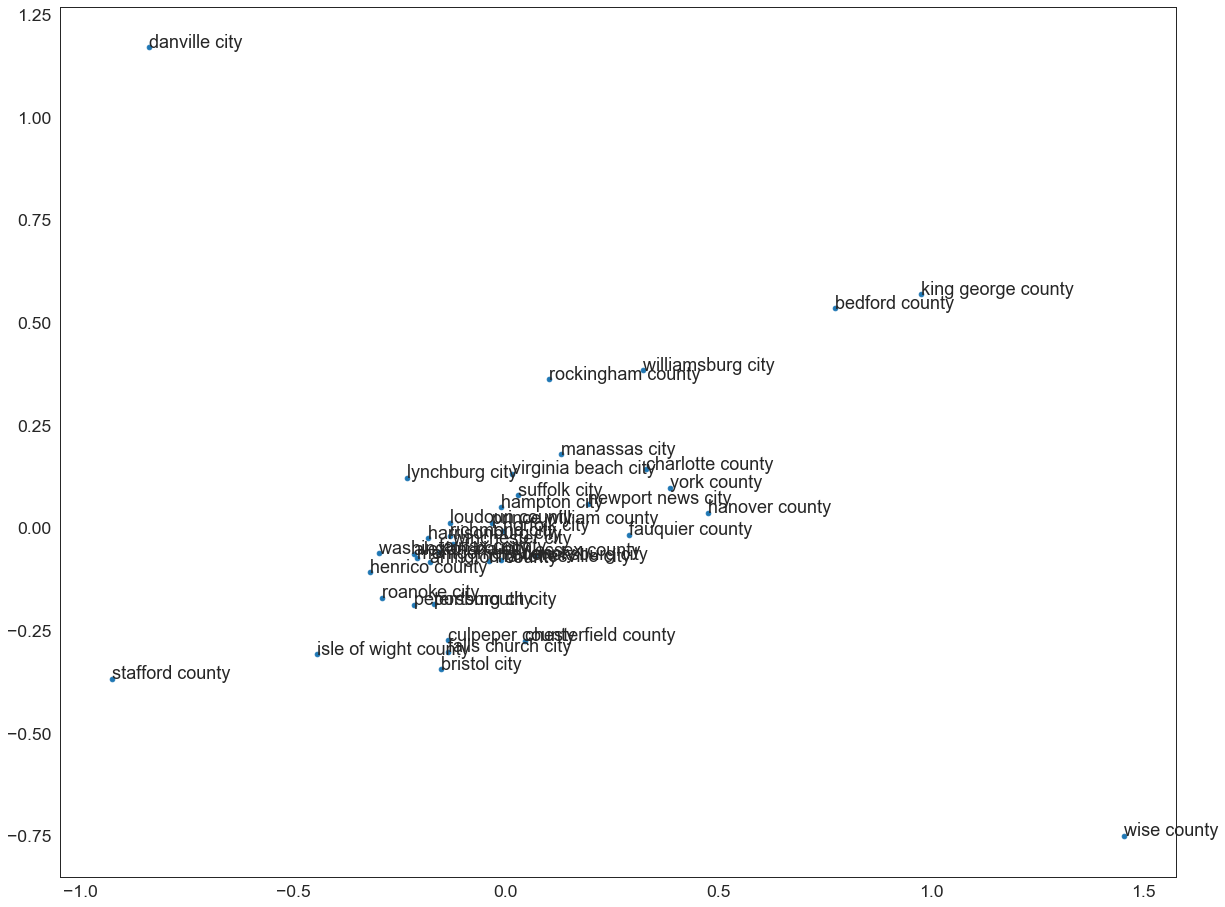

In [1409]:
pca = PCA(n_components=2, random_state=RANDOM)
result = pca.fit_transform(DSS_for_PCA)
plt.figure(figsize = (20, 16))
plt.scatter(result[:, 0], result[:, 1])
words = list(DSS_for_PCA.index)
for i, word in enumerate(words):
    plt.annotate(word, size = 18, xy=(result[i, 0], result[i, 1]))
plt.show()

40

In [1304]:
DSS_wide

county_name  NumOfTweets   date  sent_score
0     alexandria city    9362         04-07  0.099242  
1     arlington county   10282        04-07  0.112952  
2     bedford county     332          04-07  0.136833  
3     bristol city       358          04-07  0.033833  
4     charlotte county   817          04-07  0.007176  
...                ...   ...            ...       ...  
1475  washington county  250          05-14 -0.060900  
1476  williamsburg city  1137         05-14 -0.017252  
1477  winchester city    565          05-14  0.190265  
1478  wise county        177          05-14  0.055557  
1479  york county        468          05-14  0.136000  

[1480 rows x 4 columns]

In [1305]:
DSS_case_wide =pd.merge(DSS_wide, cases_wide, how='left', left_on=['county_name','date'], right_on=['county_name','date'])
DSS_case_wide

county_name  NumOfTweets   date  sent_score  cases_per_1000
0     alexandria city    9362         04-07  0.099242    0.805086      
1     arlington county   10282        04-07  0.112952    1.022420      
2     bedford county     332          04-07  0.136833    0.102685      
3     bristol city       358          04-07  0.033833    0.059372      
4     charlotte county   817          04-07  0.007176    0.082679      
...                ...   ...            ...       ...         ...      
1475  washington county  250          05-14 -0.060900    0.900636      
1476  williamsburg city  1137         05-14 -0.017252    2.840141      
1477  winchester city    565          05-14  0.190265    2.698910      
1478  wise county        177          05-14  0.055557    0.589366      
1479  york county        468          05-14  0.136000    0.902540      

[1480 rows x 5 columns]

In [ ]:
cases_wide.head(100)

In [ ]:
ax = sns.scatterplot(x="sent_score", y="cases_per_1000", hue="county_name",
                     data=DSS_case_wide, s=100 )

# FOR REVIEW = Particular tweets from a county on a specific day

In [ ]:
#Bristol took a dip on 4/12
data = data_0412_clean
data = data[data['county_name'] == 'bristol city']
data

In [ ]:
# wise county was really high on 4/29
data = data_0429_clean
data = data[data['county_name'] == 'wise county']
data

In [ ]:
# wise county was really high on 4/29
data = data_0415_clean
data = data[data['county_name'] == 'louisa county']
data

# Adding statistics to daily sentiment scores